In [444]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import kendalltau,spearmanr
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
refer_annual_avg = pd.read_csv("average cpih.csv")
refer_annual_avg = refer_annual_avg.dropna()
refer_annual_avg

cdid                                               name   2008   2009  \
0    L522                                 CPIH (overall index)   86.2   87.9   
1    L523               01    Food and non-alcoholic beverages   83.4   88.0   
2    L524                02    Alcoholic beverages and tobacco   69.5   72.5   
3    L525                          03    Clothing and footwear  104.3   96.2   
4      L5PG   04    Housing, water, electricity, gas and ot...   88.1   90.0   
..      ...                                                ...    ...    ...   
162  L55J                              12.5.3 Health insurance   64.7   68.3   
163  L55K                           12.5.4 Transport insurance   54.0   59.5   
165  L55L                        12.6 Financial services (nec)  111.5  111.2   
166  L55M                12.6.2 Other financial services (nec)  111.5  111.2   
168  L55N                            12.7 Other services (nec)   86.2   86.4   

      2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  \
0     90.1   93.6   96.0   98.2   99.6  100.0  101.0  103.6  106.0  107.8   
1     91.0   96.0   99.1  102.8  102.6  100.0   97.6   99.8  101.9  103.3   
2     76.5   83.2   88.2   93.8   98.0  100.0  101.5  105.9  110.5  114.4   
3     95.2   97.4   98.3   99.2   99.7  100.0  100.2  102.6  103.5  102.6   
4     89.6   92.1   94.6   96.8   98.7  100.0  101.6  103.7  105.7  107.4   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
162   74.8   79.9   86.1   92.0   96.8  100.0  107.3  111.9  116.4  121.4   
163   77.8   96.0   96.6   95.1   97.1  100.0  111.9  124.1  119.2  117.5   
165  107.2  103.9  105.5  105.6  102.3  100.0   99.8   98.6   94.5   93.4   
166  107.2  103.9  105.5  105.6  102.3  100.0   99.8   98.6   94.5   93.4   
168   89.7   93.3   95.4   98.2   98.6  100.0  100.3   98.8   97.2   99.1   

      2020   2021   2022   2023  
0    108.9  111.6  120.5  128.6  
1    104.0  104.3  115.8  132.6  
2    116.8  119.9  125.6  137.0  
3    101.2  101.4  109.1  116.5  
4    108.4  110.6  120.1  127.9  
..     ...    ...    ...    ...  
162  127.0  133.2  140.4  151.2  
163  119.9  109.5  124.5  177.0  
165   89.7   87.6   88.6   89.9  
166   89.7   87.6   88.6   89.9  
168  101.2  101.3   98.8  100.9  

[127 rows x 18 columns]

In [3]:
refer_annual_avg.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            155, 156, 158, 160, 161, 162, 163, 165, 166, 168],
           dtype='int64', length=127)

In [4]:
refer_annual_avg.iloc[:,1] = refer_annual_avg.iloc[:,1].replace(regex=r'\d+', value='')
refer_annual_avg.head()

cdid                                               name   2008  2009  \
0  L522                                 CPIH (overall index)   86.2  87.9   
1  L523                     Food and non-alcoholic beverages   83.4  88.0   
2  L524                      Alcoholic beverages and tobacco   69.5  72.5   
3  L525                                Clothing and footwear  104.3  96.2   
4    L5PG       Housing, water, electricity, gas and othe...   88.1  90.0   

   2010  2011  2012   2013   2014   2015   2016   2017   2018   2019   2020  \
0  90.1  93.6  96.0   98.2   99.6  100.0  101.0  103.6  106.0  107.8  108.9   
1  91.0  96.0  99.1  102.8  102.6  100.0   97.6   99.8  101.9  103.3  104.0   
2  76.5  83.2  88.2   93.8   98.0  100.0  101.5  105.9  110.5  114.4  116.8   
3  95.2  97.4  98.3   99.2   99.7  100.0  100.2  102.6  103.5  102.6  101.2   
4  89.6  92.1  94.6   96.8   98.7  100.0  101.6  103.7  105.7  107.4  108.4   

    2021   2022   2023  
0  111.6  120.5  128.6  
1  104.3  115.8  132.6  
2  119.9  125.6  137.0  
3  101.4  109.1  116.5  
4  110.6  120.1  127.9

In [5]:
refer_annual_avg.set_index(["cdid" ,"name"], inplace=True)
refer_annual_avg.head()

2008  2009  2010  \
cdid   name                                                                    
L522    CPIH (overall index)                                86.2  87.9  90.1   
L523        Food and non-alcoholic beverages                83.4  88.0  91.0   
L524        Alcoholic beverages and tobacco                 69.5  72.5  76.5   
L525        Clothing and footwear                          104.3  96.2  95.2   
L5PG        Housing, water, electricity, gas and other...   88.1  90.0  89.6   

                                                           2011  2012   2013  \
cdid   name                                                                    
L522    CPIH (overall index)                               93.6  96.0   98.2   
L523        Food and non-alcoholic beverages               96.0  99.1  102.8   
L524        Alcoholic beverages and tobacco                83.2  88.2   93.8   
L525        Clothing and footwear                          97.4  98.3   99.2   
L5PG        Housing, water, electricity, gas and other...  92.1  94.6   96.8   

                                                            2014   2015  \
cdid   name                                                               
L522    CPIH (overall index)                                99.6  100.0   
L523        Food and non-alcoholic beverages               102.6  100.0   
L524        Alcoholic beverages and tobacco                 98.0  100.0   
L525        Clothing and footwear                           99.7  100.0   
L5PG        Housing, water, electricity, gas and other...   98.7  100.0   

                                                            2016   2017  \
cdid   name                                                               
L522    CPIH (overall index)                               101.0  103.6   
L523        Food and non-alcoholic beverages                97.6   99.8   
L524        Alcoholic beverages and tobacco                101.5  105.9   
L525        Clothing and footwear                          100.2  102.6   
L5PG        Housing, water, electricity, gas and other...  101.6  103.7   

                                                            2018   2019  \
cdid   name                                                               
L522    CPIH (overall index)                               106.0  107.8   
L523        Food and non-alcoholic beverages               101.9  103.3   
L524        Alcoholic beverages and tobacco                110.5  114.4   
L525        Clothing and footwear                          103.5  102.6   
L5PG        Housing, water, electricity, gas and other...  105.7  107.4   

                                                            2020   2021  \
cdid   name                                                               
L522    CPIH (overall index)                               108.9  111.6   
L523        Food and non-alcoholic beverages               104.0  104.3   
L524        Alcoholic beverages and tobacco                116.8  119.9   
L525        Clothing and footwear                          101.2  101.4   
L5PG        Housing, water, electricity, gas and other...  108.4  110.6   

                                                            2022   2023  
cdid   name                                                              
L522    CPIH (overall index)                               120.5  128.6  
L523        Food and non-alcoholic beverages               115.8  132.6  
L524        Alcoholic beverages and tobacco                125.6  137.0  
L525        Clothing and footwear                          109.1  116.5  
L5PG        Housing, water, electricity, gas and other...  120.1  127.9

In [6]:
refer_annual_avg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 127 entries, ('L522  ', ' CPIH (overall index)') to ('L55N  ', ' . Other services (nec)')
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2008    127 non-null    float64
 1   2009    127 non-null    float64
 2   2010    127 non-null    float64
 3   2011    127 non-null    float64
 4   2012    127 non-null    float64
 5   2013    127 non-null    float64
 6   2014    127 non-null    float64
 7   2015    127 non-null    float64
 8   2016    127 non-null    float64
 9   2017    127 non-null    float64
 10  2018    127 non-null    float64
 11  2019    127 non-null    float64
 12  2020    127 non-null    float64
 13  2021    127 non-null    float64
 14  2022    127 non-null    float64
 15  2023    127 non-null    float64
dtypes: float64(16)
memory usage: 26.5+ KB


# CPIH_Main

In [7]:
cpih_monthly = pd.read_excel("overall_cpih_ex.xlsx").iloc[:432,1:126]
cpih_monthly = cpih_monthly.transpose()

In [8]:
cpih_monthly.head()

0                    1    \
cdid                                name  1988-01-01 00:00:00   
L522                      CPIH ALL ITEMS               46.851   
L523    FOOD AND NON-ALCOHOLIC BEVERAGES               47.901   
L52H                                FOOD               48.244   
L52I                     BREAD & CEREALS               50.053   

                        2                    3                    4    \
cdid    1988-02-01 00:00:00  1988-03-01 00:00:00  1988-04-01 00:00:00   
L522                 46.998               47.202               47.801   
L523                 48.174               48.324               48.592   
L52H                 48.501               48.643               48.894   
L52I                 50.353               50.311               50.548   

                        5                    6                    7    \
cdid    1988-05-01 00:00:00  1988-06-01 00:00:00  1988-07-01 00:00:00   
L522                 48.044                48.21               48.233   
L523                 48.714               48.793               48.355   
L52H                 48.968               49.004               48.483   
L52I                  50.97                51.04               51.199   

                        8                    9    ...                  422  \
cdid    1988-08-01 00:00:00  1988-09-01 00:00:00  ...  2023-02-01 00:00:00   
L522                 48.491               48.716  ...              125.992   
L523                 48.583               48.765  ...              128.837   
L52H                 48.697               48.866  ...              128.593   
L52I                 51.212               51.483  ...              128.499   

                        423                  424                  425  \
cdid    2023-03-01 00:00:00  2023-04-01 00:00:00  2023-05-01 00:00:00   
L522                126.829              128.339              129.127   
L523                130.245              132.096              133.306   
L52H                130.145              131.957              133.224   
L52I                 131.28              133.302              134.369   

                        426                  427                  428  \
cdid    2023-06-01 00:00:00  2023-07-01 00:00:00  2023-08-01 00:00:00   
L522                129.354              128.957              129.431   
L523                133.796              133.915              134.381   
L52H                133.639               133.81              134.119   
L52I                135.309              135.621              136.598   

                        429                  430                  431  
cdid    2023-09-01 00:00:00  2023-10-01 00:00:00  2023-11-01 00:00:00  
L522                130.071               130.21              130.049  
L523                 134.21              134.361              134.781  
L52H                134.168              134.229               134.63  
L52I                136.901               136.64              135.501  

[5 rows x 432 columns]

In [9]:
cpih_monthly.index.names

FrozenList([None])

In [10]:
cpih_monthly.columns = cpih_monthly.iloc[0,:]
cpih_monthly.head()

cdid                                name  1988-01-01 00:00:00  \
cdid                                name  1988-01-01 00:00:00   
L522                      CPIH ALL ITEMS               46.851   
L523    FOOD AND NON-ALCOHOLIC BEVERAGES               47.901   
L52H                                FOOD               48.244   
L52I                     BREAD & CEREALS               50.053   

cdid    1988-02-01 00:00:00  1988-03-01 00:00:00  1988-04-01 00:00:00  \
cdid    1988-02-01 00:00:00  1988-03-01 00:00:00  1988-04-01 00:00:00   
L522                 46.998               47.202               47.801   
L523                 48.174               48.324               48.592   
L52H                 48.501               48.643               48.894   
L52I                 50.353               50.311               50.548   

cdid    1988-05-01 00:00:00  1988-06-01 00:00:00  1988-07-01 00:00:00  \
cdid    1988-05-01 00:00:00  1988-06-01 00:00:00  1988-07-01 00:00:00   
L522                 48.044                48.21               48.233   
L523                 48.714               48.793               48.355   
L52H                 48.968               49.004               48.483   
L52I                  50.97                51.04               51.199   

cdid    1988-08-01 00:00:00  1988-09-01 00:00:00  ...  2023-02-01 00:00:00  \
cdid    1988-08-01 00:00:00  1988-09-01 00:00:00  ...  2023-02-01 00:00:00   
L522                 48.491               48.716  ...              125.992   
L523                 48.583               48.765  ...              128.837   
L52H                 48.697               48.866  ...              128.593   
L52I                 51.212               51.483  ...              128.499   

cdid    2023-03-01 00:00:00  2023-04-01 00:00:00  2023-05-01 00:00:00  \
cdid    2023-03-01 00:00:00  2023-04-01 00:00:00  2023-05-01 00:00:00   
L522                126.829              128.339              129.127   
L523                130.245              132.096              133.306   
L52H                130.145              131.957              133.224   
L52I                 131.28              133.302              134.369   

cdid    2023-06-01 00:00:00  2023-07-01 00:00:00  2023-08-01 00:00:00  \
cdid    2023-06-01 00:00:00  2023-07-01 00:00:00  2023-08-01 00:00:00   
L522                129.354              128.957              129.431   
L523                133.796              133.915              134.381   
L52H                133.639               133.81              134.119   
L52I                135.309              135.621              136.598   

cdid    2023-09-01 00:00:00  2023-10-01 00:00:00  2023-11-01 00:00:00  
cdid    2023-09-01 00:00:00  2023-10-01 00:00:00  2023-11-01 00:00:00  
L522                130.071               130.21              130.049  
L523                 134.21              134.361              134.781  
L52H                134.168              134.229               134.63  
L52I                136.901               136.64              135.501  

[5 rows x 432 columns]

In [11]:
cpih_monthly.index.names

FrozenList([None])

In [12]:
cpih_monthly.set_index(cpih_monthly.columns[0], append= True, inplace=True)

In [13]:
cpih_monthly.index.names

FrozenList([None, 'name'])

Multi_Indexing

In [14]:
cpih_monthly.index.names = ['cdid', 'name']
cpih_monthly.head()

cdid                                              1988-01-01  \
cdid   name                                                    
cdid   name                              1988-01-01 00:00:00   
L522   CPIH ALL ITEMS                                 46.851   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES               47.901   
L52H   FOOD                                           48.244   
L52I   BREAD & CEREALS                                50.053   

cdid                                              1988-02-01  \
cdid   name                                                    
cdid   name                              1988-02-01 00:00:00   
L522   CPIH ALL ITEMS                                 46.998   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES               48.174   
L52H   FOOD                                           48.501   
L52I   BREAD & CEREALS                                50.353   

cdid                                              1988-03-01  \
cdid   name                                                    
cdid   name                              1988-03-01 00:00:00   
L522   CPIH ALL ITEMS                                 47.202   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES               48.324   
L52H   FOOD                                           48.643   
L52I   BREAD & CEREALS                                50.311   

cdid                                              1988-04-01  \
cdid   name                                                    
cdid   name                              1988-04-01 00:00:00   
L522   CPIH ALL ITEMS                                 47.801   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES               48.592   
L52H   FOOD                                           48.894   
L52I   BREAD & CEREALS                                50.548   

cdid                                              1988-05-01  \
cdid   name                                                    
cdid   name                              1988-05-01 00:00:00   
L522   CPIH ALL ITEMS                                 48.044   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES               48.714   
L52H   FOOD                                           48.968   
L52I   BREAD & CEREALS                                 50.97   

cdid                                              1988-06-01  \
cdid   name                                                    
cdid   name                              1988-06-01 00:00:00   
L522   CPIH ALL ITEMS                                  48.21   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES               48.793   
L52H   FOOD                                           49.004   
L52I   BREAD & CEREALS                                 51.04   

cdid                                              1988-07-01  \
cdid   name                                                    
cdid   name                              1988-07-01 00:00:00   
L522   CPIH ALL ITEMS                                 48.233   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES               48.355   
L52H   FOOD                                           48.483   
L52I   BREAD & CEREALS                                51.199   

cdid                                              1988-08-01  \
cdid   name                                                    
cdid   name                              1988-08-01 00:00:00   
L522   CPIH ALL ITEMS                                 48.491   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES               48.583   
L52H   FOOD                                           48.697   
L52I   BREAD & CEREALS                                51.212   

cdid                                              1988-09-01  \
cdid   name                                                    
cdid   name                              1988-09-01 00:00:00   
L522   CPIH ALL ITEMS                                 48.716   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES               48.765   
L52H   FOOD                                           48.866   
L52I   BREAD & CEREALS  

In [15]:
cpih_monthly.index.names

FrozenList(['cdid', 'name'])

In [16]:
cpih_monthly = cpih_monthly.iloc[1:,:]

In [17]:
cpih_monthly.head()

cdid                                    1988-01-01 1988-02-01 1988-03-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                       46.851     46.998     47.202   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     47.901     48.174     48.324   
L52H   FOOD                                 48.244     48.501     48.643   
L52I   BREAD & CEREALS                      50.053     50.353     50.311   
L52J   MEAT                                 53.741     53.386     53.721   

cdid                                    1988-04-01 1988-05-01 1988-06-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                       47.801     48.044      48.21   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     48.592     48.714     48.793   
L52H   FOOD                                 48.894     48.968     49.004   
L52I   BREAD & CEREALS                      50.548      50.97      51.04   
L52J   MEAT                                 53.736     54.186     54.685   

cdid                                    1988-07-01 1988-08-01 1988-09-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                       48.233     48.491     48.716   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     48.355     48.583     48.765   
L52H   FOOD                                 48.483     48.697     48.866   
L52I   BREAD & CEREALS                      51.199     51.212     51.483   
L52J   MEAT                                 54.403     54.712     54.874   

cdid                                    1988-10-01  ... 2023-02-01 2023-03-01  \
cdid   name                                         ...                         
L522   CPIH ALL ITEMS                       49.045  ...    125.992    126.829   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     48.838  ...    128.837    130.245   
L52H   FOOD                                 48.936  ...    128.593    130.145   
L52I   BREAD & CEREALS                      51.609  ...    128.499     131.28   
L52J   MEAT                                 54.603  ...    120.738    122.398   

cdid                                    2023-04-01 2023-05-01 2023-06-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                      128.339    129.127    129.354   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES    132.096    133.306    133.796   
L52H   FOOD                                131.957    133.224    133.639   
L52I   BREAD & CEREALS                     133.302    134.369    135.309   
L52J   MEAT                                124.493    125.001    125.738   

cdid                                    2023-07-01 2023-08-01 2023-09-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                      128.957    129.431    130.071   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES    133.915    134.381     134.21   
L52H   FOOD                                 133.81    134.119    134.168   
L52I   BREAD & CEREALS                     135.621    136.598    136.901   
L52J   MEAT                                126.307    126.552    126.837   

cdid                                    2023-10-01 2023-11-01  
cdid   name                                                    
L522   CPIH ALL ITEMS                       130.21    130.049  
L523   FOOD AND NON-ALCOHOLIC BEVERAGES    134.361    134.781  
L52H   FOOD                                134.229     134.63  
L52I   BREAD & CEREALS                      136.64    135.501  
L52J   MEAT                                126.607    126.953  

[5 rows x 431 columns]

In [19]:
cpih_monthly.columns.names = ["months"]
cpih_monthly.head()

months                                  1988-01-01 1988-02-01 1988-03-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                       46.851     46.998     47.202   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     47.901     48.174     48.324   
L52H   FOOD                                 48.244     48.501     48.643   
L52I   BREAD & CEREALS                      50.053     50.353     50.311   
L52J   MEAT                                 53.741     53.386     53.721   

months                                  1988-04-01 1988-05-01 1988-06-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                       47.801     48.044      48.21   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     48.592     48.714     48.793   
L52H   FOOD                                 48.894     48.968     49.004   
L52I   BREAD & CEREALS                      50.548      50.97      51.04   
L52J   MEAT                                 53.736     54.186     54.685   

months                                  1988-07-01 1988-08-01 1988-09-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                       48.233     48.491     48.716   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     48.355     48.583     48.765   
L52H   FOOD                                 48.483     48.697     48.866   
L52I   BREAD & CEREALS                      51.199     51.212     51.483   
L52J   MEAT                                 54.403     54.712     54.874   

months                                  1988-10-01  ... 2023-02-01 2023-03-01  \
cdid   name                                         ...                         
L522   CPIH ALL ITEMS                       49.045  ...    125.992    126.829   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     48.838  ...    128.837    130.245   
L52H   FOOD                                 48.936  ...    128.593    130.145   
L52I   BREAD & CEREALS                      51.609  ...    128.499     131.28   
L52J   MEAT                                 54.603  ...    120.738    122.398   

months                                  2023-04-01 2023-05-01 2023-06-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                      128.339    129.127    129.354   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES    132.096    133.306    133.796   
L52H   FOOD                                131.957    133.224    133.639   
L52I   BREAD & CEREALS                     133.302    134.369    135.309   
L52J   MEAT                                124.493    125.001    125.738   

months                                  2023-07-01 2023-08-01 2023-09-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                      128.957    129.431    130.071   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES    133.915    134.381     134.21   
L52H   FOOD                                 133.81    134.119    134.168   
L52I   BREAD & CEREALS                     135.621    136.598    136.901   
L52J   MEAT                                126.307    126.552    126.837   

months                                  2023-10-01 2023-11-01  
cdid   name                                                    
L522   CPIH ALL ITEMS                       130.21    130.049  
L523   FOOD AND NON-ALCOHOLIC BEVERAGES    134.361    134.781  
L52H   FOOD                                134.229     134.63  
L52I   BREAD & CEREALS                      136.64    135.501  
L52J   MEAT                                126.607    126.953  

[5 rows x 431 columns]

Standardised from 2000

In [20]:
cpih_monthly_2000 = cpih_monthly.iloc[:,144:]
cpih_monthly_2000.head()

months                                  2000-01-01 2000-02-01 2000-03-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                       72.622     72.808     72.957   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     65.738     65.713     65.208   
L52H   FOOD                                 65.083     65.029     64.449   
L52I   BREAD & CEREALS                       68.49     68.199     67.934   
L52J   MEAT                                 68.149     68.558     68.043   

months                                  2000-04-01 2000-05-01 2000-06-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                       73.291     73.486     73.575   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     65.001     65.657     65.877   
L52H   FOOD                                 64.261     64.944     65.212   
L52I   BREAD & CEREALS                       67.86     67.757     67.715   
L52J   MEAT                                 67.588     68.348     68.271   

months                                  2000-07-01 2000-08-01 2000-09-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                       73.285     73.317      73.77   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     66.418     65.851     66.064   
L52H   FOOD                                   65.8     65.196     65.429   
L52I   BREAD & CEREALS                      67.974     67.736     67.956   
L52J   MEAT                                 68.411     68.607     68.339   

months                                  2000-10-01  ... 2023-02-01 2023-03-01  \
cdid   name                                         ...                         
L522   CPIH ALL ITEMS                       73.783  ...    125.992    126.829   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     66.042  ...    128.837    130.245   
L52H   FOOD                                  65.41  ...    128.593    130.145   
L52I   BREAD & CEREALS                      68.021  ...    128.499     131.28   
L52J   MEAT                                 68.194  ...    120.738    122.398   

months                                  2023-04-01 2023-05-01 2023-06-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                      128.339    129.127    129.354   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES    132.096    133.306    133.796   
L52H   FOOD                                131.957    133.224    133.639   
L52I   BREAD & CEREALS                     133.302    134.369    135.309   
L52J   MEAT                                124.493    125.001    125.738   

months                                  2023-07-01 2023-08-01 2023-09-01  \
cdid   name                                                                
L522   CPIH ALL ITEMS                      128.957    129.431    130.071   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES    133.915    134.381     134.21   
L52H   FOOD                                 133.81    134.119    134.168   
L52I   BREAD & CEREALS                     135.621    136.598    136.901   
L52J   MEAT                                126.307    126.552    126.837   

months                                  2023-10-01 2023-11-01  
cdid   name                                                    
L522   CPIH ALL ITEMS                       130.21    130.049  
L523   FOOD AND NON-ALCOHOLIC BEVERAGES    134.361    134.781  
L52H   FOOD                                134.229     134.63  
L52I   BREAD & CEREALS                      136.64    135.501  
L52J   MEAT                                126.607    126.953  

[5 rows x 287 columns]

In [21]:
cpih_monthly_2000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 124 entries, ('L522  ', 'CPIH ALL ITEMS') to ('L55N  ', 'OTHER SERVICES (NEC)')
Columns: 287 entries, 2000-01-01 00:00:00 to 2023-11-01 00:00:00
dtypes: object(287)
memory usage: 288.5+ KB


In [22]:
cpih_monthly_2000.dtypes

months
2000-01-01    object
2000-02-01    object
2000-03-01    object
2000-04-01    object
2000-05-01    object
               ...  
2023-07-01    object
2023-08-01    object
2023-09-01    object
2023-10-01    object
2023-11-01    object
Length: 287, dtype: object

Object datatype to Float

In [23]:
cpih_monthly_2000 = cpih_monthly_2000.apply(pd.to_numeric, errors='coerce')

In [24]:
cpih_monthly_2000.dtypes

months
2000-01-01    float64
2000-02-01    float64
2000-03-01    float64
2000-04-01    float64
2000-05-01    float64
               ...   
2023-07-01    float64
2023-08-01    float64
2023-09-01    float64
2023-10-01    float64
2023-11-01    float64
Length: 287, dtype: object

In [25]:
#Removed the missing values
cpih_monthly_2000.fillna(0, inplace=True)
cpih_monthly_2000.info(), cpih_monthly_2000.dtypes

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 124 entries, ('L522  ', 'CPIH ALL ITEMS') to ('L55N  ', 'OTHER SERVICES (NEC)')
Columns: 287 entries, 2000-01-01 00:00:00 to 2023-11-01 00:00:00
dtypes: float64(287)
memory usage: 288.5+ KB


(None,
 months
 2000-01-01    float64
 2000-02-01    float64
 2000-03-01    float64
 2000-04-01    float64
 2000-05-01    float64
                ...   
 2023-07-01    float64
 2023-08-01    float64
 2023-09-01    float64
 2023-10-01    float64
 2023-11-01    float64
 Length: 287, dtype: object)

In [26]:
cpih_monthly_2000.head()

months                                   2000-01-01  2000-02-01  2000-03-01  \
cdid   name                                                                   
L522   CPIH ALL ITEMS                        72.622      72.808      72.957   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES      65.738      65.713      65.208   
L52H   FOOD                                  65.083      65.029      64.449   
L52I   BREAD & CEREALS                       68.490      68.199      67.934   
L52J   MEAT                                  68.149      68.558      68.043   

months                                   2000-04-01  2000-05-01  2000-06-01  \
cdid   name                                                                   
L522   CPIH ALL ITEMS                        73.291      73.486      73.575   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES      65.001      65.657      65.877   
L52H   FOOD                                  64.261      64.944      65.212   
L52I   BREAD & CEREALS                       67.860      67.757      67.715   
L52J   MEAT                                  67.588      68.348      68.271   

months                                   2000-07-01  2000-08-01  2000-09-01  \
cdid   name                                                                   
L522   CPIH ALL ITEMS                        73.285      73.317      73.770   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES      66.418      65.851      66.064   
L52H   FOOD                                  65.800      65.196      65.429   
L52I   BREAD & CEREALS                       67.974      67.736      67.956   
L52J   MEAT                                  68.411      68.607      68.339   

months                                   2000-10-01  ...  2023-02-01  \
cdid   name                                          ...               
L522   CPIH ALL ITEMS                        73.783  ...     125.992   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES      66.042  ...     128.837   
L52H   FOOD                                  65.410  ...     128.593   
L52I   BREAD & CEREALS                       68.021  ...     128.499   
L52J   MEAT                                  68.194  ...     120.738   

months                                   2023-03-01  2023-04-01  2023-05-01  \
cdid   name                                                                   
L522   CPIH ALL ITEMS                       126.829     128.339     129.127   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     130.245     132.096     133.306   
L52H   FOOD                                 130.145     131.957     133.224   
L52I   BREAD & CEREALS                      131.280     133.302     134.369   
L52J   MEAT                                 122.398     124.493     125.001   

months                                   2023-06-01  2023-07-01  2023-08-01  \
cdid   name                                                                   
L522   CPIH ALL ITEMS                       129.354     128.957     129.431   
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     133.796     133.915     134.381   
L52H   FOOD                                 133.639     133.810     134.119   
L52I   BREAD & CEREALS                      135.309     135.621     136.598   
L52J   MEAT                                 125.738     126.307     126.552   

months                                   2023-09-01  2023-10-01  2023-11-01  
cdid   name                                                                  
L522   CPIH ALL ITEMS                       130.071     130.210     130.049  
L523   FOOD AND NON-ALCOHOLIC BEVERAGES     134.210     134.361     134.781  
L52H   FOOD                                 134.168     134.229     134.630  
L52I   BREAD & CEREALS                      136.901     136.640     135.501  
L52J   MEAT                                 126.837     126.607     126.953  

[5 rows x 287 columns]

In [27]:
cpih_monthly_2000.index

MultiIndex([('L522  ',                           'CPIH ALL ITEMS'),
            ('L523  ',         'FOOD AND NON-ALCOHOLIC BEVERAGES'),
            ('L52H  ',                                     'FOOD'),
            ('L52I  ',                          'BREAD & CEREALS'),
            ('L52J  ',                                     'MEAT'),
            ('L52K  ',                                     'FISH'),
            ('L52L  ',                      'MILK, CHEESE & EGGS'),
            ('L52M  ',                              'OILS & FATS'),
            ('L52N  ',                                    'FRUIT'),
            ('L52O  ', 'VEGETABLES INCLUDING POTATOES AND TUBERS'),
            ...
            ('L55E  ',             'JEWELLERY CLOCKS AND WATCHES'),
            ('L55F  ',                   'OTHER PERSONAL EFFECTS'),
            ('L55G  ',                        'SOCIAL PROTECTION'),
            ('L55H  ',                                'INSURANCE'),
            ('L55I  ',          

In [28]:
print(cpih_monthly_2000.index.names)

['cdid', 'name']


In [29]:
#To remove MULTI-INDEXING
index_dict = {level0_value: level1_value for level0_value, level1_value in cpih_monthly_2000.index}
stripped_index_dict = {key.strip(): value for key, value in index_dict.items()}
stripped_index_dict

{'L522': 'CPIH ALL ITEMS',
 'L523': 'FOOD AND NON-ALCOHOLIC BEVERAGES',
 'L52H': 'FOOD',
 'L52I': 'BREAD & CEREALS',
 'L52J': 'MEAT',
 'L52K': 'FISH',
 'L52L': 'MILK, CHEESE & EGGS',
 'L52M': 'OILS & FATS',
 'L52N': 'FRUIT',
 'L52O': 'VEGETABLES INCLUDING POTATOES AND TUBERS',
 'L52P': 'SUGAR, JAM, SYRUPS, CHOCOLATE AND CONFECTIONERY',
 'L52Q': 'FOOD PRODUCTS (NEC)',
 'L52R': 'NON-ALCOHOLIC BEVERAGES',
 'L52S': 'COFFEE, TEA & COCOA',
 'L52T': 'MINERAL WATERS, SOFT DRINKS AND JUICES',
 'L524': 'ALCOHOLIC BEVERAGES AND TOBACCO',
 'L52U': 'ALCOHOLIC BEVERAGES',
 'L52V': 'SPIRITS',
 'L52W': 'WINE',
 'L52X': 'BEER',
 'L5KR': 'TOBACCO',
 'L525': 'CLOTHING AND FOOTWEAR',
 'L52Z': 'CLOTHING',
 'L532': 'GARMENTS',
 'L533': 'OTHER CLOTHING & CLOTHING ACCESSORIES',
 'L534': 'CLEANING, REPAIR AND HIRE OF CLOTHING',
 'L535': 'FOOTWEAR INCLUDING REPAIRS',
 'L5PG': 'HOUSING, WATER, ELELCTRICITY, GAS AND OTHER FUELS',
 'L536': 'ACTUAL RENTALS FOR HOUSING',
 'L5P5': 'OOH',
 'L537': 'REGULAR MAINTENANCE

In [30]:
print(cpih_monthly_2000.index.names)
cpih_monthly_2000.columns.dtype

['cdid', 'name']


dtype('O')

In [31]:
#to change the datatype of column to datetime
cpih_monthly_2000.columns = pd.to_datetime(cpih_monthly_2000.columns)
cpih_monthly_2000.columns.dtype

dtype('<M8[ns]')

In [32]:
cpih_monthly_2000= cpih_monthly_2000.reset_index(level=1,drop=True)
cpih_monthly_2000

months  2000-01-01  2000-02-01  2000-03-01  2000-04-01  2000-05-01  \
cdid                                                                 
L522        72.622      72.808      72.957      73.291      73.486   
L523        65.738      65.713      65.208      65.001      65.657   
L52H        65.083      65.029      64.449      64.261      64.944   
L52I        68.490      68.199      67.934      67.860      67.757   
L52J        68.149      68.558      68.043      67.588      68.348   
...            ...         ...         ...         ...         ...   
L55J        35.780      35.780      35.780      36.159      36.159   
L55K        42.397      42.092      42.811      43.442      43.523   
L55L       135.861     135.861     135.861     132.087     132.087   
L55M       135.861     135.861     135.861     132.087     132.087   
L55N        51.022      51.071      50.992      51.318      51.460   

months  2000-06-01  2000-07-01  2000-08-01  2000-09-01  2000-10-01  ...  \
cdid                                                                ...   
L522        73.575      73.285      73.317      73.770      73.783  ...   
L523        65.877      66.418      65.851      66.064      66.042  ...   
L52H        65.212      65.800      65.196      65.429      65.410  ...   
L52I        67.715      67.974      67.736      67.956      68.021  ...   
L52J        68.271      68.411      68.607      68.339      68.194  ...   
...            ...         ...         ...         ...         ...  ...   
L55J        36.159      37.250      37.250      37.250      38.392  ...   
L55K        43.390      43.423      43.815      44.057      44.673  ...   
L55L       132.087     126.426     126.426     126.426     126.426  ...   
L55M       132.087     126.426     126.426     126.426     126.426  ...   
L55N        51.622      52.066      52.292      52.318      52.733  ...   

months  2023-02-01  2023-03-01  2023-04-01  2023-05-01  2023-06-01  \
cdid                                                                 
L522       125.992     126.829     128.339     129.127     129.354   
L523       128.837     130.245     132.096     133.306     133.796   
L52H       128.593     130.145     131.957     133.224     133.639   
L52I       128.499     131.280     133.302     134.369     135.309   
L52J       120.738     122.398     124.493     125.001     125.738   
...            ...         ...         ...         ...         ...   
L55J       147.105     147.105     151.387     151.387     151.387   
L55K       150.211     156.054     159.749     165.116     177.540   
L55L        89.346      89.694      89.662      90.003      90.214   
L55M        89.346      89.694      89.662      90.003      90.214   
L55N       100.904     101.241     101.725     101.940     102.172   

months  2023-07-01  2023-08-01  2023-09-01  2023-10-01  2023-11-01  
cdid                                                                
L522       128.957     129.431     130.071     130.210     130.049  
L523       133.915     134.381     134.210     134.361     134.781  
L52H       133.810     134.119     134.168     134.229     134.630  
L52I       135.621     136.598     136.901     136.640     135.501  
L52J       126.307     126.552     126.837     126.607     126.953  
...            ...         ...         ...         ...         ...  
L55J       153.128     153.128     153.128     153.085     153.085  
L55K       187.406     191.865     195.277     196.365     198.775  
L55L        90.273      90.176      90.074      90.110      90.110  
L55M        90.273      90.176      90.074      90.110      90.110  
L55N        99.767     100.074     100.329     100.512     100.662  

[124 rows x 287 columns]

In [33]:
cpih_monthly_2000.index = cpih_monthly_2000.index.str.strip()

In [34]:
cpih_monthly_2000.index

Index(['L522', 'L523', 'L52H', 'L52I', 'L52J', 'L52K', 'L52L', 'L52M', 'L52N',
       'L52O',
       ...
       'L55E', 'L55F', 'L55G', 'L55H', 'L55I', 'L55J', 'L55K', 'L55L', 'L55M',
       'L55N'],
      dtype='object', name='cdid', length=124)

In [35]:
#MAJOR SECTORS
main_sectors=['L522','L523', 'L524','L525','L536','L53A','L53E','DHYR','L528','L529','L52C','L52D','L55J']
cpih_14_from2000=cpih_monthly_2000.loc[main_sectors]

In [36]:
cpih_14_from2000

months  2000-01-01  2000-02-01  2000-03-01  2000-04-01  2000-05-01  \
cdid                                                                 
L522        72.622      72.808      72.957      73.291      73.486   
L523        65.738      65.713      65.208      65.001      65.657   
L524        54.420      54.720      54.731      56.567      56.606   
L525       161.459     163.915     165.945     166.540     166.317   
L536        66.496      66.496      66.502      67.602      67.679   
L53A        57.488      57.488      57.488      52.082      52.082   
L53E        43.557      43.553      43.549      43.399      42.954   
DHYR        54.571      54.571      54.571      57.936      57.936   
L528        63.940      63.987      64.222      64.553      64.712   
L529        65.272      65.771      66.316      66.879      66.967   
L52C        29.899      29.899      29.899      29.899      29.899   
L52D        61.667      61.821      61.958      62.312      62.703   
L55J        35.780      35.780      35.780      36.159      36.159   

months  2000-06-01  2000-07-01  2000-08-01  2000-09-01  2000-10-01  ...  \
cdid                                                                ...   
L522        73.575      73.285      73.317      73.770      73.783  ...   
L523        65.877      66.418      65.851      66.064      66.042  ...   
L524        56.687      56.611      56.769      57.079      57.058  ...   
L525       165.491     152.664     155.326     161.307     161.589  ...   
L536        67.813      68.034      68.144      68.252      68.452  ...   
L53A        52.082      52.082      52.082      52.082      52.082  ...   
L53E        42.575      42.295      42.263      42.254      42.256  ...   
DHYR        57.936      57.936      57.936      57.936      57.936  ...   
L528        64.611      64.874      65.222      65.366      65.489  ...   
L529        67.772      67.813      67.146      67.355      66.869  ...   
L52C        29.899      29.899      29.899      31.613      31.855  ...   
L52D        62.872      63.117      63.462      63.642      63.806  ...   
L55J        36.159      37.250      37.250      37.250      38.392  ...   

months  2023-02-01  2023-03-01  2023-04-01  2023-05-01  2023-06-01  \
cdid                                                                 
L522       125.992     126.829     128.339     129.127     129.354   
L523       128.837     130.245     132.096     133.306     133.796   
L524       130.380     131.381     136.148     136.921     137.039   
L525       112.716     114.549     115.297     116.821     117.050   
L536       113.990     114.256     115.815     116.163     116.495   
L53A       111.241     111.241     120.593     120.593     120.593   
L53E       240.944     240.944     238.257     238.257     238.257   
DHYR       131.366     131.366     138.103     138.103     138.103   
L528       123.475     124.006     125.035     125.791     126.133   
L529       132.387     132.836     135.191     135.605     134.683   
L52C       129.400     129.400     129.400     129.400     129.400   
L52D       133.431     135.059     135.972     137.298     137.997   
L55J       147.105     147.105     151.387     151.387     151.387   

months  2023-07-01  2023-08-01  2023-09-01  2023-10-01  2023-11-01  
cdid                                                                
L522       128.957     129.431     130.071     130.210     130.049  
L523       133.915     134.381     134.210     134.361     134.781  
L524       137.601     139.639     141.001     140.766     140.659  
L525       114.565     116.213     119.548     120.624     120.207  
L536       118.490     118.821     119.280     119.702     120.149  
L53A       120.593     120.593     120.593     120.593     120.593  
L53E       217.726     217.726     217.726     201.445     201.445  
DHYR       138.103     138.103     138.103     138.103     138.103  
L528       127.047     127.984     128.722     129.037     129.092  
L529       13

In [37]:
cpih_14_from2000.index

Index(['L522', 'L523', 'L524', 'L525', 'L536', 'L53A', 'L53E', 'DHYR', 'L528',
       'L529', 'L52C', 'L52D', 'L55J'],
      dtype='object', name='cdid')

In [38]:
a=0
for i in cpih_14_from2000.index:
    print(a,i,stripped_index_dict[i])
    a+=1

0 L522 CPIH ALL ITEMS
1 L523 FOOD AND NON-ALCOHOLIC BEVERAGES
2 L524 ALCOHOLIC BEVERAGES AND TOBACCO
3 L525 CLOTHING AND FOOTWEAR
4 L536 ACTUAL RENTALS FOR HOUSING
5 L53A WATER SUPPLY AND MISC. SERVICES FOR THE DWELLING
6 L53E ELECTRICITY
7 DHYR COUNCIL TAX AND OTHER RATES
8 L528 HEALTH
9 L529 TRANSPORT
10 L52C EDUCATION
11 L52D RESTAURANTS AND HOTELS
12 L55J HEALTH INSURANCE


Unemployment

In [39]:
unemployment = pd.read_csv("Unemployment_1971-2023.csv", skiprows = 617, header= None)
unemployment.columns = ['months', "unemployment_percentage"]
unemployment.head()

months  unemployment_percentage
0  2000 JAN                      5.8
1  2000 FEB                      5.8
2  2000 MAR                      5.7
3  2000 APR                      5.6
4  2000 MAY                      5.5

In [40]:
unemployment.index = pd.to_datetime(unemployment.iloc[:,0])
unemployment = unemployment.iloc[:, 1:]
unemployment.head()

unemployment_percentage
months                             
2000-01-01                      5.8
2000-02-01                      5.8
2000-03-01                      5.7
2000-04-01                      5.6
2000-05-01                      5.5

In [41]:
base_value=100/5.4 
unemployment['unemployment_percentage']= unemployment['unemployment_percentage']*base_value

In [42]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 282 entries, 2000-01-01 to 2023-06-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   unemployment_percentage  282 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [43]:
unemployment.head()

unemployment_percentage
months                             
2000-01-01               107.407407
2000-02-01               107.407407
2000-03-01               105.555556
2000-04-01               103.703704
2000-05-01               101.851852

Salary

In [44]:
salary = pd.read_excel("monthly_earning.xlsx").iloc[:289,[0, 6]]
salary = salary.loc[~salary.index.isin([0,1])]
salary.head()

Unnamed: 0 Real AWE (Index numbers 2015=100).1
2 2000-01-01                           88.745301
3 2000-02-01                           88.705389
4 2000-03-01                           88.320323
5 2000-04-01                           88.404583
6 2000-05-01                           88.804997

In [45]:
salary.columns = ['months', "Real AWE"]

In [46]:
salary.columns

Index(['months', 'Real AWE'], dtype='object')

In [47]:
salary.index = pd.to_datetime(salary.iloc[:,0])
salary = salary.iloc[:, 1:]
salary.head()

Real AWE
months               
2000-01-01  88.745301
2000-02-01  88.705389
2000-03-01  88.320323
2000-04-01  88.404583
2000-05-01  88.804997

In [48]:
salary.index.name = 'months'

In [49]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 287 entries, 2000-01-01 to 2023-11-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Real AWE  287 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [50]:
salary = salary.astype('float')
salary.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 287 entries, 2000-01-01 to 2023-11-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Real AWE  287 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


In [51]:
cpih_14_from2000 = cpih_14_from2000.transpose()
cpih_14_from2000.head()

cdid          L522    L523    L524     L525    L536    L53A    L53E    DHYR  \
months                                                                        
2000-01-01  72.622  65.738  54.420  161.459  66.496  57.488  43.557  54.571   
2000-02-01  72.808  65.713  54.720  163.915  66.496  57.488  43.553  54.571   
2000-03-01  72.957  65.208  54.731  165.945  66.502  57.488  43.549  54.571   
2000-04-01  73.291  65.001  56.567  166.540  67.602  52.082  43.399  57.936   
2000-05-01  73.486  65.657  56.606  166.317  67.679  52.082  42.954  57.936   

cdid          L528    L529    L52C    L52D    L55J  
months                                              
2000-01-01  63.940  65.272  29.899  61.667  35.780  
2000-02-01  63.987  65.771  29.899  61.821  35.780  
2000-03-01  64.222  66.316  29.899  61.958  35.780  
2000-04-01  64.553  66.879  29.899  62.312  36.159  
2000-05-01  64.712  66.967  29.899  62.703  36.159

# NORMALIZATION

In [52]:
cpih_14_from2000.min(), cpih_14_from2000.max()

(cdid
 L522    72.622
 L523    65.001
 L524    54.420
 L525    90.109
 L536    66.496
 L53A    52.082
 L53E    42.254
 DHYR    54.571
 L528    63.940
 L529    65.264
 L52C    29.899
 L52D    61.667
 L55J    35.780
 dtype: float64,
 cdid
 L522    130.210
 L523    134.781
 L524    141.001
 L525    166.540
 L536    120.149
 L53A    120.593
 L53E    240.944
 DHYR    138.103
 L528    129.092
 L529    139.463
 L52C    135.176
 L52D    140.793
 L55J    153.128
 dtype: float64)

In [53]:
normal = (cpih_14_from2000 - cpih_14_from2000.min())/cpih_14_from2000.max()- cpih_14_from2000.min()
normal.head()

cdid             L522       L523       L524       L525       L536       L53A  \
months                                                                         
2000-01-01 -72.622000 -64.995532 -54.420000 -89.680574 -66.496000 -52.037172   
2000-02-01 -72.620572 -64.995717 -54.417872 -89.665827 -66.496000 -52.037172   
2000-03-01 -72.619427 -64.999464 -54.417794 -89.653638 -66.495950 -52.037172   
2000-04-01 -72.616862 -65.001000 -54.404773 -89.650065 -66.486795 -52.082000   
2000-05-01 -72.615365 -64.996133 -54.404497 -89.651404 -66.486154 -52.082000   

cdid             L53E       DHYR       L528       L529    L52C       L52D  \
months                                                                      
2000-01-01 -42.248592 -54.571000 -63.940000 -65.263943 -29.899 -61.667000   
2000-02-01 -42.248609 -54.571000 -63.939636 -65.260365 -29.899 -61.665906   
2000-03-01 -42.248625 -54.571000 -63.937816 -65.256457 -29.899 -61.664933   
2000-04-01 -42.249248 -54.546634 -63.935251 -65.252420 -29.899 -61.662419   
2000-05-01 -42.251095 -54.546634 -63.934020 -65.251789 -29.899 -61.659642   

cdid             L55J  
months                 
2000-01-01 -35.780000  
2000-02-01 -35.780000  
2000-03-01 -35.780000  
2000-04-01 -35.777525  
2000-05-01 -35.777525

In [54]:
normal.max(),normal.min()

(cdid
 L522   -72.179730
 L523   -64.483271
 L524   -53.805955
 L525   -89.650065
 L536   -66.049446
 L53A   -51.513882
 L53E   -41.429369
 DHYR   -53.966147
 L528   -63.435306
 L529   -64.731966
 L52C   -29.120186
 L52D   -61.104998
 L55J   -35.013661
 dtype: float64,
 cdid
 L522   -72.622
 L523   -65.001
 L524   -54.420
 L525   -90.109
 L536   -66.496
 L53A   -52.082
 L53E   -42.254
 DHYR   -54.571
 L528   -63.940
 L529   -65.264
 L52C   -29.899
 L52D   -61.667
 L55J   -35.780
 dtype: float64)

In [55]:
cpih_14_from2000_normal = (cpih_14_from2000- cpih_14_from2000.mean())/cpih_14_from2000.std()
cpih_14_from2000_normal.head()

cdid            L522      L523      L524      L525      L536      L53A  \
months                                                                   
2000-01-01 -1.453679 -1.480461 -1.361507  2.743405 -1.740099 -1.434124   
2000-02-01 -1.441100 -1.481928 -1.349129  2.879625 -1.740099 -1.434124   
2000-03-01 -1.431022 -1.511565 -1.348675  2.992217 -1.739669 -1.434124   
2000-04-01 -1.408433 -1.523714 -1.272916  3.025218 -1.660845 -1.702309   
2000-05-01 -1.395244 -1.485215 -1.271307  3.012850 -1.655327 -1.702309   

cdid            L53E      DHYR      L528      L529      L52C      L52D  \
months                                                                   
2000-01-01 -1.063254 -2.020495 -1.645074 -1.439183 -1.359543 -1.565339   
2000-02-01 -1.063342 -2.020495 -1.642314 -1.414308 -1.359543 -1.557454   
2000-03-01 -1.063429 -2.020495 -1.628516 -1.387141 -1.359543 -1.550440   
2000-04-01 -1.066708 -1.856812 -1.609080 -1.359076 -1.359543 -1.532315   
2000-05-01 -1.076435 -1.856812 -1.599744 -1.354689 -1.359543 -1.512296   

cdid            L55J  
months                
2000-01-01 -1.496404  
2000-02-01 -1.496404  
2000-03-01 -1.496404  
2000-04-01 -1.485069  
2000-05-01 -1.485069

In [56]:
cpih_14_from2000_normal.max(), cpih_14_from2000_normal.min()

(cdid
 L522    2.441189
 L523    2.571524
 L524    2.211061
 L525    3.025218
 L536    2.104577
 L53A    1.696430
 L53E    3.251409
 DHYR    2.042731
 L528    2.180521
 L529    2.259162
 L52C    1.733980
 L52D    2.485904
 L55J    2.013265
 dtype: float64,
 cdid
 L522   -1.453679
 L523   -1.523714
 L524   -1.361507
 L525   -1.213965
 L536   -1.740099
 L53A   -1.702309
 L53E   -1.091736
 DHYR   -2.020495
 L528   -1.645074
 L529   -1.439582
 L52C   -1.359543
 L52D   -1.565339
 L55J   -1.496404
 dtype: float64)

In [57]:
unemployment_normal = (unemployment - unemployment.mean())/unemployment.std()
unemployment.min(), unemployment.max()

(unemployment_percentage    64.814815
 dtype: float64,
 unemployment_percentage    157.407407
 dtype: float64)

In [58]:
unemployment_normal.min(), unemployment_normal.max()

(unemployment_percentage   -1.473068
 dtype: float64,
 unemployment_percentage    2.192703
 dtype: float64)

In [59]:
salary_normal = (salary - salary.mean())/salary.std()
salary.min(), salary.max()

(Real AWE    88.320323
 dtype: float64,
 Real AWE    108.213543
 dtype: float64)

In [60]:
salary_normal.min(), salary_normal.max()

(Real AWE   -2.845165
 dtype: float64,
 Real AWE    1.827037
 dtype: float64)

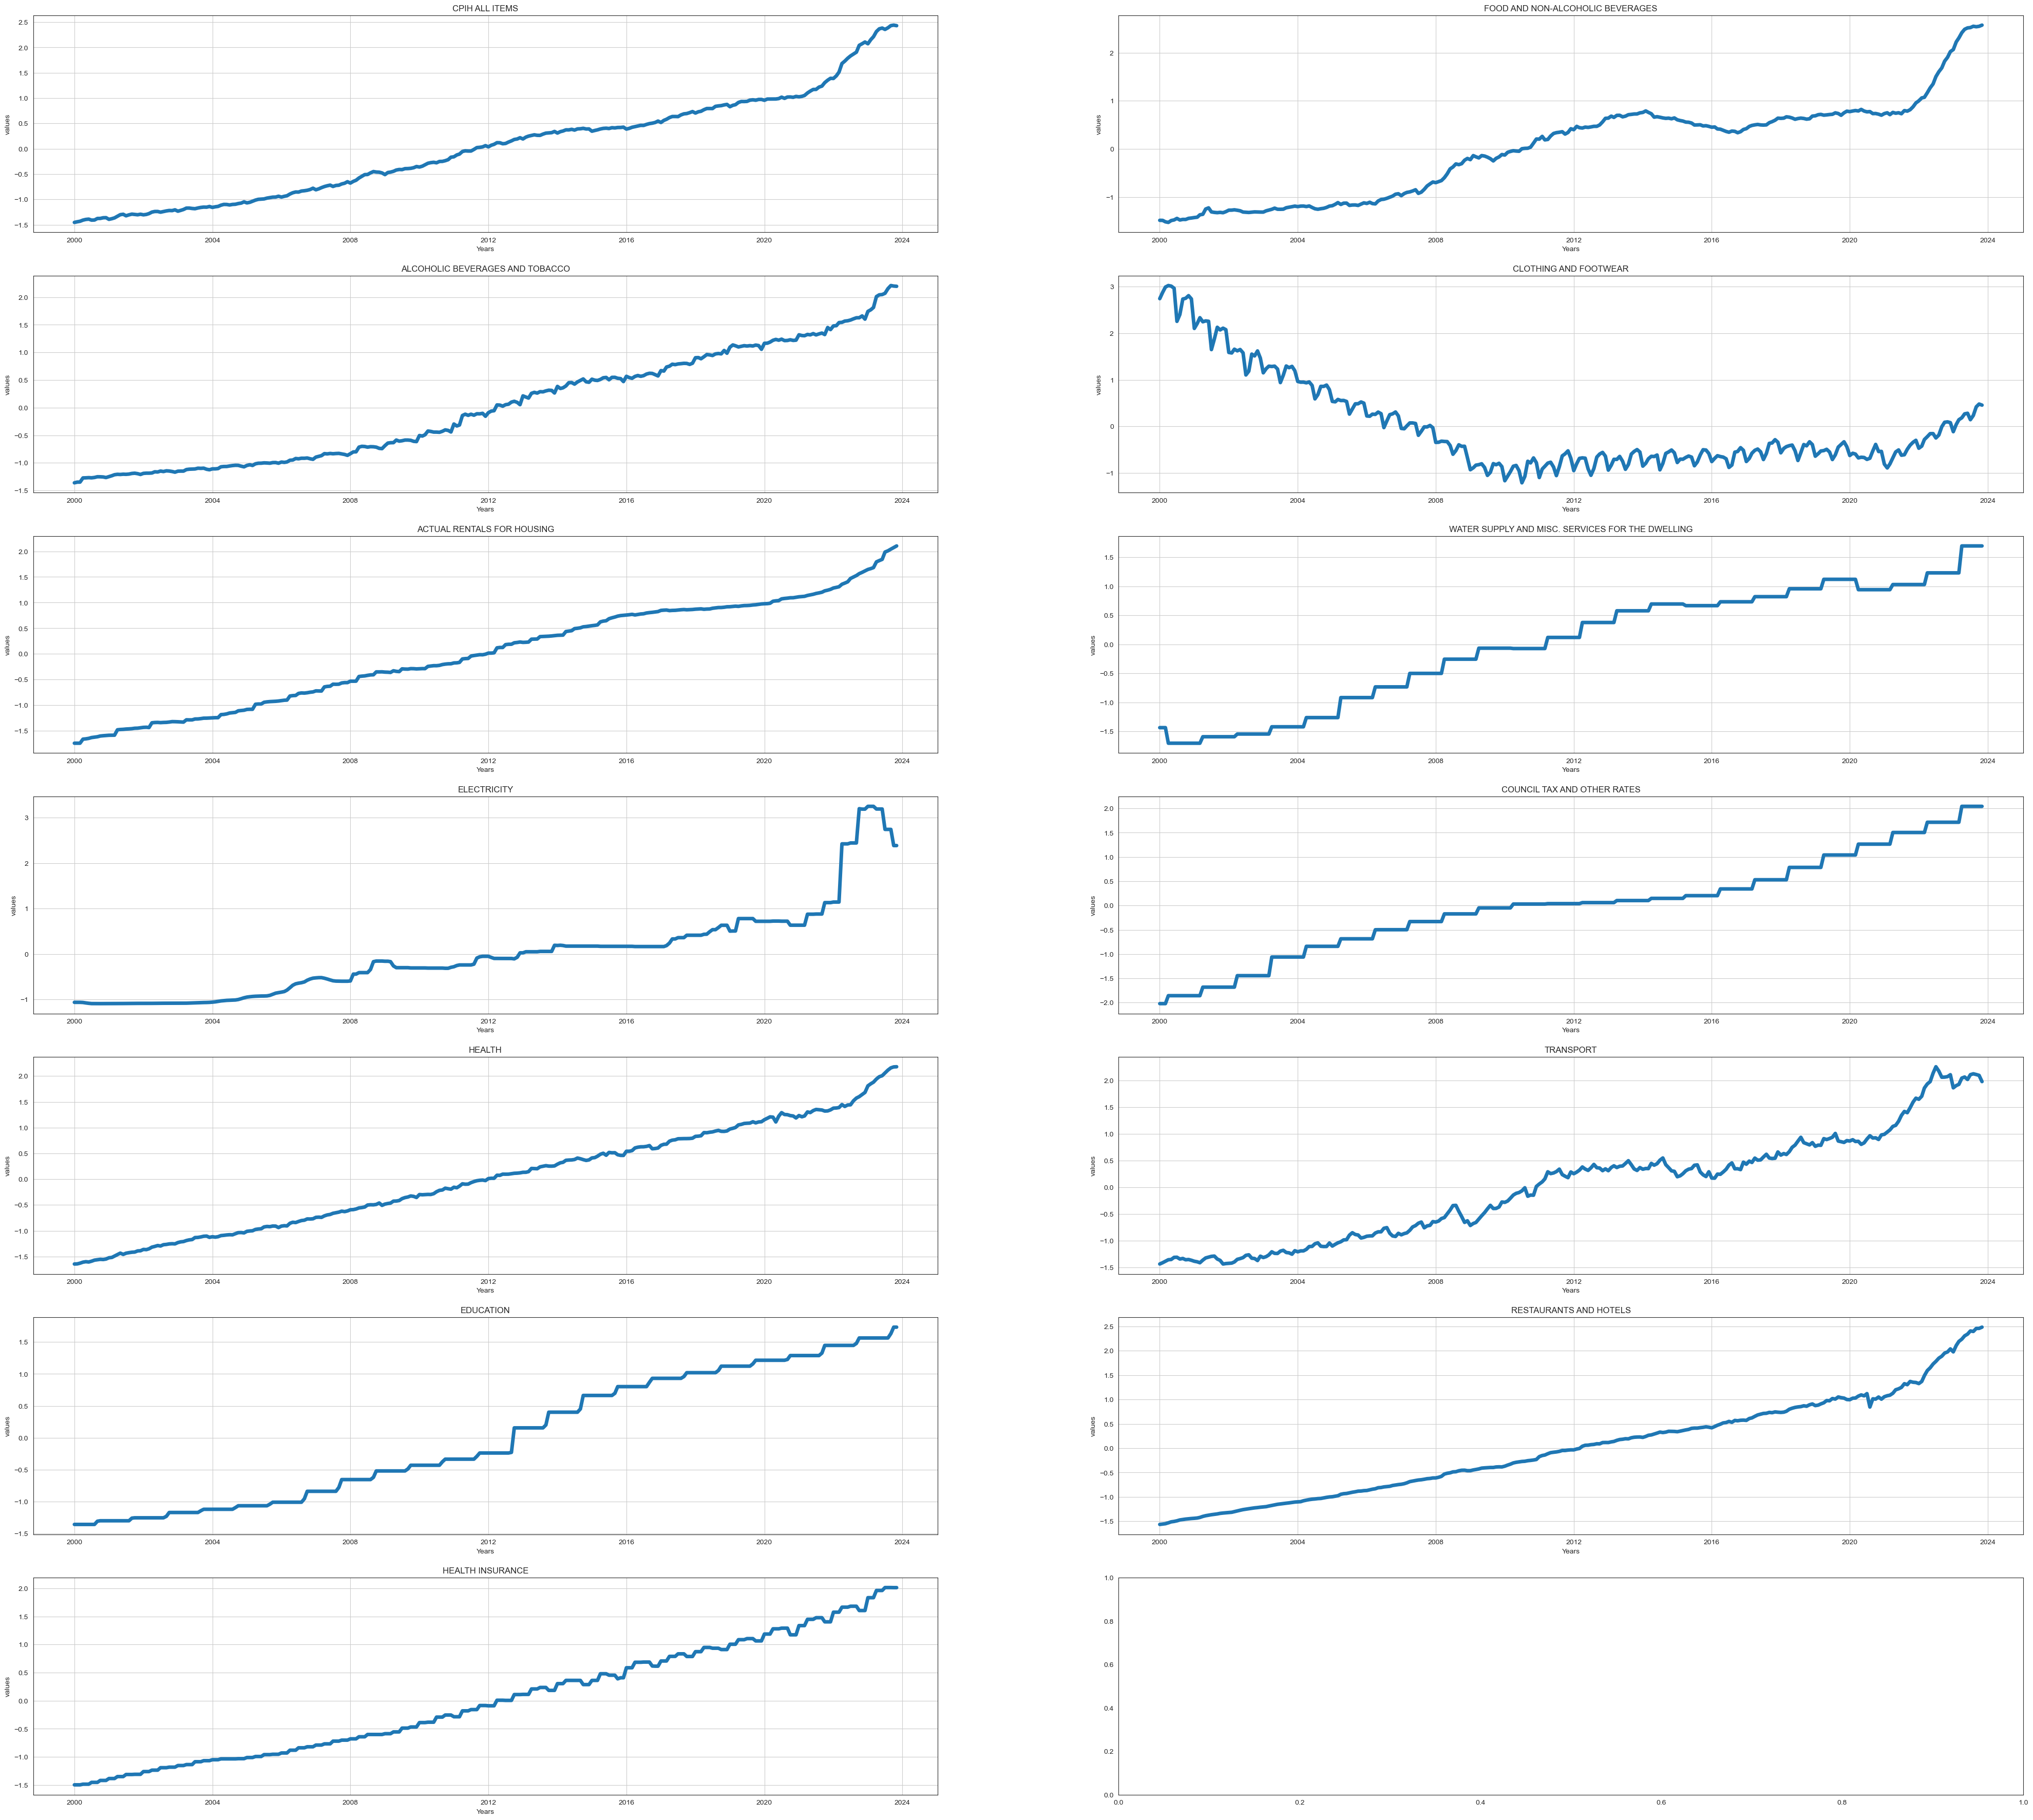

In [141]:
# Create subplots
fig, axes = plt.subplots(7, 2, figsize=(50, 45))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in seasonal_features
for i, (col, individual) in enumerate(cpih_14_from2000_normal.items()):
    # Plot seasonal values in the current subplot
    ax = axes[i]
    ax.plot(individual, linewidth=5)
    ax.set_title('{}'.format(stripped_index_dict[col]))
    ax.set_xlabel('Years')
    ax.set_ylabel('values')
    ax.grid(True)

In [62]:
cpih_ref = pd.DataFrame(cpih_14_from2000_normal.iloc[:,0])
cpih_ref

L522
months              
2000-01-01 -1.453679
2000-02-01 -1.441100
2000-03-01 -1.431022
2000-04-01 -1.408433
2000-05-01 -1.395244
...              ...
2023-07-01  2.356445
2023-08-01  2.388503
2023-09-01  2.431788
2023-10-01  2.441189
2023-11-01  2.430300

[287 rows x 1 columns]

In [63]:
merged_df = pd.merge(salary_normal, unemployment_normal, on='months').merge(cpih_ref, on='months')
print(merged_df)


            Real AWE  unemployment_percentage      L522
months                                                 
2000-01-01 -2.745353                 0.213187 -1.453679
2000-02-01 -2.754727                 0.213187 -1.441100
2000-03-01 -2.845165                 0.139871 -1.431022
2000-04-01 -2.825375                 0.066556 -1.408433
2000-05-01 -2.731332                -0.006760 -1.395244
...              ...                      ...       ...
2023-02-01  0.874467                -1.179806  2.155912
2023-03-01  0.862120                -1.253122  2.212521
2023-04-01  0.920131                -1.106491  2.314647
2023-05-01  1.034224                -0.959860  2.367943
2023-06-01  1.094691                -0.886545  2.383295

[279 rows x 3 columns]


In [64]:
merged = pd.merge(salary_normal, unemployment_normal, left_index=True, right_index=True).merge(cpih_ref, left_index=True, right_index=True)
merged

Real AWE  unemployment_percentage      L522
months                                                 
2000-01-01 -2.745353                 0.213187 -1.453679
2000-02-01 -2.754727                 0.213187 -1.441100
2000-03-01 -2.845165                 0.139871 -1.431022
2000-04-01 -2.825375                 0.066556 -1.408433
2000-05-01 -2.731332                -0.006760 -1.395244
...              ...                      ...       ...
2023-02-01  0.874467                -1.179806  2.155912
2023-03-01  0.862120                -1.253122  2.212521
2023-04-01  0.920131                -1.106491  2.314647
2023-05-01  1.034224                -0.959860  2.367943
2023-06-01  1.094691                -0.886545  2.383295

[279 rows x 3 columns]

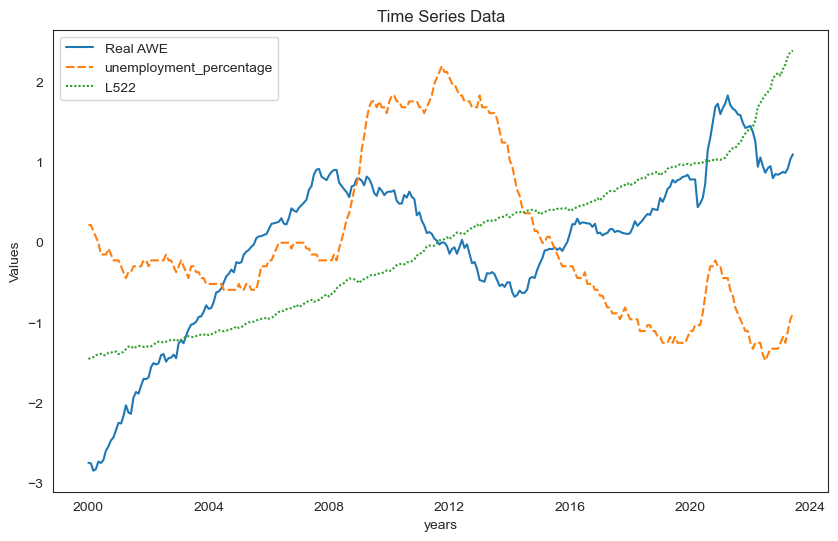

In [127]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df)
plt.title('Time Series Data')
plt.xlabel('years')
plt.ylabel('Values')
plt.grid(False)
plt.show()

# Correlation

In [313]:
correlation_df = merged.corr(method='spearman')

In [69]:
merged.corr(method='pearson'), merged.corr()

(                         Real AWE  unemployment_percentage      L522
 Real AWE                 1.000000                -0.096035  0.675666
 unemployment_percentage -0.096035                 1.000000 -0.265350
 L522                     0.675666                -0.265350  1.000000,
                          Real AWE  unemployment_percentage      L522
 Real AWE                 1.000000                -0.096035  0.675666
 unemployment_percentage -0.096035                 1.000000 -0.265350
 L522                     0.675666                -0.265350  1.000000)

In [305]:
real = merged_df['Real AWE']
unemploy = merged_df['unemployment_percentage']
l522 = merged_df['L522']

# Calculate Kendall's Tau correlation between column1 and column2
corr1_2, _ = kendalltau(real, unemploy)

# Calculate Kendall's Tau correlation between column1 and column3
corr1_3, _ = kendalltau(real, l522)

# Calculate Kendall's Tau correlation between column2 and column3
corr2_3, _ = kendalltau(unemploy, l522)

print("Kendall's Tau correlation between real and unemploy:", corr1_2)
print("Kendall's Tau correlation between real and l522:", corr1_3)
print("Kendall's Tau correlation between unemploy and L522:", corr2_3)

Kendall's Tau correlation between real and unemploy: -0.19716645486684767
Kendall's Tau correlation between real and l522: 0.5150202418710194
Kendall's Tau correlation between unemploy and L522: -0.28206815453621414


In [307]:
# Assuming your data is stored in variables x and y
# Compute Spearman rank correlation coefficient
rho, p_value = spearmanr(real, l522)

# Print the correlation coefficient and p-value
print("Spearman rank correlation coefficient:", rho)
print("p-value:", p_value)

# Check for significance at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant at alpha =", alpha)
else:
    print("The correlation is not statistically significant at alpha =", alpha)


Spearman rank correlation coefficient: 0.6779111273193428
p-value: 6.799253183369273e-39
The correlation is statistically significant at alpha = 0.05


In [308]:
rho, p_value = spearmanr(unemploy, l522)

# Print the correlation coefficient and p-value
print("Spearman rank correlation coefficient:", rho)
print("p-value:", p_value)

# Check for significance at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant at alpha =", alpha)
else:
    print("The correlation is not statistically significant at alpha =", alpha)

Spearman rank correlation coefficient: -0.420533319902856
p-value: 2.2054921946978666e-13
The correlation is statistically significant at alpha = 0.05


In [309]:
rho, p_value = spearmanr(unemploy, real)

# Print the correlation coefficient and p-value
print("Spearman rank correlation coefficient:", rho)
print("p-value:", p_value)

# Check for significance at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant at alpha =", alpha)
else:
    print("The correlation is not statistically significant at alpha =", alpha)

Spearman rank correlation coefficient: -0.2800233573640696
p-value: 2.0169782510781887e-06
The correlation is statistically significant at alpha = 0.05


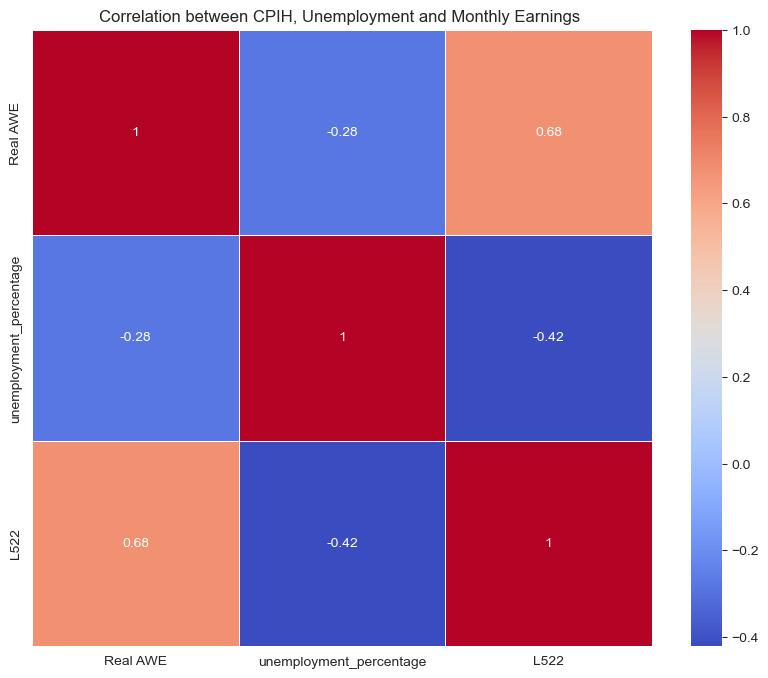

In [314]:
plt.figure(figsize=(10, 8))
#sns.set_palette("viridis")
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title(f'Correlation between CPIH, Unemployment and Monthly Earnings ')
plt.show()

In [70]:
cpih_14_from2000_normal.corr()

cdid      L522      L523      L524      L525      L536      L53A      L53E  \
cdid                                                                         
L522  1.000000  0.973664  0.988171 -0.588094  0.984540  0.957818  0.954721   
L523  0.973664  1.000000  0.948108 -0.650121  0.962377  0.957155  0.924055   
L524  0.988171  0.948108  1.000000 -0.561421  0.982460  0.953632  0.914623   
L525 -0.588094 -0.650121 -0.561421  1.000000 -0.683285 -0.754636 -0.442019   
L536  0.984540  0.962377  0.982460 -0.683285  1.000000  0.986071  0.901337   
L53A  0.957818  0.957155  0.953632 -0.754636  0.986071  1.000000  0.857377   
L53E  0.954721  0.924055  0.914623 -0.442019  0.901337  0.857377  1.000000   
DHYR  0.964675  0.927514  0.944149 -0.701260  0.965707  0.950620  0.908182   
L528  0.991483  0.958628  0.991347 -0.642823  0.994640  0.973562  0.916766   
L529  0.990027  0.968278  0.974283 -0.615461  0.972402  0.953750  0.939467   
L52C  0.970412  0.926274  0.988948 -0.601990  0.984091  0.960701  0.878844   
L52D  0.998305  0.965017  0.988221 -0.597782  0.987146  0.958615  0.949476   
L55J  0.989222  0.945130  0.995940 -0.600296  0.987867  0.959744  0.916407   

cdid      DHYR      L528      L529      L52C      L52D      L55J  
cdid                                                              
L522  0.964675  0.991483  0.990027  0.970412  0.998305  0.989222  
L523  0.927514  0.958628  0.968278  0.926274  0.965017  0.945130  
L524  0.944149  0.991347  0.974283  0.988948  0.988221  0.995940  
L525 -0.701260 -0.642823 -0.615461 -0.601990 -0.597782 -0.600296  
L536  0.965707  0.994640  0.972402  0.984091  0.987146  0.987867  
L53A  0.950620  0.973562  0.953750  0.960701  0.958615  0.959744  
L53E  0.908182  0.916766  0.939467  0.878844  0.949476  0.916407  
DHYR  1.000000  0.973977  0.962459  0.934065  0.971783  0.963542  
L528  0.973977  1.000000  0.979064  0.984948  0.994448  0.996508  
L529  0.962459  0.979064  1.000000  0.952428  0.985322  0.977403  
L52C  0.934065  0.984948  0.952428  1.000000  0.973123  0.988930  
L52D  0.971783  0.994448  0.985322  0.973123  1.000000  0.991799  
L55J  0.963542  0.996508  0.977403  0.988930  0.991799  1.000000

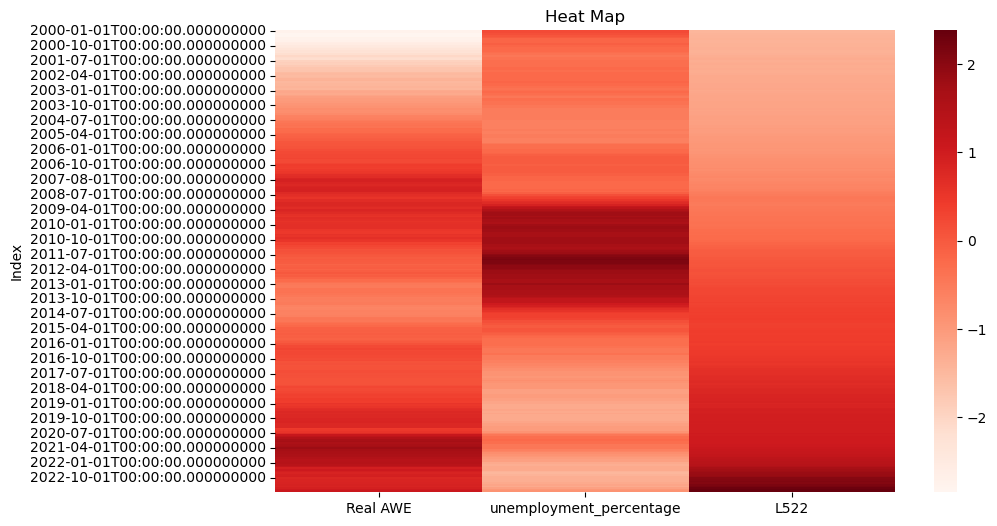

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged, cmap="Reds")  # Adjust the color map as needed
plt.title('Heat Map')

plt.ylabel('Index')
plt.show()

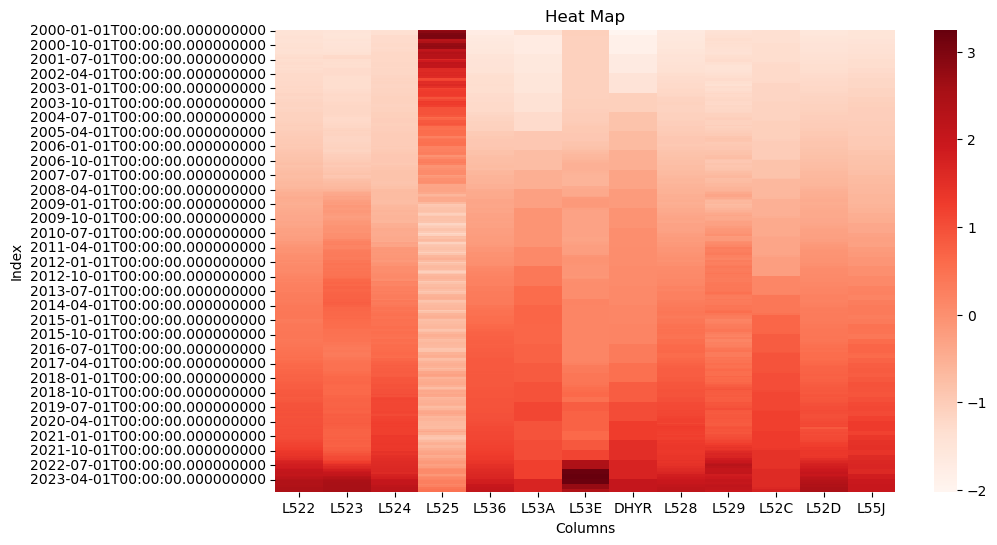

In [73]:
plt.figure(figsize=(10, 6))
sns.heatmap(cpih_14_from2000_normal, cmap="Reds")  # Adjust the color map as needed
plt.title('Heat Map')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.show()

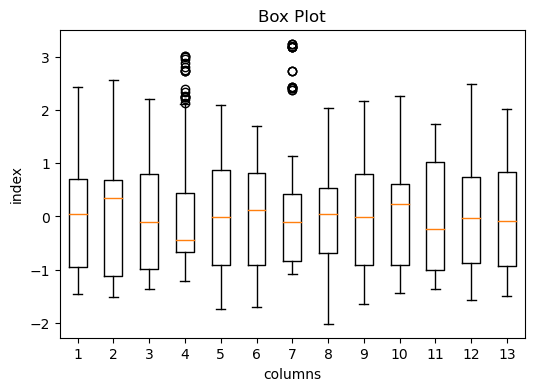

In [76]:
plt.figure(figsize=(6, 4))
plt.boxplot(cpih_14_from2000_normal) 
plt.xlabel('columns')
plt.ylabel('index')
plt.title('Box Plot')
plt.grid(False)
plt.show()

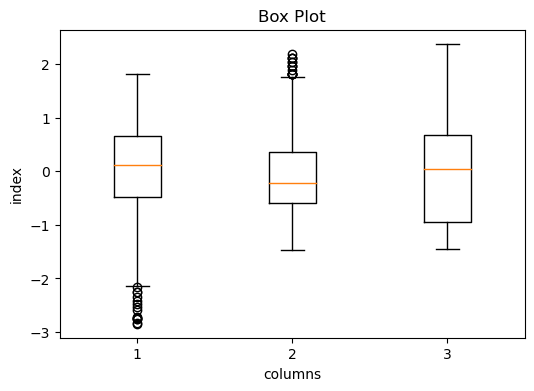

In [78]:
plt.figure(figsize=(6, 4))
plt.boxplot(merged) 
plt.xlabel('columns')
plt.ylabel('index')
plt.title('Box Plot')
plt.grid(False)
plt.show()

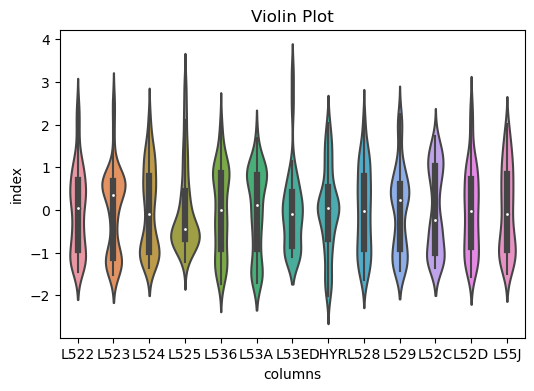

In [80]:
plt.figure(figsize=(6, 4))
sns.violinplot(cpih_14_from2000_normal, inner='box', linewidth=1.5)
plt.xlabel('columns')
plt.ylabel('index')
plt.title('Violin Plot')
plt.grid(False)
plt.show()

# Outlier Detection

In [82]:
q1, q3 = np.percentile(merged, [20, 80], axis=0)

print(q1,q3)

# Compute the interquartile range
iqr = q3 - q1

# Define the lower and upper bounds for outliers
whisker_low = q1 - 1.5 * iqr
whisker_high = q3 + 1.5 * iqr

print(whisker_low,whisker_high)


[-0.62311613 -0.88654462 -1.09669718] [0.77171959 1.23960256 0.84853244]
[-2.71536972 -4.07576539 -4.0145416 ] [2.86397318 4.42882334 3.76637687]


In [83]:
merged.iloc[:,0], whisker_high[0], merged.iloc[:,0] > whisker_high[0]

(months
 2000-01-01   -2.745353
 2000-02-01   -2.754727
 2000-03-01   -2.845165
 2000-04-01   -2.825375
 2000-05-01   -2.731332
                 ...   
 2023-02-01    0.874467
 2023-03-01    0.862120
 2023-04-01    0.920131
 2023-05-01    1.034224
 2023-06-01    1.094691
 Name: Real AWE, Length: 279, dtype: float64,
 2.8639731758337605,
 months
 2000-01-01    False
 2000-02-01    False
 2000-03-01    False
 2000-04-01    False
 2000-05-01    False
               ...  
 2023-02-01    False
 2023-03-01    False
 2023-04-01    False
 2023-05-01    False
 2023-06-01    False
 Name: Real AWE, Length: 279, dtype: bool)

In [84]:
outliers = pd.DataFrame()

for column in merged.columns:
    column_whisker_high = whisker_high[merged.columns.get_loc(column)]
    column_whisker_low = whisker_low[merged.columns.get_loc(column)]
    
    # Filter outliers for the current column
    column_outliers = merged[(merged[column] > column_whisker_high) | (merged[column] < column_whisker_low)]
    
    
     # Check if there are any outliers for the current column
    if not column_outliers.empty:
        print(f"Outliers in column '{column}':")
        print(column_outliers)
        print()  # Add a newline for readability
        
    # Concatenate the outliers for the current column with the existing outliers DataFrame
    outliers = pd.concat([outliers, column_outliers])

Outliers in column 'Real AWE':
            Real AWE  unemployment_percentage      L522
months                                                 
2000-01-01 -2.745353                 0.213187 -1.453679
2000-02-01 -2.754727                 0.213187 -1.441100
2000-03-01 -2.845165                 0.139871 -1.431022
2000-04-01 -2.825375                 0.066556 -1.408433
2000-05-01 -2.731332                -0.006760 -1.395244
2000-06-01 -2.748619                -0.153390 -1.389225



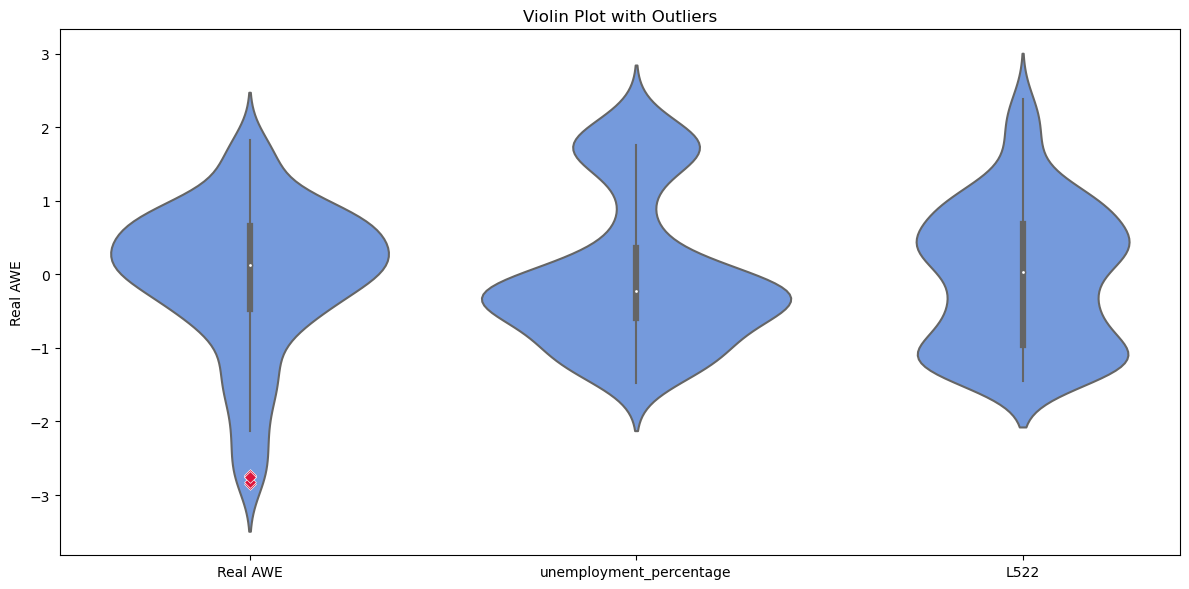

In [86]:
# Create the violin plot
plt.figure(figsize=(12,6))
sns.violinplot(data=merged, color='CornflowerBlue')

# Overlay outliers on the violin plot
if not outliers.empty:
    sns.scatterplot( data = outliers,x=0,y=outliers['Real AWE'], marker='D', color='crimson')

# Customize plot appearance
plt.title('Violin Plot with Outliers')

plt.tight_layout()
plt.show()


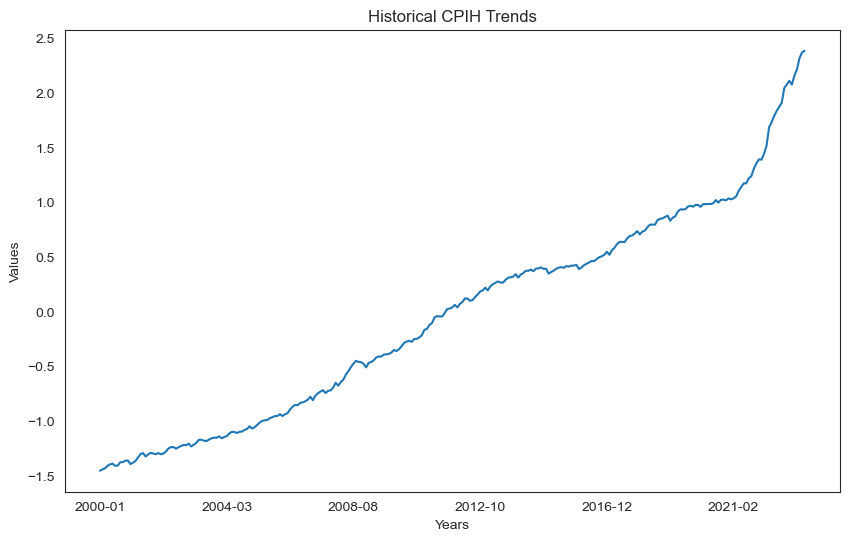

In [137]:
merged['L522'].plot(figsize=(10, 6))
plt.title('Historical CPIH Trends')
plt.xlabel('Years')
plt.ylabel('Values')
plt.grid(False)
plt.show()

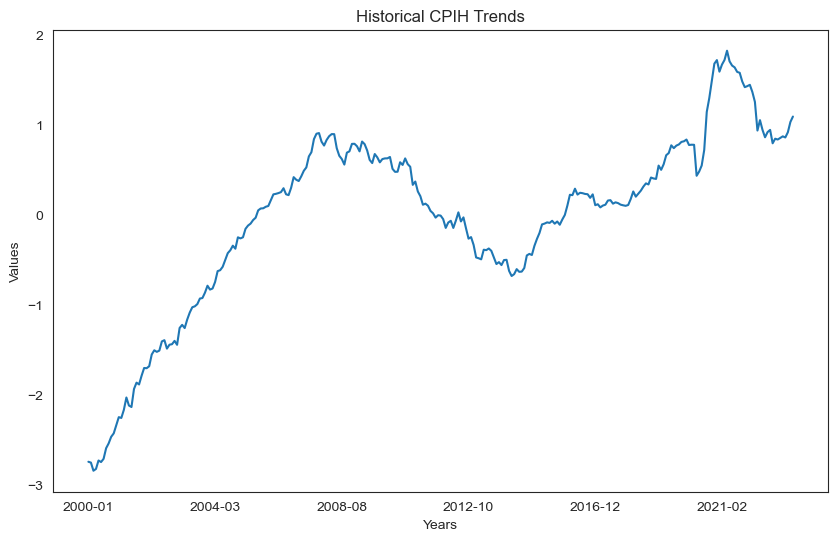

In [136]:
merged['Real AWE'].plot(figsize=(10, 6))
plt.title('Historical CPIH Trends')
plt.xlabel('Years')
plt.ylabel('Values')
plt.grid(False)
plt.show()

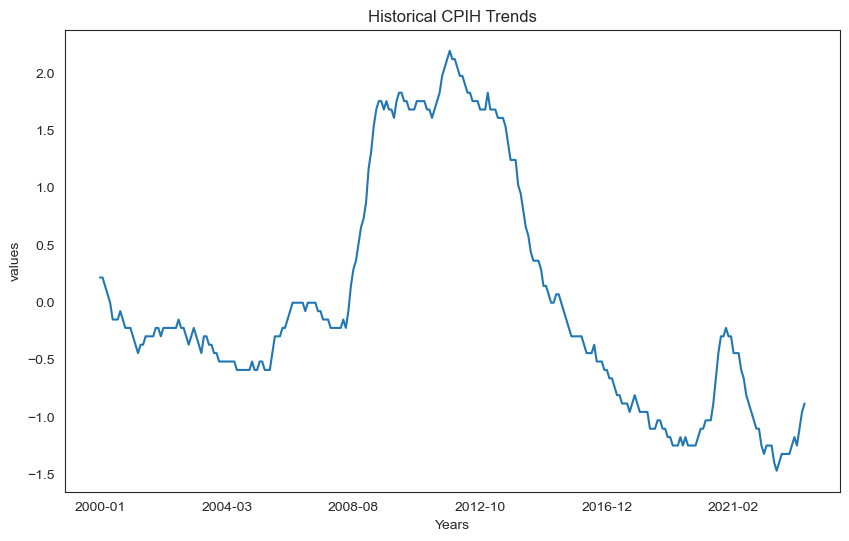

In [135]:
merged['unemployment_percentage'].plot(figsize=(10, 6))
plt.title('Historical CPIH Trends')
plt.xlabel('Years')
plt.ylabel('values')
plt.grid(False)
plt.show()

# Seasonal Decomposition

In [92]:
merged.index = merged.index.strftime('%Y-%m')
print(merged)

         Real AWE  unemployment_percentage      L522
months                                              
2000-01 -2.745353                 0.213187 -1.453679
2000-02 -2.754727                 0.213187 -1.441100
2000-03 -2.845165                 0.139871 -1.431022
2000-04 -2.825375                 0.066556 -1.408433
2000-05 -2.731332                -0.006760 -1.395244
...           ...                      ...       ...
2023-02  0.874467                -1.179806  2.155912
2023-03  0.862120                -1.253122  2.212521
2023-04  0.920131                -1.106491  2.314647
2023-05  1.034224                -0.959860  2.367943
2023-06  1.094691                -0.886545  2.383295

[279 rows x 3 columns]


In [93]:
decomposition_results = {}
for col in merged.columns:
    decomposition_results[col] = seasonal_decompose(merged[col], model='additive', period=12, extrapolate_trend='freq')

# Extract trend, seasonal, and residual components for each column
trend_features = pd.DataFrame({col: decomposition_results[col].trend for col in merged.columns})
seasonal_features = pd.DataFrame({col: decomposition_results[col].seasonal for col in merged.columns})
residual_features = pd.DataFrame({col: decomposition_results[col].resid for col in merged.columns})

# Optional: You can also add additional features based on the trend, seasonal, and residual components
# For example, you can calculate the slope of the trend component or the variance of the residual component

# Add trend, seasonal, and residual features to the merged dataset
seasonal_merged = pd.concat([merged, trend_features.add_suffix('_trend'), 
                       seasonal_features.add_suffix('_seasonal'), 
                       residual_features.add_suffix('_residual')], axis=1)

In [94]:
seasonal_merged

Real AWE  unemployment_percentage      L522  Real AWE_trend  \
months                                                                 
2000-01 -2.745353                 0.213187 -1.453679       -2.978094   
2000-02 -2.754727                 0.213187 -1.441100       -2.921537   
2000-03 -2.845165                 0.139871 -1.431022       -2.864979   
2000-04 -2.825375                 0.066556 -1.408433       -2.808421   
2000-05 -2.731332                -0.006760 -1.395244       -2.751864   
...           ...                      ...       ...             ...   
2023-02  0.874467                -1.179806  2.155912        0.695612   
2023-03  0.862120                -1.253122  2.212521        0.649276   
2023-04  0.920131                -1.106491  2.314647        0.602941   
2023-05  1.034224                -0.959860  2.367943        0.556605   
2023-06  1.094691                -0.886545  2.383295        0.510270   

         unemployment_percentage_trend  L522_trend  Real AWE_seasonal  \
months                                                                  
2000-01                       0.033191   -1.442162           0.000193   
2000-02                       0.010547   -1.435238           0.012132   
2000-03                      -0.012097   -1.428313           0.006747   
2000-04                      -0.034741   -1.421389          -0.018693   
2000-05                      -0.057385   -1.414465          -0.009728   
...                                ...         ...                ...   
2023-02                      -1.400237    2.212726           0.000899   
2023-03                      -1.416077    2.270484           0.003834   
2023-04                      -1.431917    2.328243           0.000193   
2023-05                      -1.447757    2.386001           0.012132   
2023-06                      -1.463597    2.443760           0.006747   

         unemployment_percentage_seasonal  L522_seasonal  Real AWE_residual  \
months                                                                        
2000-01                          0.013306      -0.001079           0.232548   
2000-02                          0.012872       0.003489           0.154678   
2000-03                          0.003402       0.000216           0.013068   
2000-04                         -0.006426       0.002432           0.001739   
2000-05                         -0.001723       0.011517           0.030260   
...                                   ...            ...                ...   
2023-02                         -0.003903      -0.013111           0.177956   
2023-03                         -0.011316      -0.007218           0.209009   
2023-04                          0.013306      -0.001079           0.316997   
2023-05                          0.012872       0.003489           0.465486   
2023-06                          0.003402       0.000216           0.577675   

         unemployment_percentage_residual  L522_residual  
months                                                    
2000-01                          0.166690      -0.010438  
2000-02                          0.189767      -0.009350  
2000-03                          0.148566      -0.002925  
2000-04                          0.107723       0.010524  
2000-05                          0.052348       0.007703  
...                                   ...            ...  
2023-02                          0.224334      -0.043703  
2023-03                          0.174271      -0.050745  
2023-04                          0.312121      -0.012516  
2023-05                          0.475025      -0.021547  
2023-06                          0.573650      -0.060680  

[279 rows x 12 columns]

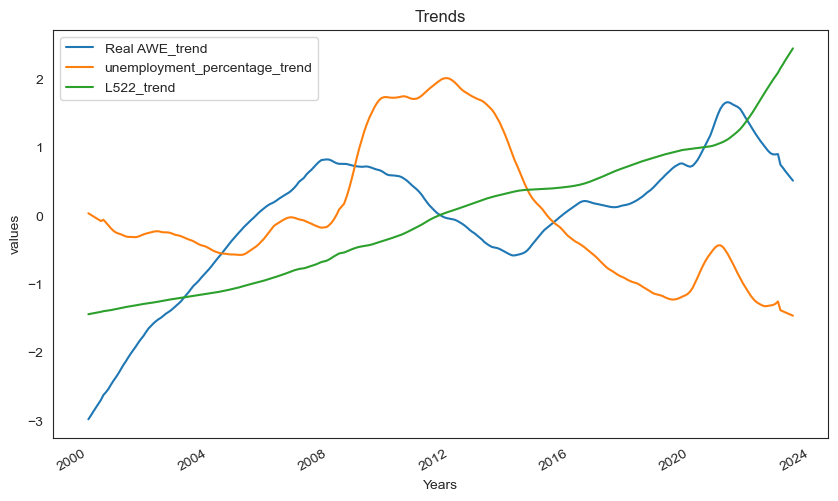

In [134]:
seasonal_merged[['Real AWE_trend', 'unemployment_percentage_trend','L522_trend'] ].plot(figsize=(10, 6))
plt.title('Trends')
plt.xlabel('Years')
plt.ylabel('values')
plt.grid(False)
plt.show()

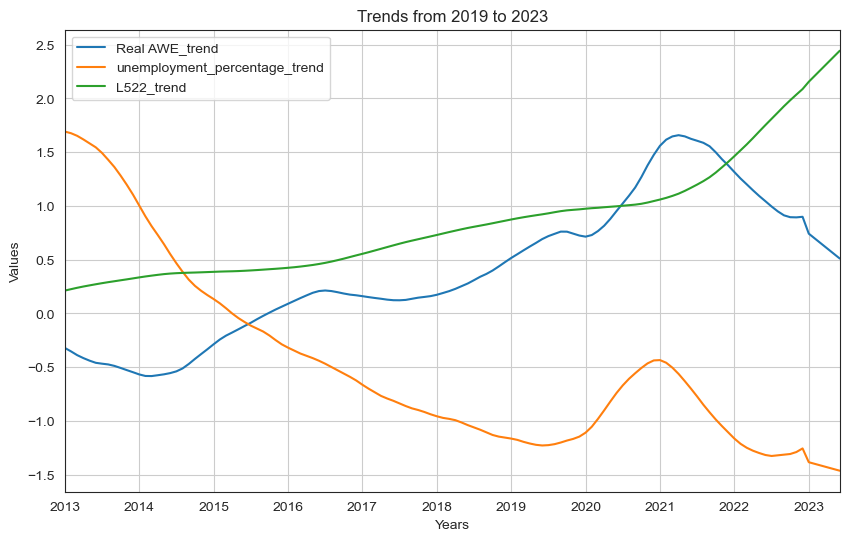

In [133]:

subset_2013_2023 = seasonal_merged['2013':'2023']

# Plot the subsetted data
subset_2013_2023[['Real AWE_trend', 'unemployment_percentage_trend', 'L522_trend']].plot(figsize=(10, 6))
plt.title('Trends from 2019 to 2023')
plt.xlabel('Years')
plt.ylabel('Values')
plt.grid(True)
plt.show()


In [97]:
merged.dtypes

Real AWE                   float64
unemployment_percentage    float64
L522                       float64
dtype: object

In [98]:
cols_to_drop = ['Real AWE_seasonal',
       'unemployment_percentage_seasonal', 'L522_seasonal',
       'Real AWE_residual', 'unemployment_percentage_residual',
       'L522_residual']
seasonal_merged = seasonal_merged.drop(cols_to_drop, axis=1)

seasonal_merged.columns

Index(['Real AWE', 'unemployment_percentage', 'L522', 'Real AWE_trend',
       'unemployment_percentage_trend', 'L522_trend'],
      dtype='object')

In [99]:
q1, q3 = np.percentile(cpih_14_from2000_normal, [20, 80], axis=0)

print(q1,q3)

# Compute the interquartile range
iqr = q3 - q1

# Define the lower and upper bounds for outliers
whisker_low = q1 - 1.5 * iqr
whisker_high = q3 + 1.5 * iqr

print(whisker_low,whisker_high)


[-1.07964005 -1.18514356 -1.04875251 -0.71324579 -1.1076436  -1.26089099
 -0.99808853 -0.8405676  -1.04031385 -1.096292   -1.06675497 -1.01823721
 -1.03091296] [0.86964757 0.71860796 1.08712992 0.76661645 0.92428123 0.94277521
 0.63299672 0.78482963 0.98370744 0.8352159  1.12236898 0.89032072
 1.00475963]
[-4.00357148 -4.04077084 -4.25257614 -2.93303916 -4.15553085 -4.56639031
 -3.44471641 -3.27866345 -4.07634579 -3.99355385 -4.3504409  -3.8810741
 -4.08442184] [3.793579   3.57423523 4.29095355 2.98640982 3.97216847 4.24827453
 3.0796246  3.22292548 4.01973939 3.73247775 4.40605491 3.75315761
 4.05826852]


In [100]:
# Initialize an empty DataFrame to store outliers
outliers_cpih_14 = pd.DataFrame()

# Iterate over each column and filter outliers
for column in cpih_14_from2000_normal.columns:
    # Extract the corresponding upper and lower whisker values for the current column
    column_whisker_high = whisker_high[cpih_14_from2000_normal.columns.get_loc(column)]
    column_whisker_low = whisker_low[cpih_14_from2000_normal.columns.get_loc(column)]
    
    # Filter outliers for the current column
    column_outliers = cpih_14_from2000_normal[(cpih_14_from2000_normal[column] > column_whisker_high) | (cpih_14_from2000_normal[column] < column_whisker_low)]
    
    
     # Check if there are any outliers for the current column
    if not column_outliers.empty:
        print(f"Outliers in column '{stripped_index_dict[column],column}':")
        print(column_outliers)
        print()  # Add a newline for readability
        
    # Concatenate the outliers for the current column with the existing outliers DataFrame
    outliers_cpih_14 = pd.concat([outliers_cpih_14, column_outliers])

Outliers in column '('CLOTHING AND FOOTWEAR', 'L525')':
cdid            L522      L523      L524      L525      L536      L53A  \
months                                                                   
2000-03-01 -1.431022 -1.511565 -1.348675  2.992217 -1.739669 -1.434124   
2000-04-01 -1.408433 -1.523714 -1.272916  3.025218 -1.660845 -1.702309   
2000-05-01 -1.395244 -1.485215 -1.271307  3.012850 -1.655327 -1.702309   

cdid            L53E      DHYR      L528      L529      L52C      L52D  \
months                                                                   
2000-03-01 -1.063429 -2.020495 -1.628516 -1.387141 -1.359543 -1.550440   
2000-04-01 -1.066708 -1.856812 -1.609080 -1.359076 -1.359543 -1.532315   
2000-05-01 -1.076435 -1.856812 -1.599744 -1.354689 -1.359543 -1.512296   

cdid            L55J  
months                
2000-03-01 -1.496404  
2000-04-01 -1.485069  
2000-05-01 -1.485069  

Outliers in column '('ELECTRICITY', 'L53E')':
cdid            L522      L523      L524

In [101]:
decomposition_results = {}
for col in cpih_14_from2000_normal.columns:
    decomposition_results[col] = seasonal_decompose(cpih_14_from2000_normal[col], model='additive', period=12, extrapolate_trend='freq')

# Extract trend, seasonal, and residual components for each column
trend_features = pd.DataFrame({col: decomposition_results[col].trend for col in cpih_14_from2000_normal.columns})
seasonal_features = pd.DataFrame({col: decomposition_results[col].seasonal for col in cpih_14_from2000_normal.columns})
residual_features = pd.DataFrame({col: decomposition_results[col].resid for col in cpih_14_from2000_normal.columns})


CPIH_seasonal_merged = pd.concat([cpih_14_from2000_normal, trend_features.add_suffix('_trend'), 
                       seasonal_features.add_suffix('_seasonal'), 
                       residual_features.add_suffix('_residual')], axis=1)

In [102]:
CPIH_seasonal_merged

L522      L523      L524      L525      L536      L53A  \
months                                                                   
2000-01-01 -1.453679 -1.480461 -1.361507  2.743405 -1.740099 -1.434124   
2000-02-01 -1.441100 -1.481928 -1.349129  2.879625 -1.740099 -1.434124   
2000-03-01 -1.431022 -1.511565 -1.348675  2.992217 -1.739669 -1.434124   
2000-04-01 -1.408433 -1.523714 -1.272916  3.025218 -1.660845 -1.702309   
2000-05-01 -1.395244 -1.485215 -1.271307  3.012850 -1.655327 -1.702309   
...              ...       ...       ...       ...       ...       ...   
2023-07-01  2.356445  2.520700  2.070767  0.142467  1.985696  1.696430   
2023-08-01  2.388503  2.548049  2.154861  0.233872  2.009415  1.696430   
2023-09-01  2.431788  2.538013  2.211061  0.418845  2.042306  1.696430   
2023-10-01  2.441189  2.546875  2.201364  0.478524  2.072546  1.696430   
2023-11-01  2.430300  2.571524  2.196949  0.455396  2.104577  1.696430   

                L53E      DHYR      L528      L529  ...  L525_residual  \
months                                              ...                  
2000-01-01 -1.063254 -2.020495 -1.645074 -1.439183  ...      -0.171425   
2000-02-01 -1.063342 -2.020495 -1.642314 -1.414308  ...      -0.050226   
2000-03-01 -1.063429 -2.020495 -1.628516 -1.387141  ...       0.037957   
2000-04-01 -1.066708 -1.856812 -1.609080 -1.359076  ...       0.097811   
2000-05-01 -1.076435 -1.856812 -1.599744 -1.354689  ...       0.105614   
...              ...       ...       ...       ...  ...            ...   
2023-07-01  2.743889  2.042731  2.060443  2.110562  ...       0.096062   
2023-08-01  2.743889  2.042731  2.115462  2.126813  ...       0.034724   
2023-09-01  2.743889  2.042731  2.158796  2.113254  ...      -0.025291   
2023-10-01  2.388004  2.042731  2.177292  2.097551  ...      -0.031704   
2023-11-01  2.388004  2.042731  2.180521  1.980955  ...      -0.134398   

            L536_residual  L53A_residual  L53E_residual  DHYR_residual  \
months                                                                   
2000-01-01      -0.000912       0.311788       0.009378       0.008178   
2000-02-01      -0.004891       0.319388       0.014142       0.007846   
2000-03-01      -0.008291       0.326988       0.026111       0.007514   
2000-04-01       0.014225      -0.064037      -0.038293       0.001614   
2000-05-01       0.012092      -0.056437      -0.039301       0.001231   
...                   ...            ...            ...            ...   
2023-07-01       0.082875       0.117986      -0.782577       0.053602   
2023-08-01       0.075915       0.098085      -0.861453       0.043905   
2023-09-01       0.078500       0.078184      -0.952408       0.034207   
2023-10-01       0.071383       0.059555      -1.412438       0.024794   
2023-11-01       0.074067       0.042196      -1.491897       0.015666   

            L528_residual  L529_residual  L52C_residual  L52D_residual  \
months                                                                   
2000-01-01       0.020848      -0.019860      -0.016601       0.013542   
2000-02-01       0.017951      -0.009925      -0.010824       0.003957   
2000-03-01       0.020828       0.004362      -0.005016      -0.006708   
2000-04-01       0.001981      -0.010585       0.000987      -0.013750   
2000-05-01       0.009148      -0.011560       0.007155      -0.014447   
...                   ...            ...            ...            ...   
2023-07-01       0.011938      -0.041735       0.001153      -0.007287   
2023-08-01       0.024002      -0.050714       0.001764      -0.053251   
2023-09-01       0.027351       0.020801       0.031660      -0.052446   
2023-10-01       0.015170       0.025243       0.043814      -0.099585   
2023-11-01      -0.013498      -0.062563       0.044425      -0.122431   

            L55J_residual  
months                     
2000-01-01       0.018286  
2000-02-01       0.019995  
2000-03-01       0.021703  
2000-04-01      -0.02789

In [103]:
seasonal_merged.index = pd.to_datetime(seasonal_merged.index)

In [104]:

 
# Define the target variable (monthly cpih)
cpih = CPIH_seasonal_merged["L522_trend"]
 
# Create lagged features (e.g., previous month and previous year)
cpih_lag1 = cpih.shift(1)  # Previous month's cpih
cpih_lag12 = cpih.shift(12)  # Previous year's cpih
 
# Create differenced feature (remove trend)
differenced = cpih.diff()
 
# Combine features into a single DataFrame
features = pd.DataFrame({"cpih_lag1": cpih_lag1, "cpih_lag12": cpih_lag12, "differenced": differenced})
 


# INTERPOLATION

In [105]:
start_date = '2000-01-01'
end_date = '2023-07-01'
dates = pd.date_range(start=start_date, end=end_date, freq='M', normalize=True).to_period('M').to_timestamp()
real_trial_trend = pd.DataFrame({'months': dates, 'Real AWE_trend': np.nan})
real_trial_trend.set_index('months', inplace=True)
real_trial_trend.loc[real_trial_trend.index <= '2019-09-30', 'Real AWE_trend'] = seasonal_merged['Real AWE_trend'][:'2019-09-30']

In [106]:
seasonal_merged['Real AWE_trend']['2022-03':'2022-9']

months
2022-03-01    1.200294
2022-04-01    1.145157
2022-05-01    1.092592
2022-06-01    1.043946
2022-07-01    0.994560
2022-08-01    0.949378
2022-09-01    0.912350
Name: Real AWE_trend, dtype: float64

In [107]:
real_trial_trend.loc[real_trial_trend.index >= '2022-02-28', 'Real AWE_trend'] = seasonal_merged['Real AWE_trend']['2022-03':'2022-9']

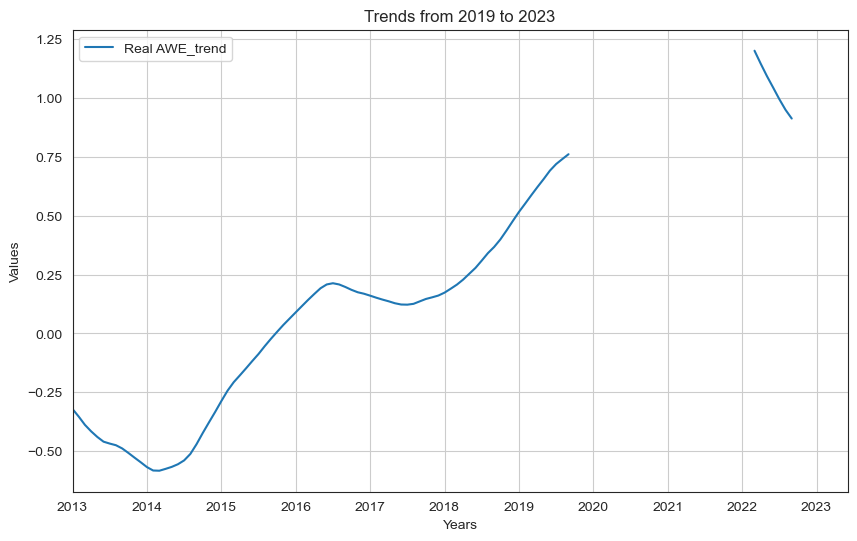

In [132]:
real_trial_trend['2013':].plot(figsize=(10, 6))
plt.title('Trends from 2019 to 2023')
plt.xlabel('Years')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [109]:
inter_real_poly3_trend = pd.DataFrame(real_trial_trend.interpolate(method='polynomial', order = 3))
inter_real_poly2_trend = pd.DataFrame(real_trial_trend.interpolate(method='polynomial', order = 2))
inter_real_linear_trend = pd.DataFrame(real_trial_trend.interpolate(method='linear'))
inter_real_spline2_trend = pd.DataFrame(real_trial_trend.interpolate(method='spline', order = 2))
inter_real_spline3_trend = pd.DataFrame(real_trial_trend.interpolate(method='spline', order = 3))

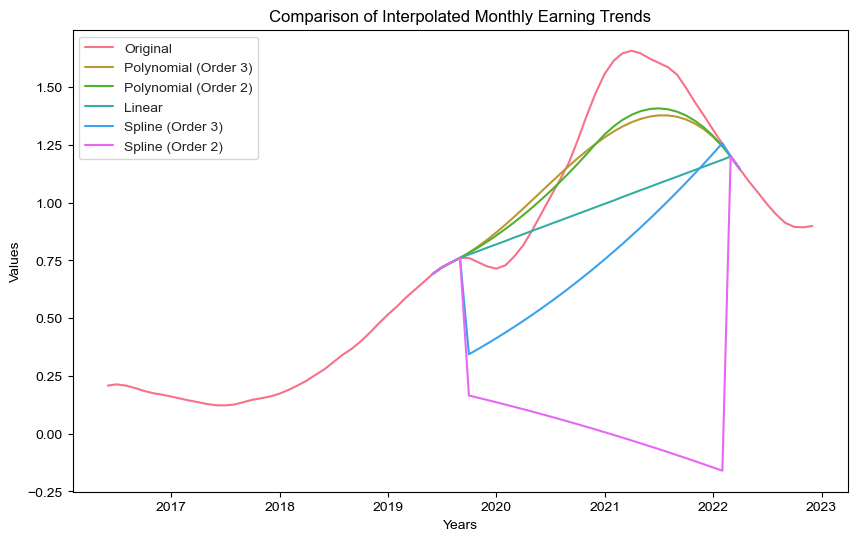

In [110]:
#impo
palette = sns.color_palette("husl", 6)

fig, ax = plt.subplots(figsize=(10, 6))  # Set white background
sns.set_style("white")

# Plot each trend on the same axis with specified labels and colors
ax.plot(seasonal_merged['Real AWE_trend']['06-2016':'12-2022'], label='Original', color=palette[0])
ax.plot(inter_real_poly3_trend['06-2019':'4-2022'], label='Polynomial (Order 3)', color=palette[1])
ax.plot(inter_real_poly2_trend['6-2019':'4-2022'], label='Polynomial (Order 2)', color=palette[2])
ax.plot(inter_real_linear_trend['6-2019':'4-2022'], label='Linear', color=palette[3])
ax.plot(inter_real_spline3_trend['6-2019':'4-2022'], label='Spline (Order 3)', color=palette[4])
ax.plot(inter_real_spline2_trend['6-2019':'4-2022'], label='Spline (Order 2)', color=palette[5])

# Add legend
ax.legend()
ax.grid(False)
# Add labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Values')
ax.set_title('Comparison of Interpolated Monthly Earning Trends')
# Show plot
plt.show()


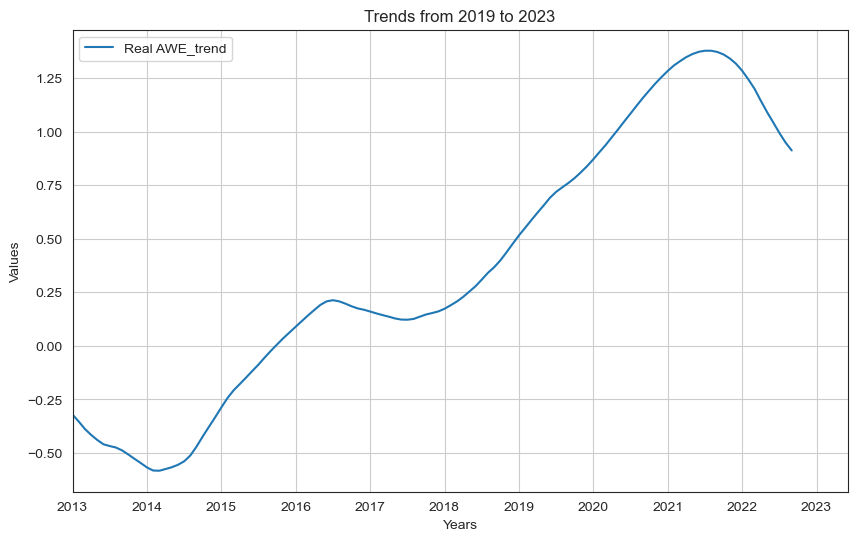

In [131]:
inter_real_poly3_trend['2013':].plot(figsize=(10, 6))
plt.title('Trends from 2019 to 2023')
plt.xlabel('Years')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [112]:
start_date = '2000-01-01'
end_date = '2023-07-01'
dates = pd.date_range(start=start_date, end=end_date, freq='M', normalize=True).to_period('M').to_timestamp()
real_trial_actual = pd.DataFrame({'months': dates, 'Real AWE': np.nan})
real_trial_actual.set_index('months', inplace=True)
real_trial_actual.loc[real_trial_actual.index <= '2019-09-30', 'Real AWE'] = seasonal_merged['Real AWE'][:'2019-09-30']

In [113]:
real_trial_actual.loc[real_trial_actual.index >= '2022-04-28', 'Real AWE'] = seasonal_merged['Real AWE']['2022-05':]

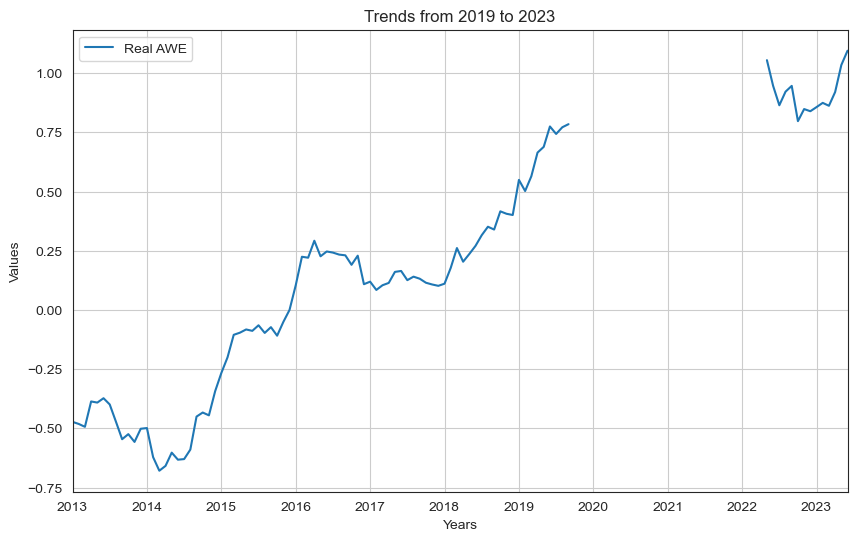

In [130]:
real_trial_actual['2013':].plot(figsize=(10, 6))
plt.title('Trends from 2019 to 2023')
plt.xlabel('Years')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [115]:
inter_real_poly3_actual = pd.DataFrame(real_trial_actual.interpolate(method='polynomial', order = 3))


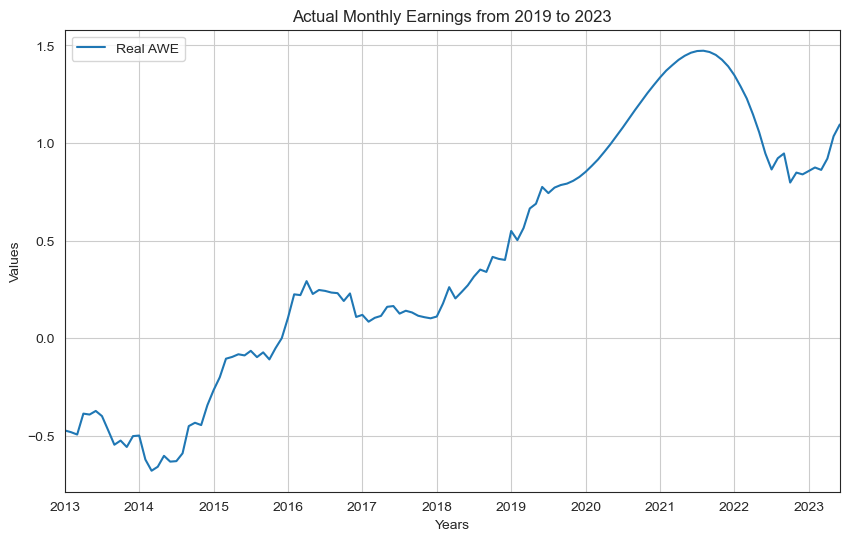

In [129]:
inter_real_poly3_actual['2013':].plot(figsize=(10, 6))
plt.title('Actual Monthly Earnings from 2019 to 2023')
plt.xlabel('Years')
plt.ylabel('Values')
plt.grid(True)
plt.show()

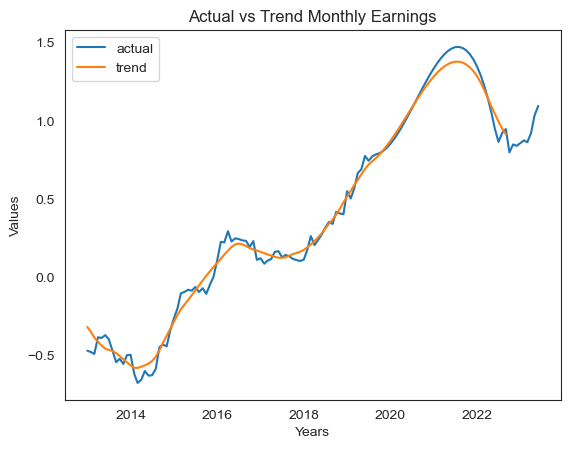

In [144]:
fig, ax = plt.subplots()
 
# Plot data from df1
ax.plot(inter_real_poly3_actual['2013':], label='actual')
ax.plot(inter_real_poly3_trend['2013':], label='trend')

 
# Add legend
ax.legend()
plt.title('Actual vs Trend Monthly Earnings')
plt.xlabel('Years')
plt.ylabel('Values')
# Show the plot
plt.show()

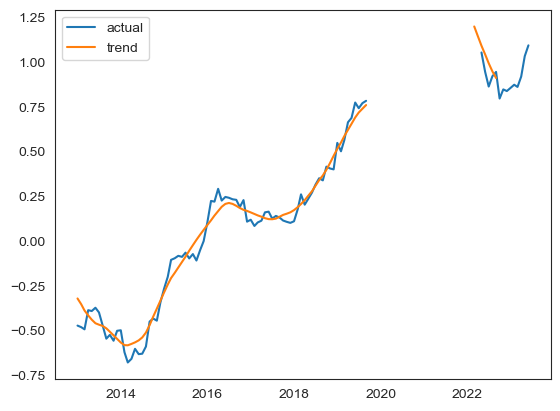

In [145]:
fig, ax = plt.subplots()
 
# Plot data from df1
ax.plot(real_trial_actual['2013':], label='actual')
ax.plot(real_trial_trend['2013':], label='trend')

 
# Add legend
ax.legend()
 
# Show the plot
plt.show()

In [146]:
window_size = 3  # Adjust window size as needed
dummy = inter_real_poly3_actual['2022-07':].rolling(window=window_size).mean()

In [147]:
dummy['2022-10':]

Real AWE
months              
2022-10-01  0.888419
2022-11-01  0.863930
2022-12-01  0.828225
2023-01-01  0.847981
2023-02-01  0.856712
2023-03-01  0.864380
2023-04-01  0.885573
2023-05-01  0.938825
2023-06-01  1.016349

In [148]:
inter_real_poly3_trend.loc[inter_real_poly3_trend.index >= '2022-09-28', 'Real AWE_trend'] = dummy['Real AWE']['2022-10':]

In [149]:
inter_real_poly3_trend['2022-07':]

Real AWE_trend
months                    
2022-07-01        0.994560
2022-08-01        0.949378
2022-09-01        0.912350
2022-10-01        0.888419
2022-11-01        0.863930
2022-12-01        0.828225
2023-01-01        0.847981
2023-02-01        0.856712
2023-03-01        0.864380
2023-04-01        0.885573
2023-05-01        0.938825
2023-06-01        1.016349

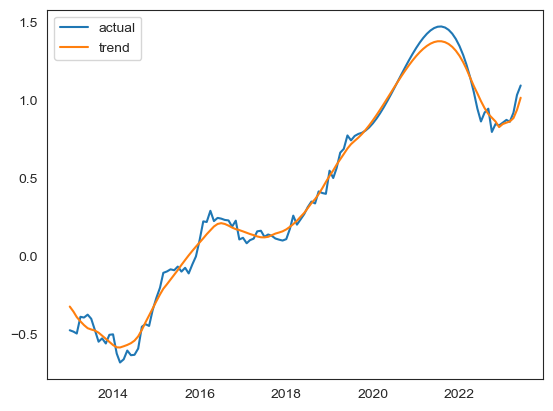

In [150]:
fig, ax = plt.subplots()
 
# Plot data from df1
ax.plot(inter_real_poly3_actual['2013':], label='actual')
ax.plot(inter_real_poly3_trend['2013':], label='trend')

 
# Add legend
ax.legend()
 
# Show the plot
plt.show()

In [151]:
seasonal_merged.head()

Real AWE  unemployment_percentage      L522  Real AWE_trend  \
months                                                                    
2000-01-01 -2.745353                 0.213187 -1.453679       -2.978094   
2000-02-01 -2.754727                 0.213187 -1.441100       -2.921537   
2000-03-01 -2.845165                 0.139871 -1.431022       -2.864979   
2000-04-01 -2.825375                 0.066556 -1.408433       -2.808421   
2000-05-01 -2.731332                -0.006760 -1.395244       -2.751864   

            unemployment_percentage_trend  L522_trend  
months                                                 
2000-01-01                       0.033191   -1.442162  
2000-02-01                       0.010547   -1.435238  
2000-03-01                      -0.012097   -1.428313  
2000-04-01                      -0.034741   -1.421389  
2000-05-01                      -0.057385   -1.414465

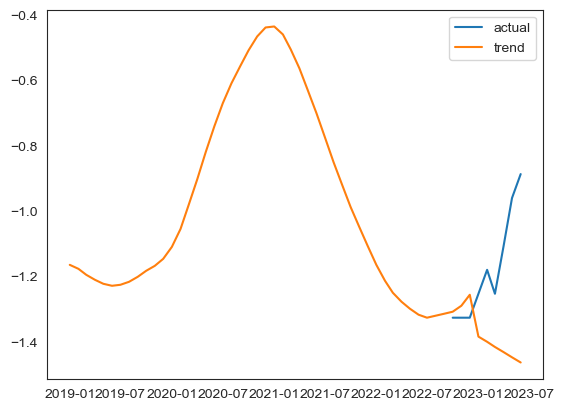

In [156]:
fig, ax = plt.subplots()
 
# Plot data from df1
#ax.plot(inter_unemploy_poly3['2013':], label='actual')
ax.plot(seasonal_merged['unemployment_percentage']['2022-10':], label='actual')
ax.plot(seasonal_merged['unemployment_percentage_trend']['2019':], label='trend')

 
# Add legend
ax.legend()
# Show the plot
plt.show()

In [157]:
start_date = '2012-01-01'
end_date = '2023-07-01'
dates = pd.date_range(start=start_date, end=end_date, freq='M', normalize=True).to_period('M').to_timestamp()
unemploy_trial_trend = pd.DataFrame({'months': dates, 'unemployment_percentage_trend': np.nan})
unemploy_trial_trend.set_index('months', inplace=True)
unemploy_trial_trend.loc[unemploy_trial_trend.index <= '2019-06-30', 'unemployment_percentage_trend'] = seasonal_merged['unemployment_percentage_trend'][:'2019-07']

In [158]:
unemploy_trial_trend.loc[unemploy_trial_trend.index >= '2022-05-28', 'unemployment_percentage_trend'] = seasonal_merged['unemployment_percentage_trend']['2022-06':'2022-12']

<Axes: xlabel='months'>

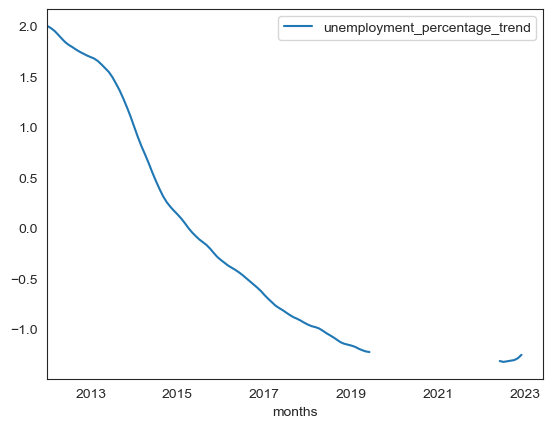

In [159]:
unemploy_trial_trend.plot()

In [160]:
inter_unemploy_poly3_trend = pd.DataFrame(unemploy_trial_trend.interpolate(method='polynomial', order = 3))
inter_unemploy_poly2_trend = pd.DataFrame(unemploy_trial_trend.interpolate(method='polynomial', order = 2))
inter_unemploy_linear_trend = pd.DataFrame(unemploy_trial_trend.interpolate(method='linear'))
inter_unemploy_spline3_trend = pd.DataFrame(unemploy_trial_trend.interpolate(method='spline', order = 3))
inter_unemploy_spline2_trend = pd.DataFrame(unemploy_trial_trend.interpolate(method='spline', order = 2))


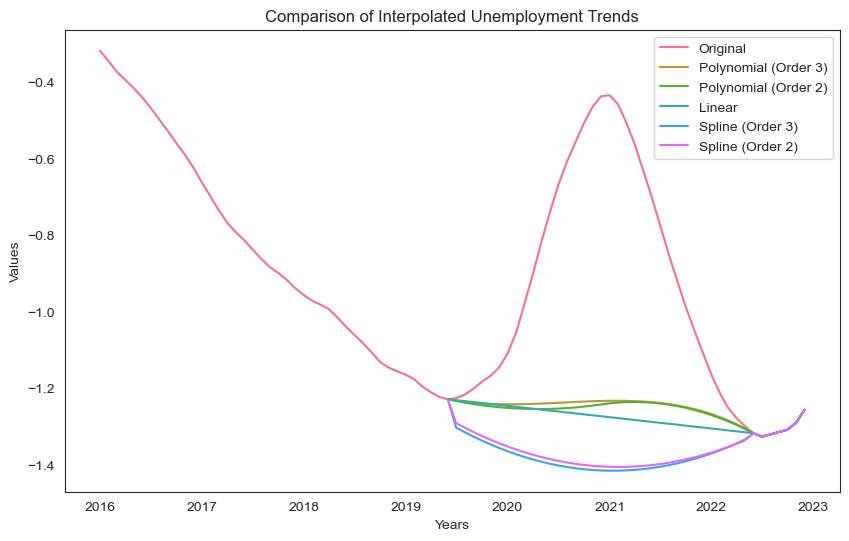

In [161]:
#impo
palette = sns.color_palette("husl", 6)

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style("white")

# Plot each trend on the same axis with specified labels and colors
ax.plot(seasonal_merged['unemployment_percentage_trend']['2016':'12-2022'], label='Original', color=palette[0])
ax.plot(inter_unemploy_poly3_trend['6-2019':'12-2022'], label='Polynomial (Order 3)', color=palette[1])
ax.plot(inter_unemploy_poly2_trend['6-2019':'12-2022'], label='Polynomial (Order 2)', color=palette[2])
ax.plot(inter_unemploy_linear_trend['6-2019':'12-2022'], label='Linear', color=palette[3])
ax.plot(inter_unemploy_spline3_trend['6-2019':'12-2022'], label='Spline (Order 3)', color=palette[4])
ax.plot(inter_unemploy_spline2_trend['6-2019':'12-2022'], label='Spline (Order 2)', color=palette[5])

# Add legend
ax.legend()
ax.grid(False)
# Add labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Values')
ax.set_title('Comparison of Interpolated Unemployment Trends')

# Show plot
plt.show()


<Axes: xlabel='months'>

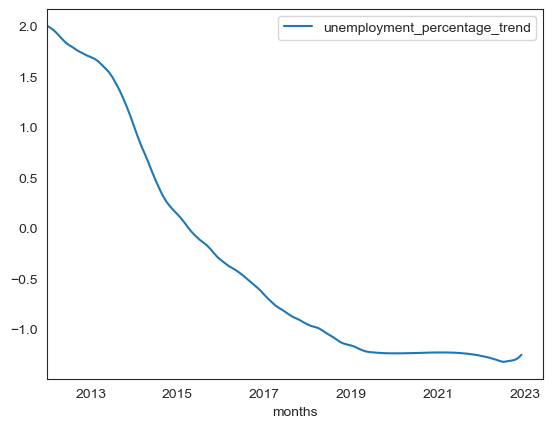

In [162]:
inter_unemploy_poly3_trend.plot()

In [163]:
start_date = '2012-01-01'
end_date = '2023-07-01'
dates = pd.date_range(start=start_date, end=end_date, freq='M', normalize=True).to_period('M').to_timestamp()
unemploy_trial_actual = pd.DataFrame({'months': dates, 'unemployment_percentage': np.nan})
unemploy_trial_actual.set_index('months', inplace=True)
unemploy_trial_actual.loc[unemploy_trial_actual.index <= '2019-10-30', 'unemployment_percentage'] = seasonal_merged['unemployment_percentage'][:'2019-11']

<Axes: xlabel='months'>

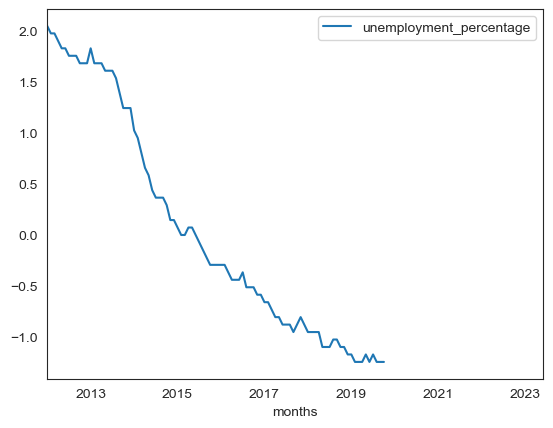

In [164]:
unemploy_trial_actual.plot()

In [165]:
unemploy_trial_actual.loc[unemploy_trial_actual.index >= '2022-10-30', 'unemployment_percentage'] = seasonal_merged['unemployment_percentage']['2022-11':]

<Axes: xlabel='months'>

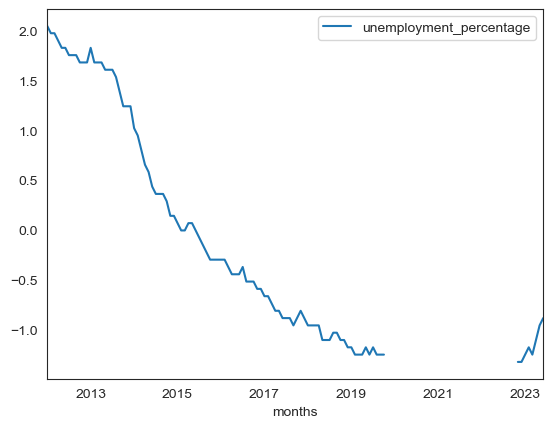

In [166]:
unemploy_trial_actual.plot()

In [167]:
inter_unemploy_poly3_actual = pd.DataFrame(unemploy_trial_actual.interpolate(method='polynomial', order = 3))

<Axes: xlabel='months'>

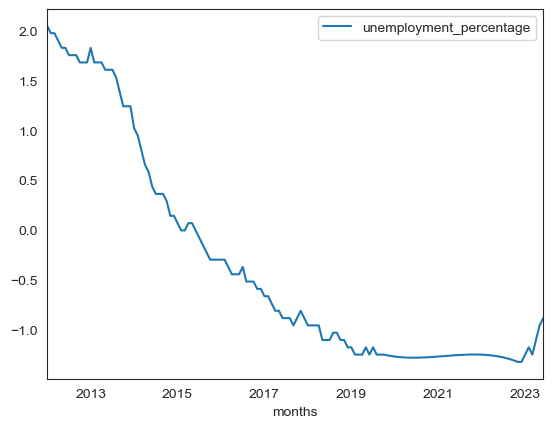

In [168]:
inter_unemploy_poly3_actual.plot()

In [169]:
inter_unemploy_poly3_trend.tail(10)

unemployment_percentage_trend
months                                   
2022-09-01                      -1.314218
2022-10-01                      -1.308108
2022-11-01                      -1.289779
2022-12-01                      -1.256177
2023-01-01                            NaN
2023-02-01                            NaN
2023-03-01                            NaN
2023-04-01                            NaN
2023-05-01                            NaN
2023-06-01                            NaN

In [170]:
window_size = 3  # Adjust window size as needed
dummy = inter_unemploy_poly3_actual['2022-11':].rolling(window=window_size).mean()

In [171]:
inter_unemploy_poly3_trend.loc[inter_unemploy_poly3_trend.index >= '2022-12-28', 'unemployment_percentage_trend'] = dummy['unemployment_percentage']['2023-1':]

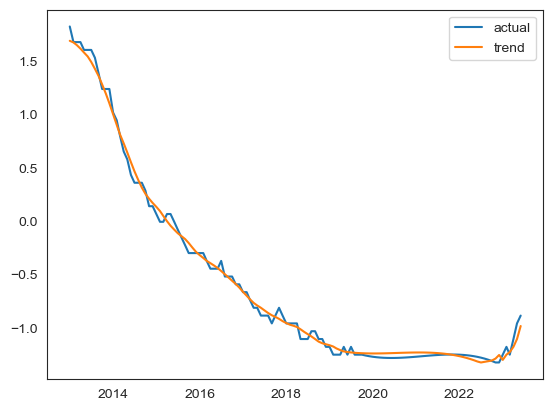

In [172]:
fig, ax = plt.subplots()
# Plot data from df1
ax.plot(inter_unemploy_poly3_actual['2013':], label='actual')
ax.plot(inter_unemploy_poly3_trend['2013':], label='trend')
 

# Add legend
ax.legend()
# Show the plot
plt.show()

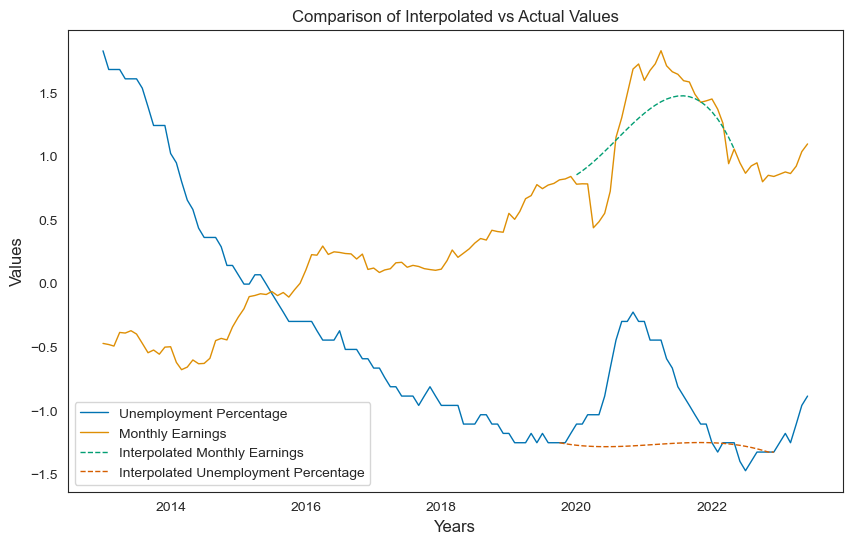

In [291]:
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(seasonal_merged['unemployment_percentage']['2013':], label='Unemployment Percentage', linewidth=1)
plt.plot(seasonal_merged['Real AWE']['2013':], label='Monthly Earnings', linewidth=1)

# Plot interpolated data with '--' line style for 2019 to 2023
#plt.plot(inter_real_poly3_actual['Real AWE']['2013':'2019'], label='Interpolated Monthly Earnings', linewidth=1)
plt.plot(inter_real_poly3_actual['Real AWE']['2020':'2022-05'], linestyle='--', linewidth=1, label='Interpolated Monthly Earnings')

#plt.plot(inter_unemploy_poly3_actual['unemployment_percentage']['2013':'2019'], label='Interpolated Unemployment Percentage',  linewidth=1)
plt.plot(inter_unemploy_poly3_actual['unemployment_percentage']['2019-10':'2022'], label='Interpolated Unemployment Percentage',linestyle='--', linewidth=1)

# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title("Comparison of Interpolated vs Actual Values")
# Add legend with smaller font size
plt.legend(fontsize=10)

# Remove grid

# Show the plot
plt.show()


# MODELLING

# Random Forest

CPIH

In [242]:
cpih_trend=pd.DataFrame(seasonal_merged[['L522_trend', 'L522']])
cpih_trend['num_index'] = np.arange(0,len(seasonal_merged))

In [243]:
# Prepare data for training (ensure numerical features)
features = cpih_trend.drop('L522_trend', axis=1)  # Features excluding target variable
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
target = cpih_trend['L522_trend']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, shuffle=False)

In [244]:
# Create Random Forest model

start_time = time.time()

model = RandomForestRegressor(n_estimators=100, random_state=42, max_features='log2')

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', random_state=42)

In [245]:
predictions = model.predict(X_test)
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

Training time: 0.53 seconds


In [246]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rsquare = r2_score(y_test,predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared: {rsquare:.4f}")



Mean Absolute Error (MAE): 0.50
Mean Squared Error (MSE): 0.4734
R-Squared: -1.0972


In [251]:
# Create a DataFrame for the predicted values covering June to December 2023
predicted_months = pd.date_range(start='2018-11-01', end='2023-6-01', freq='M',normalize=True).to_period('M').to_timestamp()
predicted_values = predictions.flatten()
predicted_df = pd.DataFrame({'months': pd.date_range(start='2018-11-01', periods=len(predicted_values), freq='M').to_period('M').to_timestamp(), 'Predicted Value': predicted_values})
predicted_df.set_index('months',inplace=True)

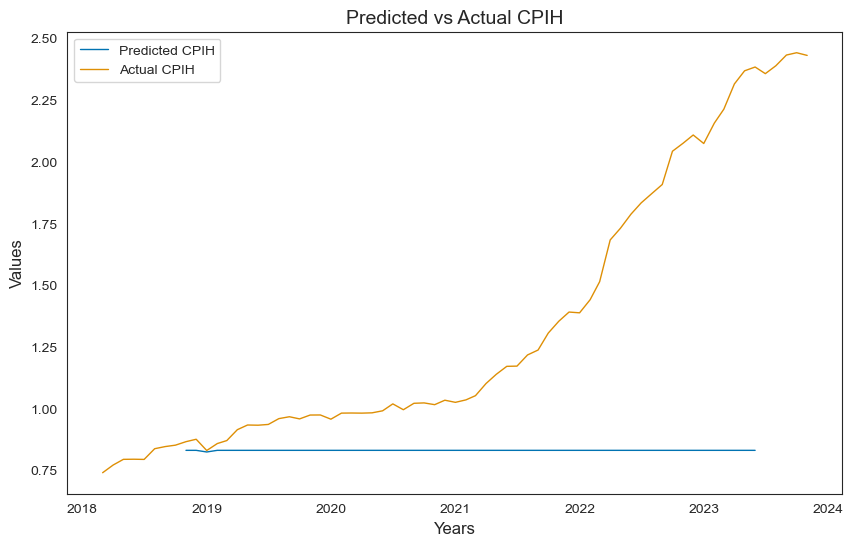

In [253]:
# Set the seaborn color palette to a color-blind friendly palette
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot data from df1 with reduced line thickness and smaller label size
plt.plot(predicted_df, label='Predicted CPIH', linewidth=1)
plt.plot(cpih_ref['2018-03':], label='Actual CPIH', linewidth=1)
# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add legend with smaller font size
plt.legend(fontsize=10)

# Remove grid
plt.title('Predicted vs Actual CPIH', fontsize=14)

# Show the plot
plt.show()


Unemployment

In [188]:
unemploy_merged = pd.merge(inter_unemploy_poly3_actual, inter_unemploy_poly3_trend, on='months')
unemploy_merged['num_index'] = np.arange(0,len(inter_unemploy_poly3_actual))

In [206]:
features = unemploy_merged.drop('unemployment_percentage', axis=1)  # Features excluding target variable
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
target = unemploy_merged['unemployment_percentage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, shuffle=False)

In [207]:
start_time = time.time()
# Create Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, max_features='log2')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

Training time: 0.07 seconds


In [208]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
predictions

Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.0042


array([-1.26844523, -1.27181288, -1.2754629 , -1.27742271, -1.27817741,
       -1.27698383, -1.27584754, -1.27584754, -1.27584754, -1.27584754,
       -1.27584754, -1.27584754, -1.27584754, -1.27584754, -1.27584754,
       -1.27584754, -1.27584754, -1.27584754, -1.27584754, -1.27584754,
       -1.27584754, -1.27584754, -1.27584754, -1.27584754, -1.24450618,
       -1.24366055, -1.15853738, -1.07619915])

In [209]:
# Create a DataFrame for the predicted values covering June to December 2023
predicted_months = pd.date_range(start='2021-3-01', end='2023-6-01', freq='M',normalize=True).to_period('M').to_timestamp()
predicted_values = predictions.flatten()
predicted_df = pd.DataFrame({'months': pd.date_range(start='2021-3-01', periods=len(predicted_values), freq='M'), 'Predicted Value': predicted_values})
predicted_df.set_index('months', inplace=True)

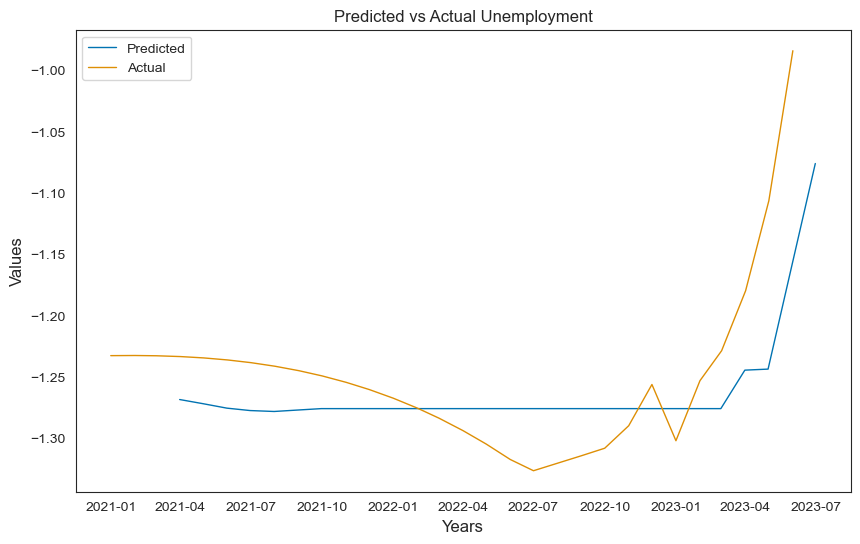

In [210]:
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot data from df1 with reduced line thickness and smaller label size
plt.plot(predicted_df, label='Predicted', linewidth=1)
plt.plot(inter_unemploy_poly3_trend['2021':], label='Actual', linewidth=1)
# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add legend with smaller font size
plt.legend(fontsize=10)
plt.title("Predicted vs Actual Unemployment")

plt.show()


Monthly Earnings

In [212]:
real_merged = pd.merge(inter_real_poly3_actual, inter_real_poly3_trend, on='months')
real_merged['num_index'] = np.arange(0,len(inter_real_poly3_actual))
real_merged

Real AWE  Real AWE_trend  num_index
months                                         
2000-01-01 -2.745353       -2.978094          0
2000-02-01 -2.754727       -2.921537          1
2000-03-01 -2.845165       -2.864979          2
2000-04-01 -2.825375       -2.808421          3
2000-05-01 -2.731332       -2.751864          4
...              ...             ...        ...
2023-02-01  0.874467        0.856712        277
2023-03-01  0.862120        0.864380        278
2023-04-01  0.920131        0.885573        279
2023-05-01  1.034224        0.938825        280
2023-06-01  1.094691        1.016349        281

[282 rows x 3 columns]

In [223]:
features = real_merged.drop('Real AWE', axis=1)  # Features excluding target variable
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
target = real_merged['Real AWE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, shuffle=False)

In [224]:
start_time = time.time()
# Create Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, max_features='log2')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

Training time: 0.07 seconds


In [225]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
predictions

Mean Absolute Error (MAE): 0.54
Mean Squared Error (MSE): 0.3733


array([0.35677252, 0.38979095, 0.41347114, 0.41230373, 0.40177818,
       0.42651847, 0.42603155, 0.43209785, 0.43494296, 0.46954957,
       0.44846209, 0.48006702, 0.49186884, 0.48421491, 0.47861565,
       0.47861565, 0.47861565, 0.47861565, 0.47861565, 0.47861565,
       0.47861565, 0.47861565, 0.47861565, 0.47861565, 0.47861565,
       0.47861565, 0.47861565, 0.47861565, 0.47861565, 0.47861565,
       0.47861565, 0.47861565, 0.47861565, 0.47861565, 0.47861565,
       0.47861565, 0.47861565, 0.47861565, 0.47861565, 0.47861565,
       0.47861565, 0.47861565, 0.47861565, 0.47861565, 0.47861565,
       0.47861565, 0.47861565, 0.47861565, 0.47861565, 0.47861565,
       0.47861565, 0.47861565, 0.47861565, 0.47861565, 0.47861565,
       0.47861565, 0.47861565])

In [235]:
# Create a DataFrame for the predicted values covering June to December 2023
predicted_months = pd.date_range(start='2018-10-01', end='2023-6-01', freq='M',normalize=True).to_period('M').to_timestamp()
predicted_values = predictions.flatten()
predicted_df = pd.DataFrame({'months': pd.date_range(start='2018-10-01', periods=len(predicted_values), freq='M'), 'Predicted Value': predicted_values})
predicted_df.set_index('months', inplace=True)

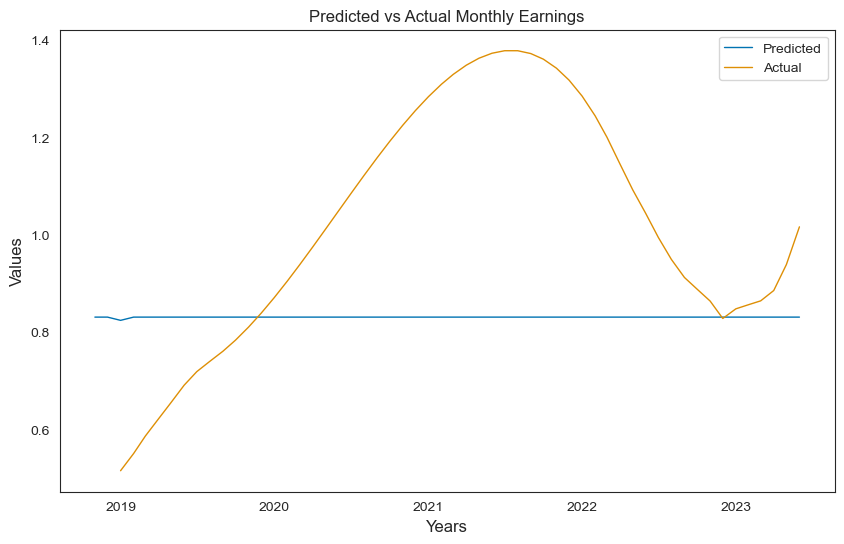

In [254]:
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot data from df1 with reduced line thickness and smaller label size
plt.plot(predicted_df, label='Predicted', linewidth=1)
plt.plot(inter_real_poly3_trend['2019':], label='Actual', linewidth=1)
# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add legend with smaller font size
plt.legend(fontsize=10)
plt.title("Predicted vs Actual Monthly Earnings")

plt.show()


CPIH_various_sectors

In [302]:
window_size = 3  # Adjust window size as needed
dummy = pd.DataFrame(cpih_14_from2000_normal['L523']['2022-11':].rolling(window=window_size).mean())
trend_modified = trend_features.copy()
trend_modified.loc[trend_modified.index >= '2022-12-28', 'L523'] = dummy['L523']['2023-1':]
window_size = 3  # Adjust window size as needed
dummy = pd.DataFrame(cpih_14_from2000_normal['L53A']['2022-2':].rolling(window=window_size).mean())
trend_modified.loc[trend_modified.index >= '2022-3-28', 'L53A'] = dummy['L53A']['2022-4':]
window_size = 3  # Adjust window size as needed
dummy = pd.DataFrame(cpih_14_from2000_normal['L53E']['2023-4':].rolling(window=window_size).mean())
trend_modified.loc[trend_modified.index >= '2023-5-28', 'L53E'] = dummy['L53E']['2023-6':]

In [303]:
all_predictions_df = pd.DataFrame()
mse_test = {}

for i in trend_features:
    
    def create_features(df):
    
        df = df.copy()
        df['quarter'] = df.index.quarter
        df['month'] = df.index.month
        df['year'] = df.index.year
        df['trend'] = trend_modified[i]
        #df['actual'] = cpih_14_from2000_normal[i]
        df['num_index'] = np.arange(0,len(trend_features))
        return df
    dum = pd.DataFrame(cpih_14_from2000_normal[i].copy())
    df = create_features(dum)
    
    #dum = pd.merge(trend_modified[i], cpih_14_from2000_normal[i], on='months')
    #dum['num_index'] = np.arange(0,len(trend_features))# Assuming 'cpih_data' is your DataFrame and 'date' is your date column

# Prepare data for training (ensure numerical features)
#features = cpih_trend.drop('L522', axis=1)  # Features excluding target variable
    features = df.drop(i, axis=1)  #combined
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
    target = df[i]

# Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42, shuffle=False)


    start_time = time.time()
    model = RandomForestRegressor( n_estimators=100,
                      random_state=42 )

# Train the model
    model.fit(X_train, y_train)

# Make predictions on the test set
    predictions = model.predict(X_test)
    end_time = time.time()

    print(f"Training time: {end_time - start_time:.2f} seconds")

    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions)
    mse_test[stripped_index_dict[i]] = mean_squared_error(y_test, predictions)


    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {stripped_index_dict[i]}: {rmse:.4f}")
    
    # Store predictions for test data
    predictions_df = pd.DataFrame({
        f'{i}_Actual': y_test.values,
        f'{i}_Predicted': predictions
    }, index=X_test.index.values)  # Convert index to DatetimeIndex
 
    # Concatenate predictions for the current column with all predictions
    all_predictions_df = pd.concat([all_predictions_df, predictions_df], axis=1)
 
    

Training time: 0.08 seconds
Mean Absolute Error (MAE): 0.59
Root Mean Squared Error (RMSE) for CPIH ALL ITEMS: 0.6427
Training time: 0.06 seconds
Mean Absolute Error (MAE): 0.49
Root Mean Squared Error (RMSE) for FOOD AND NON-ALCOHOLIC BEVERAGES: 0.6770
Training time: 0.05 seconds
Mean Absolute Error (MAE): 0.40
Root Mean Squared Error (RMSE) for ALCOHOLIC BEVERAGES AND TOBACCO: 0.2703
Training time: 0.06 seconds
Mean Absolute Error (MAE): 0.18
Root Mean Squared Error (RMSE) for CLOTHING AND FOOTWEAR: 0.0663
Training time: 0.06 seconds
Mean Absolute Error (MAE): 0.38
Root Mean Squared Error (RMSE) for ACTUAL RENTALS FOR HOUSING: 0.2595
Training time: 0.05 seconds
Mean Absolute Error (MAE): 0.21
Root Mean Squared Error (RMSE) for WATER SUPPLY AND MISC. SERVICES FOR THE DWELLING: 0.0973
Training time: 0.06 seconds
Mean Absolute Error (MAE): 0.93
Root Mean Squared Error (RMSE) for ELECTRICITY: 1.8654
Training time: 0.05 seconds
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE

# XGBoost

CPIH

In [237]:
cpih_trend=pd.DataFrame(seasonal_merged[['L522_trend', 'L522']])
cpih_trend['num_index'] = np.arange(0,len(seasonal_merged))

In [238]:
features = cpih_trend.drop('L522_trend', axis=1)  # Features excluding target variable
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
target = cpih_trend['L522_trend']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, shuffle=False)

start_time = time.time()
model = XGBRegressor(n_estimators=100, learning_rate=0.1,
                      random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"predictions: {predictions}")

Training time: 0.08 seconds
Mean Absolute Error (MAE): 0.49
Root Mean Squared Error (RMSE): 0.4688
predictions: [0.8357585 0.8357585 0.8055259 0.8357585 0.8357585 0.8357585 0.8357585
 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585
 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585
 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585
 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585
 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585
 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585
 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585 0.8357585]


In [255]:
# Create a DataFrame for the predicted values covering June to December 2023
predicted_months = pd.date_range(start='2018-11-01', end='2023-6-01', freq='M',normalize=True).to_period('M').to_timestamp()
predicted_values = predictions.flatten()
predicted_df = pd.DataFrame({'months': pd.date_range(start='2018-11-01', periods=len(predicted_values), freq='M').to_period('M').to_timestamp(), 'Predicted Value': predicted_values})
predicted_df.set_index('months',inplace=True)

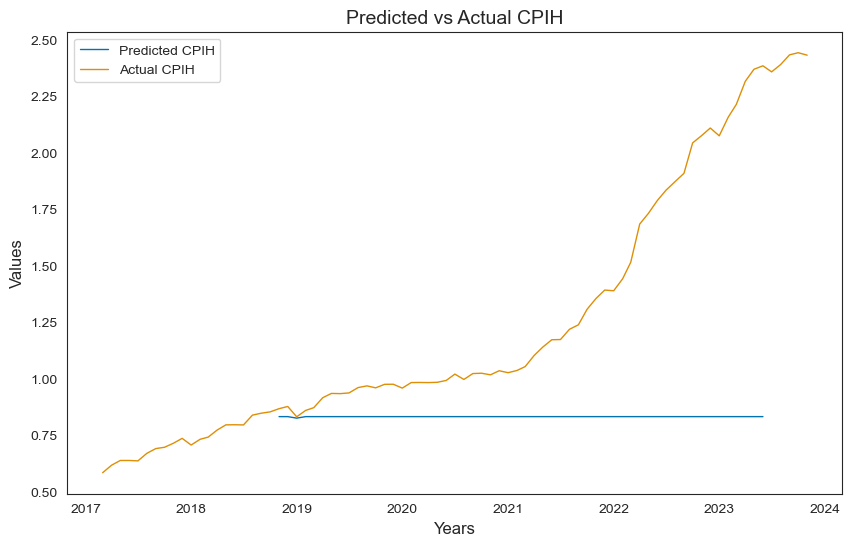

In [256]:
# Set the seaborn color palette to a color-blind friendly palette
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot data from df1 with reduced line thickness and smaller label size
plt.plot(predicted_df, label='Predicted CPIH', linewidth=1)
plt.plot(cpih_ref['2017-03':], label='Actual CPIH', linewidth=1)
# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add legend with smaller font size
plt.legend(fontsize=10)

# Remove grid
plt.title('Predicted vs Actual CPIH', fontsize=14)

# Show the plot
plt.show()


Unemployment

In [190]:
features = unemploy_merged.drop('unemployment_percentage', axis=1)  # Features excluding target variable
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
target = unemploy_merged['unemployment_percentage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, shuffle=False)

In [191]:
start_time = time.time()
model = XGBRegressor(n_estimators=100, learning_rate=0.1,
                      random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

Training time: 0.13 seconds


In [192]:
# Create a DataFrame for the predicted values covering June to December 2023
predicted_months = pd.date_range(start='2021-03-01', end='2023-6-01', freq='M',normalize=True).to_period('M').to_timestamp()
predicted_values = predictions.flatten()
predicted_df = pd.DataFrame({'months': pd.date_range(start='2021-03-01', periods=len(predicted_values), freq='M'), 'Predicted Value': predicted_values})
 

In [193]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
predictions

Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.0024


array([-1.2749617 , -1.2780385 , -1.2798092 , -1.2826033 , -1.2826033 ,
       -1.2826033 , -1.2826033 , -1.2826033 , -1.2826033 , -1.2826033 ,
       -1.2826033 , -1.2826033 , -1.2826033 , -1.2826033 , -1.2826033 ,
       -1.2826033 , -1.2826033 , -1.2826033 , -1.2826033 , -1.2826033 ,
       -1.2826033 , -1.2826033 , -1.2826033 , -1.2826033 , -1.2619373 ,
       -1.2637902 , -1.0612568 , -0.97240335], dtype=float32)

In [194]:
predicted_df.set_index('months', inplace=True)

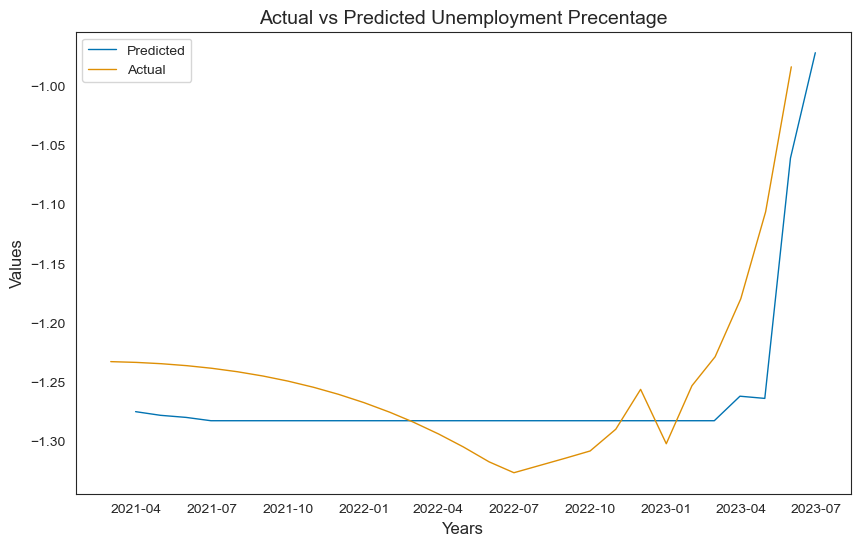

In [198]:
# Set the seaborn color palette to a color-blind friendly palette
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot data from df1 with reduced line thickness and smaller label size
plt.plot(predicted_df['2021':], label='Predicted', linewidth=1)
plt.plot(inter_unemploy_poly3_trend['2021-03':], label='Actual', linewidth=1)
# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add legend with smaller font size
plt.legend(fontsize=10)
plt.title('Actual vs Predicted Unemployment Precentage', fontsize=14)

plt.show()


Monthly Earnings

In [200]:
features = real_merged.drop('Real AWE', axis=1)  # Features excluding target variable
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
target = real_merged['Real AWE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, shuffle=False)

In [201]:
start_time = time.time()
model = XGBRegressor(n_estimators=100, learning_rate=0.1,
                      random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

Training time: 0.10 seconds


In [203]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
predictions

Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.2130


array([0.3446895 , 0.4704005 , 0.5260992 , 0.5248505 , 0.52083147,
       0.6005727 , 0.598346  , 0.62867045, 0.6019107 , 0.7947558 ,
       0.70417094, 0.65223336, 0.65714717, 0.6548649 , 0.65429795,
       0.65429795, 0.65429795, 0.65429795, 0.65429795, 0.65429795,
       0.65429795, 0.65429795, 0.65429795, 0.65429795, 0.65429795,
       0.65429795, 0.65429795, 0.65429795, 0.65429795, 0.65429795,
       0.65429795, 0.65429795, 0.65429795, 0.65429795, 0.65429795,
       0.65429795, 0.65429795, 0.65429795, 0.65429795, 0.65429795,
       0.65429795, 0.65429795, 0.65429795, 0.65429795, 0.65429795,
       0.65429795, 0.65429795, 0.65429795, 0.65429795, 0.65429795,
       0.65429795, 0.65429795, 0.65429795, 0.65429795, 0.65429795,
       0.65429795, 0.65429795], dtype=float32)

In [204]:
# Create a DataFrame for the predicted values covering June to December 2023
predicted_months = pd.date_range(start='2018-10-01', end='2023-6-01', freq='M',normalize=True).to_period('M').to_timestamp()
predicted_values = predictions.flatten()
predicted_df = pd.DataFrame({'months': pd.date_range(start='2018-10-01', periods=len(predicted_values), freq='M'), 'Predicted Value': predicted_values})
predicted_df.set_index('months', inplace=True)

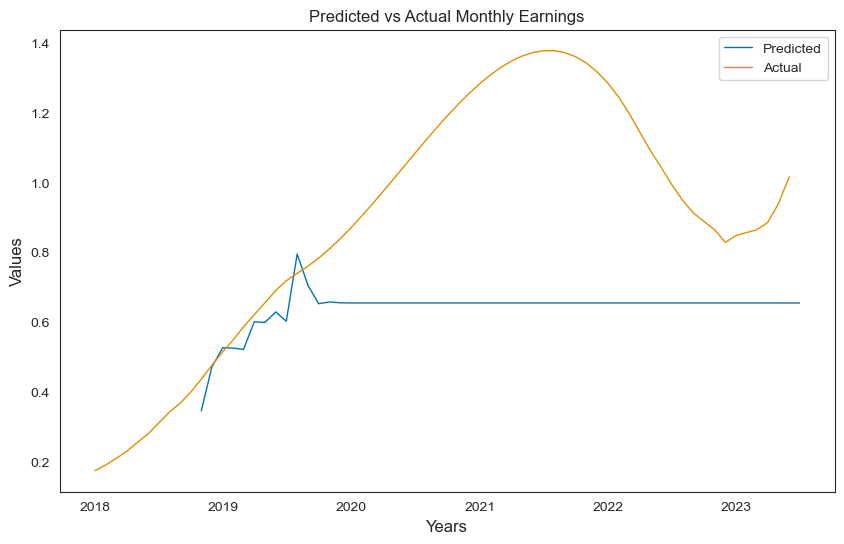

In [205]:
# Set the seaborn color palette to a color-blind friendly palette
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot data from df1 with reduced line thickness and smaller label size
plt.plot(predicted_df, label='Predicted', linewidth=1)
plt.plot(inter_real_poly3_trend['2018':], label='Actual', linewidth=1)
# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add legend with smaller font size
plt.legend(fontsize=10)
plt.title("Predicted vs Actual Monthly Earnings")
plt.show()


CPIH_with Multiple features

In [293]:
cpih_trend_combined = pd.concat([cpih_trend, inter_real_poly3_trend, inter_unemploy_poly3_trend], axis=1)
cpih_trend_combined = cpih_trend_combined["2012":]

In [296]:
cpih_trend=pd.DataFrame(seasonal_merged[['L522_trend', 'L522']])
cpih_trend['num_index'] = np.arange(0,len(seasonal_merged))
#from sklearn.ensemble import RandomForestRegressor

# Assuming 'cpih_data' is your DataFrame and 'date' is your date column

# Prepare data for training (ensure numerical features)
#features = cpih_trend.drop('L522', axis=1)  # Features excluding target variable
features = cpih_trend_combined.drop('L522_trend', axis=1)  #combined
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
target = cpih_trend_combined['L522_trend']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, shuffle=False)
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

start_time = time.time()
model = XGBRegressor( n_estimators=100,learning_rate=0.1,
                      random_state=42,early_stopping_rounds = 5 )

# Train the model
model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose =True)

# Make predictions on the test set
predictions = model.predict(X_test)
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
predictions

[0]	validation_0-rmse:0.26553	validation_1-rmse:1.17064
[1]	validation_0-rmse:0.24099	validation_1-rmse:1.13798
[2]	validation_0-rmse:0.21879	validation_1-rmse:1.10716
[3]	validation_0-rmse:0.19866	validation_1-rmse:1.07892
[4]	validation_0-rmse:0.18038	validation_1-rmse:1.05368
[5]	validation_0-rmse:0.16381	validation_1-rmse:1.03188
[6]	validation_0-rmse:0.14885	validation_1-rmse:1.01067
[7]	validation_0-rmse:0.13528	validation_1-rmse:0.99275
[8]	validation_0-rmse:0.12299	validation_1-rmse:0.97642
[9]	validation_0-rmse:0.11184	validation_1-rmse:0.96013
[10]	validation_0-rmse:0.10171	validation_1-rmse:0.94572
[11]	validation_0-rmse:0.09253	validation_1-rmse:0.93223
[12]	validation_0-rmse:0.08428	validation_1-rmse:0.92123
[13]	validation_0-rmse:0.07678	validation_1-rmse:0.90957
[14]	validation_0-rmse:0.06999	validation_1-rmse:0.90011
[15]	validation_0-rmse:0.06381	validation_1-rmse:0.89156
[16]	validation_0-rmse:0.05818	validation_1-rmse:0.88304
[17]	validation_0-rmse:0.05310	validation

array([1.0727875, 1.0727875, 1.0727875, 1.0727875, 1.0727875, 1.0727875,
       1.0727875, 1.0727875, 1.0727875, 1.0727875, 1.0727875, 1.0727875,
       1.0727875, 1.0727875, 1.0727875, 1.0727875, 1.0727875, 1.0727875,
       1.0727875, 1.0727875, 1.0727875, 1.0727875, 1.0727875, 1.0727875,
       1.0727875, 1.0727875, 1.0727875, 1.0727875], dtype=float32)

CPIH_different factors

In [297]:
for i in trend_features:
    
    dum = pd.merge(trend_features[i], cpih_14_from2000_normal[i], on='months')
    dum['num_index'] = np.arange(0,len(trend_features))# Assuming 'cpih_data' is your DataFrame and 'date' is your date column

# Prepare data for training (ensure numerical features)
#features = cpih_trend.drop('L522', axis=1)  # Features excluding target variable
    features = dum.drop(i+'_y', axis=1)  #combined
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
    target = dum[i+'_y']

# Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42, shuffle=False)
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split

    start_time = time.time()
    model = XGBRegressor( n_estimators=50,learning_rate=0.5,
                      random_state=42,early_stopping_rounds = 10 )

# Train the model
    model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose =True)

# Make predictions on the test set
    predictions = model.predict(X_test)
    end_time = time.time()

    print(f"Training time: {end_time - start_time:.2f} seconds")

    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {stripped_index_dict[i]}: {rmse:.4f}")
    

[0]	validation_0-rmse:0.37602	validation_1-rmse:1.39264
[1]	validation_0-rmse:0.19827	validation_1-rmse:1.12752
[2]	validation_0-rmse:0.10648	validation_1-rmse:0.98180
[3]	validation_0-rmse:0.06017	validation_1-rmse:0.90270
[4]	validation_0-rmse:0.03564	validation_1-rmse:0.86604
[5]	validation_0-rmse:0.02319	validation_1-rmse:0.83601
[6]	validation_0-rmse:0.01690	validation_1-rmse:0.81918
[7]	validation_0-rmse:0.01378	validation_1-rmse:0.81757
[8]	validation_0-rmse:0.01152	validation_1-rmse:0.81637
[9]	validation_0-rmse:0.01032	validation_1-rmse:0.81547
[10]	validation_0-rmse:0.00948	validation_1-rmse:0.81479
[11]	validation_0-rmse:0.00860	validation_1-rmse:0.81258
[12]	validation_0-rmse:0.00816	validation_1-rmse:0.81263
[13]	validation_0-rmse:0.00791	validation_1-rmse:0.81202
[14]	validation_0-rmse:0.00778	validation_1-rmse:0.81169
[15]	validation_0-rmse:0.00741	validation_1-rmse:0.81171
[16]	validation_0-rmse:0.00721	validation_1-rmse:0.81171
[17]	validation_0-rmse:0.00664	validation

[8]	validation_0-rmse:0.05223	validation_1-rmse:0.13337
[9]	validation_0-rmse:0.04997	validation_1-rmse:0.13346
[10]	validation_0-rmse:0.04474	validation_1-rmse:0.13381
[11]	validation_0-rmse:0.04167	validation_1-rmse:0.14232
[12]	validation_0-rmse:0.03919	validation_1-rmse:0.14243
[13]	validation_0-rmse:0.03732	validation_1-rmse:0.14386
[14]	validation_0-rmse:0.03604	validation_1-rmse:0.15080
[15]	validation_0-rmse:0.03518	validation_1-rmse:0.15659
Training time: 0.03 seconds
Mean Absolute Error (MAE): 0.10
Root Mean Squared Error (RMSE) for CLOTHING AND FOOTWEAR: 0.0170
[0]	validation_0-rmse:0.43222	validation_1-rmse:1.11537
[1]	validation_0-rmse:0.22661	validation_1-rmse:0.83588
[2]	validation_0-rmse:0.12062	validation_1-rmse:0.69037
[3]	validation_0-rmse:0.06619	validation_1-rmse:0.61639
[4]	validation_0-rmse:0.03905	validation_1-rmse:0.57420
[5]	validation_0-rmse:0.02411	validation_1-rmse:0.54849
[6]	validation_0-rmse:0.01605	validation_1-rmse:0.53373
[7]	validation_0-rmse:0.01123

[16]	validation_0-rmse:0.00022	validation_1-rmse:0.75212
[17]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
[18]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
[19]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
[20]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
[21]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
[22]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
[23]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
[24]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
[25]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
[26]	validation_0-rmse:0.00020	validation_1-rmse:0.75212
Training time: 0.03 seconds
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE) for COUNCIL TAX AND OTHER RATES: 0.5657
[0]	validation_0-rmse:0.40192	validation_1-rmse:1.26607
[1]	validation_0-rmse:0.21278	validation_1-rmse:0.96452
[2]	validation_0-rmse:0.11438	validation_1-rmse:0.79350
[3]	validation_0-rmse:0.06435	validation_1-rmse:0.69808
[4]	validation_0-r

[21]	validation_0-rmse:0.00500	validation_1-rmse:0.76708
[22]	validation_0-rmse:0.00470	validation_1-rmse:0.76706
[23]	validation_0-rmse:0.00449	validation_1-rmse:0.76707
[24]	validation_0-rmse:0.00433	validation_1-rmse:0.76708
[25]	validation_0-rmse:0.00416	validation_1-rmse:0.76708
[26]	validation_0-rmse:0.00403	validation_1-rmse:0.76722
[27]	validation_0-rmse:0.00390	validation_1-rmse:0.76722
[28]	validation_0-rmse:0.00380	validation_1-rmse:0.76723
Training time: 0.03 seconds
Mean Absolute Error (MAE): 0.57
Root Mean Squared Error (RMSE) for RESTAURANTS AND HOTELS: 0.5883
[0]	validation_0-rmse:0.38821	validation_1-rmse:1.30195
[1]	validation_0-rmse:0.20516	validation_1-rmse:0.98840
[2]	validation_0-rmse:0.11012	validation_1-rmse:0.81207
[3]	validation_0-rmse:0.06157	validation_1-rmse:0.72740
[4]	validation_0-rmse:0.03562	validation_1-rmse:0.67053
[5]	validation_0-rmse:0.02189	validation_1-rmse:0.64002
[6]	validation_0-rmse:0.01494	validation_1-rmse:0.62355
[7]	validation_0-rmse:0.01

In [299]:
all_predictions_df = pd.DataFrame()
mse_test = {}

for i in trend_features:
    
    def create_features(df):
    
        df = df.copy()
        df['quarter'] = df.index.quarter
        df['month'] = df.index.month
        df['year'] = df.index.year
        df['trend'] = trend_modified[i]
        df['num_index'] = np.arange(0,len(trend_features))
        return df
    dum = pd.DataFrame(cpih_14_from2000_normal[i].copy())
    df = create_features(dum)
    
    #dum = pd.merge(trend_modified[i], cpih_14_from2000_normal[i], on='months')
    #dum['num_index'] = np.arange(0,len(trend_features))# Assuming 'cpih_data' is your DataFrame and 'date' is your date column

# Prepare data for training (ensure numerical features)
#features = cpih_trend.drop('L522', axis=1)  # Features excluding target variable
    features = df.drop(i, axis=1)  #combined
#features = cpih_trend['L522_trend'].values.reshape(-1,1)
#features = cpih_trend['num_index'].values.reshape(-1,1)
    target = df[i]

# Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42, shuffle=False)
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split

    start_time = time.time()
    model = XGBRegressor( n_estimators=100,learning_rate=0.1,
                      random_state=42,early_stopping_rounds = 10 )

# Train the model
    model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose =True)

# Make predictions on the test set
    predictions = model.predict(X_test)
    end_time = time.time()

    print(f"Training time: {end_time - start_time:.2f} seconds")

    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions)
    mse_test[stripped_index_dict[i]] = mean_squared_error(y_test, predictions)


    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {stripped_index_dict[i]}: {rmse:.4f}")
    
    # Store predictions for test data
    predictions_df = pd.DataFrame({
        f'{i}_Actual': y_test.values,
        f'{i}_Predicted': predictions
    }, index=X_test.index.values)  # Convert index to DatetimeIndex
 
    # Concatenate predictions for the current column with all predictions
    all_predictions_df = pd.concat([all_predictions_df, predictions_df], axis=1)
 
    

[0]	validation_0-rmse:0.65108	validation_1-rmse:1.78219
[1]	validation_0-rmse:0.58867	validation_1-rmse:1.69147
[2]	validation_0-rmse:0.53231	validation_1-rmse:1.61251
[3]	validation_0-rmse:0.48141	validation_1-rmse:1.53793
[4]	validation_0-rmse:0.43544	validation_1-rmse:1.47091
[5]	validation_0-rmse:0.39390	validation_1-rmse:1.41396
[6]	validation_0-rmse:0.35632	validation_1-rmse:1.35782
[7]	validation_0-rmse:0.32239	validation_1-rmse:1.30847
[8]	validation_0-rmse:0.29178	validation_1-rmse:1.26742
[9]	validation_0-rmse:0.26402	validation_1-rmse:1.22574
[10]	validation_0-rmse:0.23898	validation_1-rmse:1.18795
[11]	validation_0-rmse:0.21634	validation_1-rmse:1.15360
[12]	validation_0-rmse:0.19588	validation_1-rmse:1.12469
[13]	validation_0-rmse:0.17739	validation_1-rmse:1.09528
[14]	validation_0-rmse:0.16067	validation_1-rmse:1.07078
[15]	validation_0-rmse:0.14554	validation_1-rmse:1.04629
[16]	validation_0-rmse:0.13187	validation_1-rmse:1.02486
[17]	validation_0-rmse:0.11949	validation

[43]	validation_0-rmse:0.01508	validation_1-rmse:0.83451
[44]	validation_0-rmse:0.01420	validation_1-rmse:0.83291
[45]	validation_0-rmse:0.01345	validation_1-rmse:0.83152
[46]	validation_0-rmse:0.01277	validation_1-rmse:0.83017
[47]	validation_0-rmse:0.01214	validation_1-rmse:0.82941
[48]	validation_0-rmse:0.01158	validation_1-rmse:0.82826
[49]	validation_0-rmse:0.01105	validation_1-rmse:0.82763
[50]	validation_0-rmse:0.01060	validation_1-rmse:0.82676
[51]	validation_0-rmse:0.01018	validation_1-rmse:0.82632
[52]	validation_0-rmse:0.00981	validation_1-rmse:0.82586
[53]	validation_0-rmse:0.00948	validation_1-rmse:0.82542
[54]	validation_0-rmse:0.00913	validation_1-rmse:0.82502
[55]	validation_0-rmse:0.00885	validation_1-rmse:0.82464
[56]	validation_0-rmse:0.00858	validation_1-rmse:0.82429
[57]	validation_0-rmse:0.00832	validation_1-rmse:0.82396
[58]	validation_0-rmse:0.00809	validation_1-rmse:0.82367
[59]	validation_0-rmse:0.00793	validation_1-rmse:0.82339
[60]	validation_0-rmse:0.00772	

[84]	validation_0-rmse:0.00345	validation_1-rmse:0.49355
[85]	validation_0-rmse:0.00341	validation_1-rmse:0.49310
[86]	validation_0-rmse:0.00338	validation_1-rmse:0.49267
[87]	validation_0-rmse:0.00336	validation_1-rmse:0.49231
[88]	validation_0-rmse:0.00332	validation_1-rmse:0.49193
[89]	validation_0-rmse:0.00328	validation_1-rmse:0.49161
[90]	validation_0-rmse:0.00326	validation_1-rmse:0.49126
[91]	validation_0-rmse:0.00322	validation_1-rmse:0.49093
[92]	validation_0-rmse:0.00321	validation_1-rmse:0.49061
[93]	validation_0-rmse:0.00318	validation_1-rmse:0.49035
[94]	validation_0-rmse:0.00317	validation_1-rmse:0.49006
[95]	validation_0-rmse:0.00315	validation_1-rmse:0.48982
[96]	validation_0-rmse:0.00312	validation_1-rmse:0.48957
[97]	validation_0-rmse:0.00311	validation_1-rmse:0.48932
[98]	validation_0-rmse:0.00310	validation_1-rmse:0.48911
[99]	validation_0-rmse:0.00308	validation_1-rmse:0.48889
Training time: 0.13 seconds
Mean Absolute Error (MAE): 0.36
Root Mean Squared Error (RMS

[91]	validation_0-rmse:0.00131	validation_1-rmse:0.50802
[92]	validation_0-rmse:0.00130	validation_1-rmse:0.50798
[93]	validation_0-rmse:0.00129	validation_1-rmse:0.50790
[94]	validation_0-rmse:0.00128	validation_1-rmse:0.50783
[95]	validation_0-rmse:0.00126	validation_1-rmse:0.50777
[96]	validation_0-rmse:0.00124	validation_1-rmse:0.50776
[97]	validation_0-rmse:0.00124	validation_1-rmse:0.50770
[98]	validation_0-rmse:0.00123	validation_1-rmse:0.50764
[99]	validation_0-rmse:0.00123	validation_1-rmse:0.50761
Training time: 0.11 seconds
Mean Absolute Error (MAE): 0.38
Root Mean Squared Error (RMSE) for ACTUAL RENTALS FOR HOUSING: 0.2577
[0]	validation_0-rmse:0.81090	validation_1-rmse:1.37560
[1]	validation_0-rmse:0.73267	validation_1-rmse:1.28251
[2]	validation_0-rmse:0.66211	validation_1-rmse:1.20122
[3]	validation_0-rmse:0.59844	validation_1-rmse:1.12567
[4]	validation_0-rmse:0.54097	validation_1-rmse:1.04887
[5]	validation_0-rmse:0.48911	validation_1-rmse:0.98300
[6]	validation_0-rmse

[31]	validation_0-rmse:0.02354	validation_1-rmse:1.39275
[32]	validation_0-rmse:0.02149	validation_1-rmse:1.38862
[33]	validation_0-rmse:0.01963	validation_1-rmse:1.38480
[34]	validation_0-rmse:0.01793	validation_1-rmse:1.38128
[35]	validation_0-rmse:0.01640	validation_1-rmse:1.37897
[36]	validation_0-rmse:0.01500	validation_1-rmse:1.37684
[37]	validation_0-rmse:0.01373	validation_1-rmse:1.37489
[38]	validation_0-rmse:0.01258	validation_1-rmse:1.37309
[39]	validation_0-rmse:0.01154	validation_1-rmse:1.37144
[40]	validation_0-rmse:0.01058	validation_1-rmse:1.36990
[41]	validation_0-rmse:0.00973	validation_1-rmse:1.36850
[42]	validation_0-rmse:0.00896	validation_1-rmse:1.36721
[43]	validation_0-rmse:0.00823	validation_1-rmse:1.36602
[44]	validation_0-rmse:0.00760	validation_1-rmse:1.36492
[45]	validation_0-rmse:0.00700	validation_1-rmse:1.36390
[46]	validation_0-rmse:0.00646	validation_1-rmse:1.36298
[47]	validation_0-rmse:0.00597	validation_1-rmse:1.36212
[48]	validation_0-rmse:0.00553	

[72]	validation_0-rmse:0.00088	validation_1-rmse:0.75302
[73]	validation_0-rmse:0.00081	validation_1-rmse:0.75294
[74]	validation_0-rmse:0.00075	validation_1-rmse:0.75287
[75]	validation_0-rmse:0.00069	validation_1-rmse:0.75278
[76]	validation_0-rmse:0.00063	validation_1-rmse:0.75270
[77]	validation_0-rmse:0.00058	validation_1-rmse:0.75263
[78]	validation_0-rmse:0.00053	validation_1-rmse:0.75256
[79]	validation_0-rmse:0.00049	validation_1-rmse:0.75251
[80]	validation_0-rmse:0.00045	validation_1-rmse:0.75248
[81]	validation_0-rmse:0.00042	validation_1-rmse:0.75243
[82]	validation_0-rmse:0.00039	validation_1-rmse:0.75239
[83]	validation_0-rmse:0.00036	validation_1-rmse:0.75237
[84]	validation_0-rmse:0.00033	validation_1-rmse:0.75235
[85]	validation_0-rmse:0.00030	validation_1-rmse:0.75231
[86]	validation_0-rmse:0.00028	validation_1-rmse:0.75229
[87]	validation_0-rmse:0.00026	validation_1-rmse:0.75228
[88]	validation_0-rmse:0.00024	validation_1-rmse:0.75225
[89]	validation_0-rmse:0.00023	

[12]	validation_0-rmse:0.20248	validation_1-rmse:1.09833
[13]	validation_0-rmse:0.18391	validation_1-rmse:1.06927
[14]	validation_0-rmse:0.16719	validation_1-rmse:1.04304
[15]	validation_0-rmse:0.15202	validation_1-rmse:1.02313
[16]	validation_0-rmse:0.13838	validation_1-rmse:1.00096
[17]	validation_0-rmse:0.12614	validation_1-rmse:0.98129
[18]	validation_0-rmse:0.11509	validation_1-rmse:0.96489
[19]	validation_0-rmse:0.10512	validation_1-rmse:0.94831
[20]	validation_0-rmse:0.09602	validation_1-rmse:0.93331
[21]	validation_0-rmse:0.08790	validation_1-rmse:0.91974
[22]	validation_0-rmse:0.08056	validation_1-rmse:0.90746
[23]	validation_0-rmse:0.07392	validation_1-rmse:0.89634
[24]	validation_0-rmse:0.06791	validation_1-rmse:0.88628
[25]	validation_0-rmse:0.06244	validation_1-rmse:0.87831
[26]	validation_0-rmse:0.05749	validation_1-rmse:0.87054
[27]	validation_0-rmse:0.05296	validation_1-rmse:0.86346
[28]	validation_0-rmse:0.04893	validation_1-rmse:0.85629
[29]	validation_0-rmse:0.04530	

[54]	validation_0-rmse:0.00391	validation_1-rmse:0.30477
[55]	validation_0-rmse:0.00356	validation_1-rmse:0.30363
[56]	validation_0-rmse:0.00325	validation_1-rmse:0.30258
[57]	validation_0-rmse:0.00296	validation_1-rmse:0.30162
[58]	validation_0-rmse:0.00270	validation_1-rmse:0.30079
[59]	validation_0-rmse:0.00246	validation_1-rmse:0.29998
[60]	validation_0-rmse:0.00225	validation_1-rmse:0.29923
[61]	validation_0-rmse:0.00205	validation_1-rmse:0.29854
[62]	validation_0-rmse:0.00187	validation_1-rmse:0.29790
[63]	validation_0-rmse:0.00171	validation_1-rmse:0.29732
[64]	validation_0-rmse:0.00156	validation_1-rmse:0.29682
[65]	validation_0-rmse:0.00142	validation_1-rmse:0.29633
[66]	validation_0-rmse:0.00130	validation_1-rmse:0.29587
[67]	validation_0-rmse:0.00119	validation_1-rmse:0.29545
[68]	validation_0-rmse:0.00108	validation_1-rmse:0.29507
[69]	validation_0-rmse:0.00099	validation_1-rmse:0.29472
[70]	validation_0-rmse:0.00091	validation_1-rmse:0.29441
[71]	validation_0-rmse:0.00083	

[96]	validation_0-rmse:0.00183	validation_1-rmse:0.76349
[97]	validation_0-rmse:0.00182	validation_1-rmse:0.76346
[98]	validation_0-rmse:0.00180	validation_1-rmse:0.76342
[99]	validation_0-rmse:0.00179	validation_1-rmse:0.76339
Training time: 0.12 seconds
Mean Absolute Error (MAE): 0.57
Root Mean Squared Error (RMSE) for RESTAURANTS AND HOTELS: 0.5828
[0]	validation_0-rmse:0.67062	validation_1-rmse:1.74234
[1]	validation_0-rmse:0.60653	validation_1-rmse:1.64251
[2]	validation_0-rmse:0.54872	validation_1-rmse:1.55113
[3]	validation_0-rmse:0.49653	validation_1-rmse:1.46488
[4]	validation_0-rmse:0.44935	validation_1-rmse:1.38566
[5]	validation_0-rmse:0.40660	validation_1-rmse:1.31845
[6]	validation_0-rmse:0.36801	validation_1-rmse:1.25794
[7]	validation_0-rmse:0.33316	validation_1-rmse:1.19906
[8]	validation_0-rmse:0.30166	validation_1-rmse:1.14599
[9]	validation_0-rmse:0.27318	validation_1-rmse:1.09816
[10]	validation_0-rmse:0.24744	validation_1-rmse:1.05413
[11]	validation_0-rmse:0.2241

In [300]:
mse_test

{'CPIH ALL ITEMS': 0.6415575662578008,
 'FOOD AND NON-ALCOHOLIC BEVERAGES': 0.6740256184089162,
 'ALCOHOLIC BEVERAGES AND TOBACCO': 0.23901718381481862,
 'CLOTHING AND FOOTWEAR': 0.06981657815453615,
 'ACTUAL RENTALS FOR HOUSING': 0.25767177526302787,
 'WATER SUPPLY AND MISC. SERVICES FOR THE DWELLING': 0.0974189439449877,
 'ELECTRICITY': 1.8287957317342494,
 'COUNCIL TAX AND OTHER RATES': 0.5657553164333882,
 'HEALTH': 0.3137183746454343,
 'TRANSPORT': 0.6429984156028964,
 'EDUCATION': 0.08474905155983205,
 'RESTAURANTS AND HOTELS': 0.5827705857070581,
 'HEALTH INSURANCE': 0.3096025795762744}

# LSTM

CPIH

In [259]:
cpih_data = cpih_ref.loc['2000-01-01':'2023-06-01']
cpih_data

L522
months              
2000-01-01 -1.453679
2000-02-01 -1.441100
2000-03-01 -1.431022
2000-04-01 -1.408433
2000-05-01 -1.395244
...              ...
2023-02-01  2.155912
2023-03-01  2.212521
2023-04-01  2.314647
2023-05-01  2.367943
2023-06-01  2.383295

[282 rows x 1 columns]

In [260]:
 
def create_dataset(cpih_data, time_steps=1):
    X, Y = [], []
    for i in range(len(cpih_data) - time_steps):
        X.append(cpih_data.iloc[i:(i + time_steps), 0].values.reshape(-1, 1))
        Y.append(cpih_data.iloc[i + time_steps, 0])
    return np.array(X), np.array(Y)
 
# Assuming cpih_data is your original DataFrame
 
# Choose the number of time steps
time_steps = 6
 
# Create input-output sequences for training
X_train, Y_train = create_dataset(cpih_data.loc['2000-01-01':'2023-06-01'], time_steps)
 
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(units=50),
    Dense(units=1)
])
 
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
 
# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32)
 
# Create input sequences for prediction
X_pred = []
start_date = pd.Timestamp('2023-06-01')  # Update start date to June 1, 2023
end_date = pd.Timestamp('2023-12-01')  # Update end date to December 1, 2023
for i in range(len(cpih_data) - time_steps + 1, len(cpih_data) + 1):
    X_pred.append(cpih_data.iloc[i - time_steps:i, 0].values.reshape(-1, 1))
X_pred = np.array(X_pred).reshape(-1, time_steps, 1)
 
# Make predictions for the desired months (June to December 2023)
predictions = model.predict(X_pred)
 
# Create a DataFrame for the predicted values covering June to December 2023
predicted_months = pd.date_range(start='2023-06-01', end='2023-12-01', freq='M',normalize=True).to_period('M').to_timestamp()
predicted_values = predictions.flatten()
predicted_df = pd.DataFrame({'months': predicted_months, 'Predicted Value': predicted_values})
 
print(predicted_df)


Epoch 1/100


2024-04-25 12:41:54.047814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 12:41:54.049452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 12:41:54.049835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 1s 4ms/step - loss: 0.6436
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2044
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 13/100
9/9 [==============================] - 0s 3ms/step - loss: 0

2024-04-25 12:41:58.120178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 12:41:58.120719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 12:41:58.121274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [261]:
predicted_df.set_index('months', inplace=True)

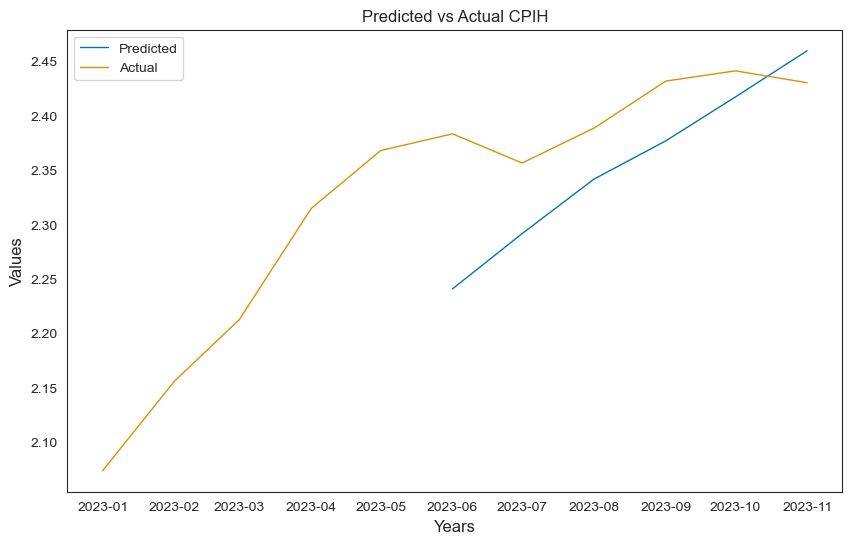

In [263]:
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot data from df1 with reduced line thickness and smaller label size
plt.plot(predicted_df, label='Predicted', linewidth=1)
plt.plot(cpih_ref['2023':], label='Actual', linewidth=1)
# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add legend with smaller font size
plt.legend(fontsize=10)
plt.title("Predicted vs Actual CPIH")

# Remove grid


# Show the plot
plt.show()


In [264]:
mae = mean_absolute_error(cpih_ref['2023-07':].values, predictions[:5])
mse = mean_squared_error(cpih_ref['2023-07':].values, predictions[:5])

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
predictions

Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.0070


array([[2.2407978],
       [2.2915316],
       [2.3416452],
       [2.376828 ],
       [2.417166 ],
       [2.459702 ]], dtype=float32)

Unemployment

In [281]:

def create_dataset(dummy, time_steps=1):
    X, Y = [], []
    for i in range(len(dummy) - time_steps):
        X.append(dummy.iloc[i:(i + time_steps), 0].values.reshape(-1, 1))
        Y.append(dummy.iloc[i + time_steps, 0])
    return np.array(X), np.array(Y)
 
# Assuming cpih_data is your original DataFrame
 
# Choose the number of time steps
time_steps = 6
 
# Create input-output sequences for training
X_train, Y_train = create_dataset(inter_unemploy_poly3_trend.loc['2012-01-01':'2022-12-01'], time_steps)
 
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(units=50),
    Dense(units=1)
])
 
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
 
# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32)
 
# Create input sequences for prediction
X_pred = []
start_date = pd.Timestamp('2023-01-01')  # Update start date to June 1, 2023
end_date = pd.Timestamp('2023-6-01')  # Update end date to December 1, 2023
for i in range(len(inter_unemploy_poly3_trend) - time_steps + 1, len(inter_unemploy_poly3_trend) + 1):
    X_pred.append(inter_unemploy_poly3_trend.iloc[i - time_steps:i, 0].values.reshape(-1, 1))
X_pred = np.array(X_pred).reshape(-1, time_steps, 1)
 
# Make predictions for the desired months (June to December 2023)
predictions = model.predict(X_pred)
 
# Create a DataFrame for the predicted values covering June to December 2023
predicted_months = pd.date_range(start='2023-1-01', end='2023-07-01', freq='M',normalize=True).to_period('M').to_timestamp()
predicted_values = predictions.flatten()
predicted_df = pd.DataFrame({'months': predicted_months, 'Predicted Value': predicted_values})
predicted_df.set_index('months', inplace=True)
#print(predicted_df)


Epoch 1/100


2024-04-25 13:06:44.071315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 13:06:44.071828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 13:06:44.072514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 1s 4ms/step - loss: 1.1074
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7972
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4977
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2629
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1081
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0828
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0565
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0209
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 13/100
4/4 [==============================] - 0s 3ms/step - loss: 0

2024-04-25 13:06:46.888494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 13:06:46.889052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 13:06:46.889593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [282]:
predicted_df

Predicted Value
months                     
2023-01-01        -1.305933
2023-02-01        -1.297827
2023-03-01        -1.287571
2023-04-01        -1.273061
2023-05-01        -1.253165
2023-06-01        -1.224753

In [283]:
mae = mean_absolute_error(inter_unemploy_poly3_trend['2023':].values, predictions)
mse = mean_squared_error(inter_unemploy_poly3_trend['2023':].values, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (RMSE): {mse:.4f}")

Mean Absolute Error (MAE): 0.10
Mean Squared Error (RMSE): 0.0156


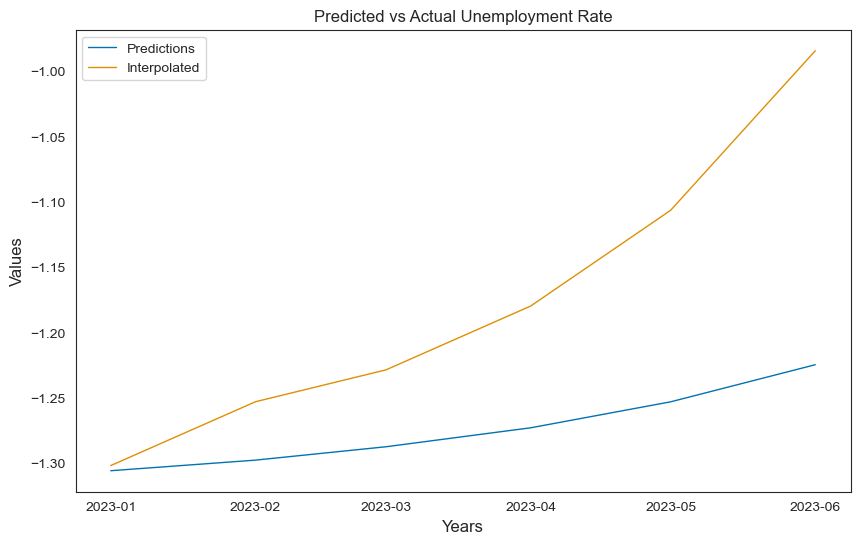

In [286]:
# Set the seaborn color palette to a color-blind friendly palette
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot data from df1 with reduced line thickness and smaller label size
plt.plot(predicted_df, label='Predictions', linewidth=1)
plt.plot(inter_unemploy_poly3_trend['2023':], label='Interpolated', linewidth=1)
# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Predicted vs Actual Unemployment Rate")

# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add legend with smaller font size
plt.legend(fontsize=10)

# Remove grid


# Show the plot
plt.show()


Monthly Earnings

In [287]:

def create_dataset(dummy, time_steps=1):
    X, Y = [], []
    for i in range(len(dummy) - time_steps):
        X.append(dummy.iloc[i:(i + time_steps), 0].values.reshape(-1, 1))
        Y.append(dummy.iloc[i + time_steps, 0])
    return np.array(X), np.array(Y)
 
# Assuming cpih_data is your original DataFrame
 
# Choose the number of time steps
time_steps = 6
 
# Create input-output sequences for training
X_train, Y_train = create_dataset(inter_real_poly3_trend.loc['2012-01-01':'2022-12-01'], time_steps)
 
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(units=50),
    Dense(units=1)
])
 
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
 
# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32)
 
# Create input sequences for prediction
X_pred = []
start_date = pd.Timestamp('2023-01-01')  # Update start date to June 1, 2023
end_date = pd.Timestamp('2023-6-01')  # Update end date to December 1, 2023
for i in range(len(inter_real_poly3_trend) - time_steps + 1, len(inter_real_poly3_trend) + 1):
    X_pred.append(inter_real_poly3_trend.iloc[i - time_steps:i, 0].values.reshape(-1, 1))
X_pred = np.array(X_pred).reshape(-1, time_steps, 1)
 
# Make predictions for the desired months (June to December 2023)
predictions = model.predict(X_pred)
 
# Create a DataFrame for the predicted values covering June to December 2023
predicted_months = pd.date_range(start='2023-01-01', end='2023-6-01', freq='M',normalize=True).to_period('M').to_timestamp()
predicted_values = predictions.flatten()
predicted_df = pd.DataFrame({'months': pd.date_range(start='2023-01-01', periods=len(predicted_values), freq='M'), 'Predicted Value': predicted_values})
predicted_df.set_index('months', inplace=True)

#print(predicted_df)


Epoch 1/100


2024-04-25 13:08:44.418703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 13:08:44.419138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 13:08:44.419694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 2s 3ms/step - loss: 0.4442
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2893
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1669
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0252
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0158
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0185
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 13/100
4/4 [==============================] - 0s 4ms/step - loss: 0

2024-04-25 13:08:47.941924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 13:08:47.942651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 13:08:47.943074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [288]:
mae = mean_absolute_error(inter_real_poly3_trend['2023':].values, predictions)
mse = mean_squared_error(inter_real_poly3_trend['2023':].values, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (RMSE): {mse:.4f}")

Mean Absolute Error (MAE): 0.05
Mean Squared Error (RMSE): 0.0027


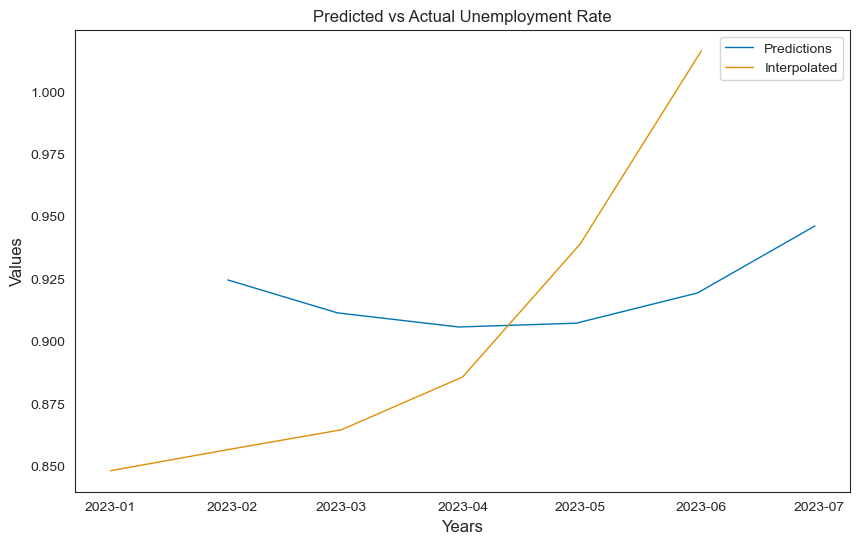

In [289]:
# Set the seaborn color palette to a color-blind friendly palette
sns.set_palette("colorblind")

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot data from df1 with reduced line thickness and smaller label size
plt.plot(predicted_df, label='Predictions', linewidth=1)
plt.plot(inter_real_poly3_trend['2023':], label='Interpolated', linewidth=1)
# Set smaller label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Predicted vs Actual Unemployment Rate")

# Add x and y labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add legend with smaller font size
plt.legend(fontsize=10)

# Remove grid


# Show the plot
plt.show()


# ARIMA

CPIH

In [341]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/40/e5/78afab229ccdaf6b947036440799dbdf88e2cd632e2f96b81f32de8aa05a/pmdarima-2.0.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/b6/83/b0a63fc7b315edd46821a1a381d18765c1353d201246da44558175cddd56/Cython-3.0.10-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 8.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.5 MB/s eta 0:00:00a 0:00:01m
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [353]:
import pmdarima as pm

# Assuming you have your time series data in a variable called 'data'

# Fit auto-ARIMA model
model = pm.auto_arima(seasonal_merged['L522_trend'][:-54] , seasonal=False, stepwise=True, suppress_warnings=True)

# Print model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(0, 2, 1)   Log Likelihood                1246.988
Date:                Thu, 25 Apr 2024   AIC                          -2489.977
Time:                        14:25:52   BIC                          -2483.163
Sample:                             0   HQIC                         -2487.226
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4814      0.032     14.848      0.000       0.418       0.545
sigma2        8.1e-07   3.74e-08     21.653      0.000    7.37e-07    8.83e-07
Ljung-Box (L1) (Q):                   0.05   Jarque-

In [354]:
forecast_steps = 64
forecast = model.predict(n_periods=forecast_steps)

# Print or use the forecasted values
print(forecast)

225    0.873347
226    0.884745
227    0.896143
228    0.907542
229    0.918940
         ...   
284    1.545854
285    1.557253
286    1.568651
287    1.580050
288    1.591448
Length: 64, dtype: float64


/Users/sp/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sp/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


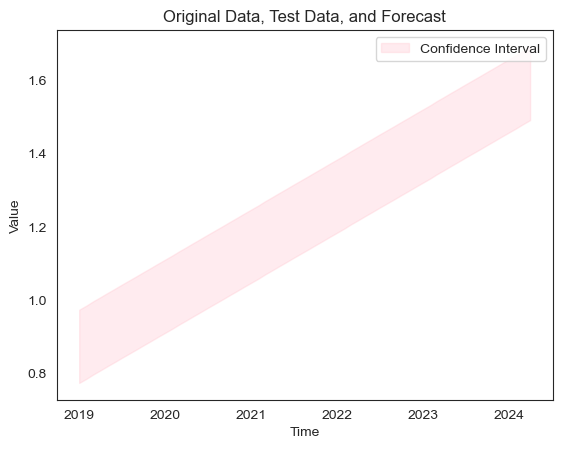

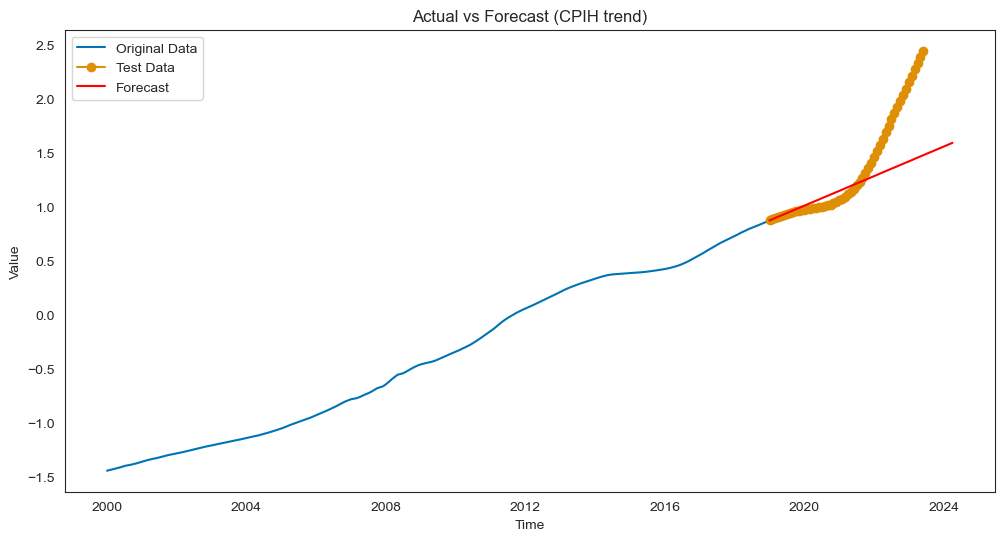

In [369]:
forecast_dates = pd.date_range(start='2019-01-01',end='2024-5-01', freq='M',normalize=True).to_period('M').to_timestamp()

conf_int_values = np.array([forecast - 0.1, forecast + 0.1]).T  # Replace with your actual confidence interval data.


# Plot confidence interval (replace `conf_int_values` with your actual confidence interval values)
plt.fill_between(forecast_dates, conf_int_values[:, 0], conf_int_values[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Original Data, Test Data, and Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
train_data = seasonal_merged['L522_trend'][:-54]  # Use all but the last 10 data points for training
test_data = seasonal_merged['L522_trend'][-54:]  # Use the last 10 data points for testing

# Plot real values vs original data
plt.figure(figsize=(12, 6))
plt.plot(seasonal_merged.index, seasonal_merged['L522_trend'], label='Original Data')
plt.plot(test_data.index, test_data.values, label='Test Data', marker='o')
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title(f'Actual vs Forecast (CPIH trend)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 22.2338%
Mean Squared Error (MSE): 13.0542%


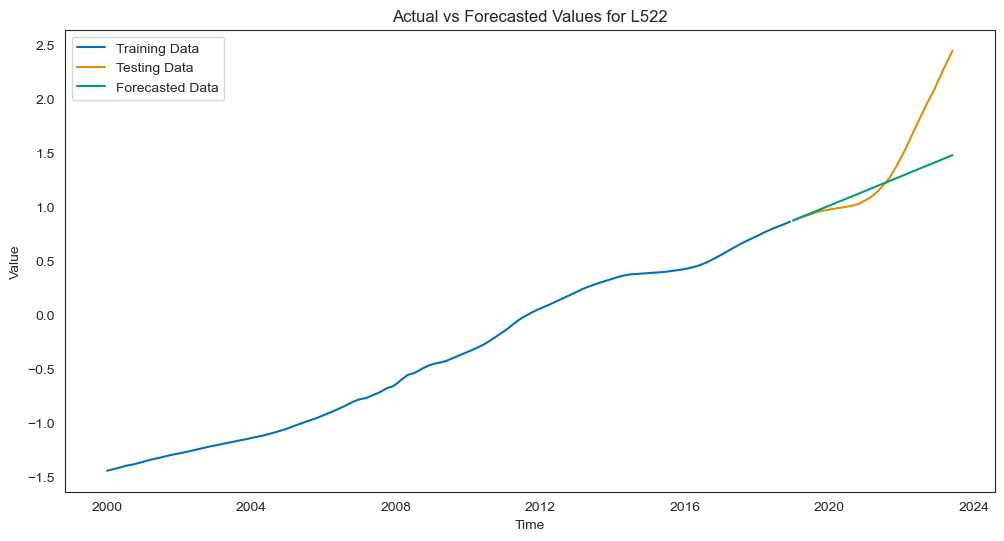

In [368]:
#To be taken

# Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecast[0:54])
mse = mean_squared_error(test_data, forecast[0:54])

print(f"Mean Absolute Error (MAE): {(mae*100):.4f}%")
print(f"Mean Squared Error (MSE): {(mse*100):.4f}%")

# Plot actual vs forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(test_data.index, forecast[0:54], label='Forecasted Data')
plt.title('Actual vs Forecasted Values for L522')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Monthly Earnings

In [391]:
model = pm.auto_arima(inter_real_poly3_actual[:-54] , seasonal=False, stepwise=True, suppress_warnings=True)

# Print model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 306.758
Date:                Thu, 25 Apr 2024   AIC                           -609.515
Time:                        14:54:44   BIC                           -602.674
Sample:                    01-01-2000   HQIC                          -606.754
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9335      0.025    -37.515      0.000      -0.982      -0.885
sigma2         0.0038      0.000     11.357      0.000       0.003       0.005
Ljung-Box (L1) (Q):                   0.09   Jarque-

In [392]:
forecast_steps = 64
forecast = model.predict(n_periods=forecast_steps)

# Print or use the forecasted values
print(forecast)

2019-01-01    0.414573
2019-02-01    0.428264
2019-03-01    0.441956
2019-04-01    0.455647
2019-05-01    0.469339
                ...   
2023-12-01    1.222371
2024-01-01    1.236062
2024-02-01    1.249754
2024-03-01    1.263445
2024-04-01    1.277137
Freq: MS, Length: 64, dtype: float64


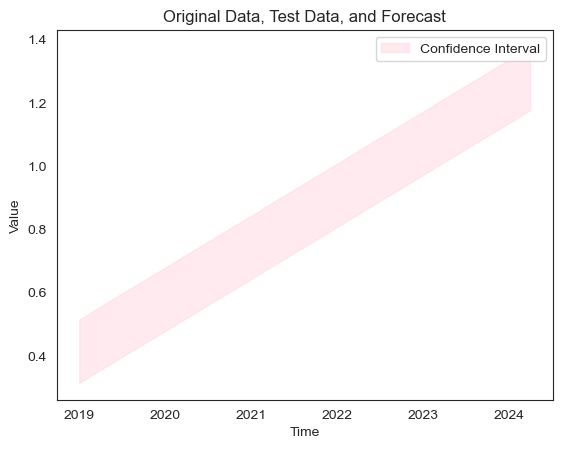

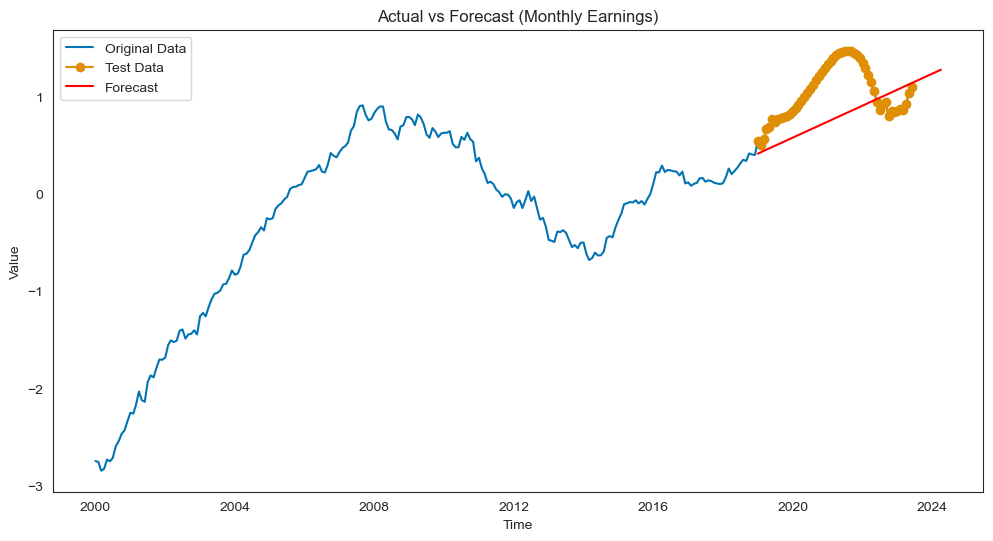

In [393]:
forecast_dates = pd.date_range(start='2019-01-01',end='2024-5-01', freq='M',normalize=True).to_period('M').to_timestamp()

conf_int_values = np.array([forecast - 0.1, forecast + 0.1]).T  # Replace with your actual confidence interval data.


# Plot confidence interval (replace `conf_int_values` with your actual confidence interval values)
plt.fill_between(forecast_dates, conf_int_values[:, 0], conf_int_values[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Original Data, Test Data, and Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
train_data = inter_real_poly3_actual[:-54]  # Use all but the last 10 data points for training
test_data = inter_real_poly3_actual[-54:]  # Use the last 10 data points for testing

# Plot real values vs original data
plt.figure(figsize=(12, 6))
plt.plot(inter_real_poly3_actual.index, inter_real_poly3_actual, label='Original Data')
plt.plot(test_data.index, test_data.values, label='Test Data', marker='o')
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title(f'Actual vs Forecast (Monthly Earnings)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 33.6144%
Mean Squared Error (MSE): 14.8702%


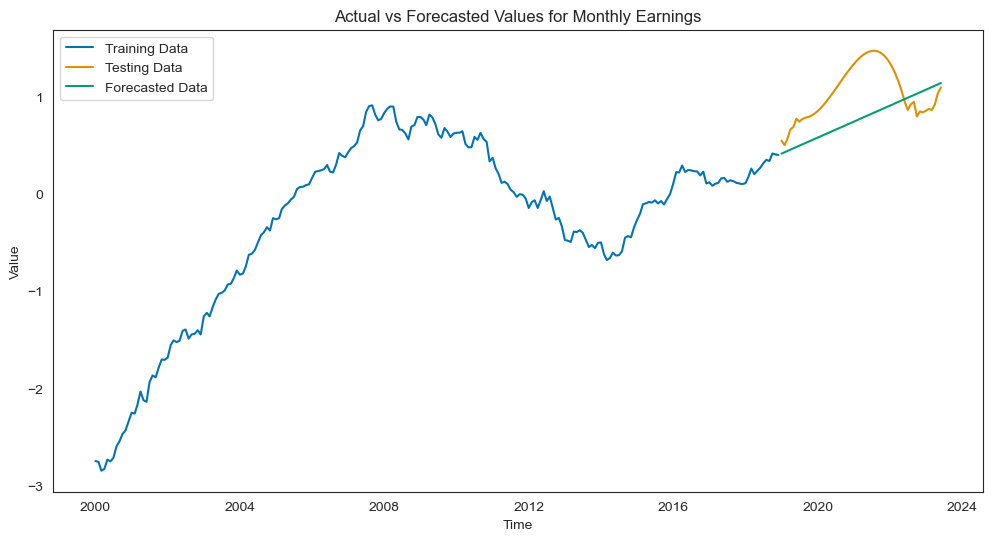

In [382]:
# Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecast[0:54])
mse = mean_squared_error(test_data, forecast[0:54])

print(f"Mean Absolute Error (MAE): {(mae*100):.4f}%")
print(f"Mean Squared Error (MSE): {(mse*100):.4f}%")

# Plot actual vs forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(test_data.index, forecast[0:54], label='Forecasted Data')
plt.title('Actual vs Forecasted Values for Monthly Earnings')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Unemployment

In [383]:
model = pm.auto_arima(inter_unemploy_poly3_trend[:-54] , seasonal=False, stepwise=True, suppress_warnings=True)

# Print model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(2, 2, 1)   Log Likelihood                 330.173
Date:                Thu, 25 Apr 2024   AIC                           -652.346
Time:                        14:51:10   BIC                           -642.719
Sample:                    01-01-2012   HQIC                          -648.481
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0036      0.147      0.024      0.981      -0.284       0.291
ar.L2          0.0184      0.128      0.144      0.885      -0.232       0.268
ma.L1          0.9745      0.121      8.028      0.0

In [384]:
forecast_steps = 64
forecast = model.predict(n_periods=forecast_steps)

# Print or use the forecasted values
print(forecast)

2019-01-01   -1.167035
2019-02-01   -1.178599
2019-03-01   -1.190208
2019-04-01   -1.201815
2019-05-01   -1.213424
                ...   
2023-12-01   -1.851883
2024-01-01   -1.863491
2024-02-01   -1.875099
2024-03-01   -1.886708
2024-04-01   -1.898316
Freq: MS, Length: 64, dtype: float64


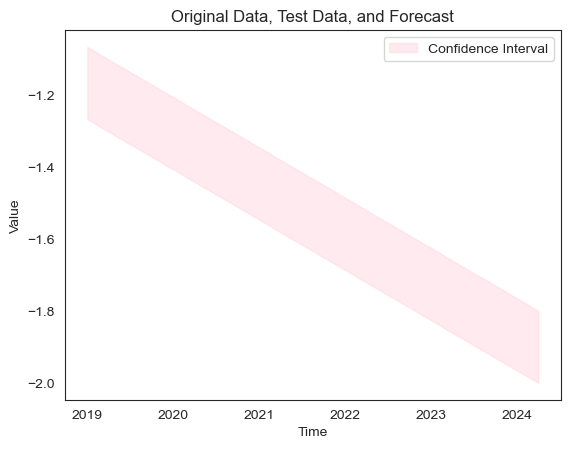

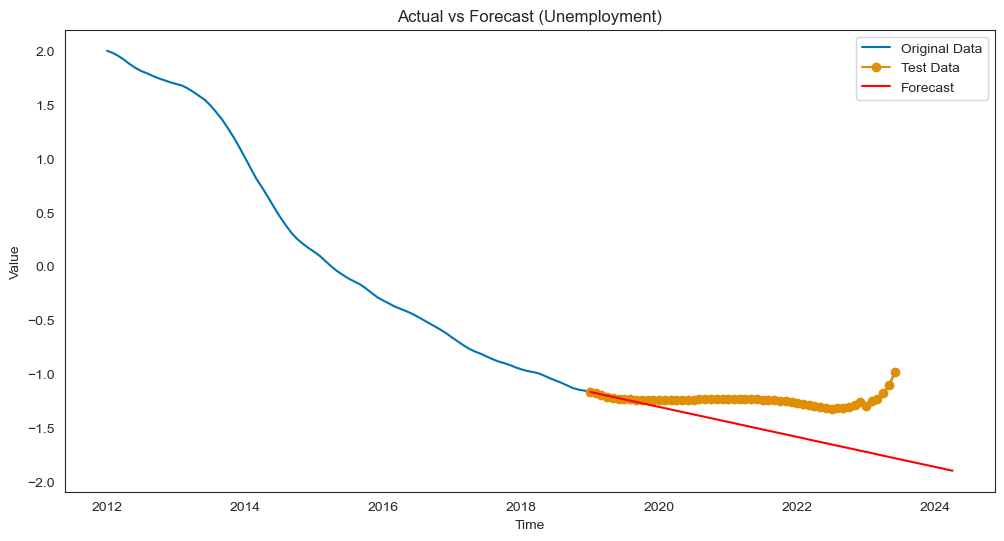

In [389]:
forecast_dates = pd.date_range(start='2019-01-01',end='2024-5-01', freq='M',normalize=True).to_period('M').to_timestamp()

conf_int_values = np.array([forecast - 0.1, forecast + 0.1]).T  # Replace with your actual confidence interval data.


# Plot confidence interval (replace `conf_int_values` with your actual confidence interval values)
plt.fill_between(forecast_dates, conf_int_values[:, 0], conf_int_values[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Original Data, Test Data, and Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
train_data = inter_unemploy_poly3_trend[:-54]  # Use all but the last 10 data points for training
test_data = inter_unemploy_poly3_trend[-54:]  # Use the last 10 data points for testing

# Plot real values vs original data
plt.figure(figsize=(12, 6))
plt.plot(inter_unemploy_poly3_trend.index, inter_unemploy_poly3_trend, label='Original Data')
plt.plot(test_data.index, test_data.values, label='Test Data', marker='o')
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title(f'Actual vs Forecast (Unemployment)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 23.5133%
Mean Squared Error (MSE): 8.7398%


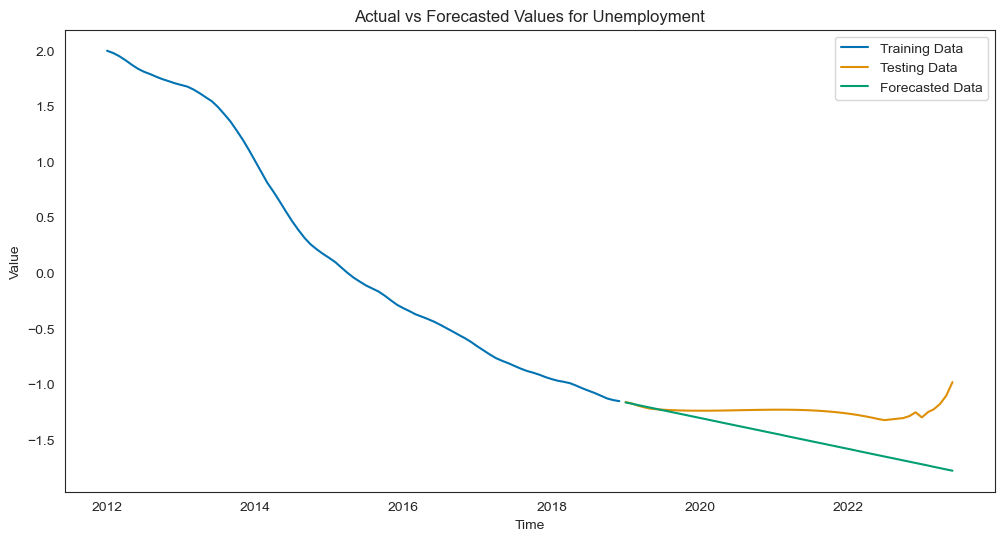

In [386]:
# Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecast[0:54])
mse = mean_squared_error(test_data, forecast[0:54])

print(f"Mean Absolute Error (MAE): {(mae*100):.4f}%")
print(f"Mean Squared Error (MSE): {(mse*100):.4f}%")

# Plot actual vs forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(test_data.index, forecast[0:54], label='Forecasted Data')
plt.title('Actual vs Forecasted Values for Unemployment')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Multiple Regression

CPIH

In [395]:
cpih_ref.rename(columns={'L522': 'CPIH'}, inplace=True)

In [399]:
def create_features(df):
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    #df['year'] = df.index.year
    #df['trend'] = df[trend_col]
    return df

df = create_features(cpih_ref)
df['trend'] = seasonal_merged['L522_trend']
df.dropna(inplace=True)
# Specify the start and end dates
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2023-07-01')

# Filter the data based on the specified date range
#filtered_data = seasonal_merged[(seasonal_merged.index >= start_date) & (seasonal_merged.index < end_date)]
    

# Separate features (X) and target variable (y)
X = df.drop('CPIH', axis = 1)
y = df['CPIH']

# Split the data into training and testing sets with a test size of 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create a linear regression model
model = LinearRegression()

start_time = time.time()
model.fit(X, y)
training_time_CPIH_regression = time.time() - start_time
print(f"Training time of cpih regression: {training_time_CPIH_regression:.4f} seconds")


# Measure prediction time
start_time = time.time()
y_pred = model.predict(X)
prediction_time_CPIH_regression = time.time() - start_time
print(f"Prediction time of cpih regression: {prediction_time_CPIH_regression:.4f} seconds")

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Create a DataFrame for the predicted values
predicted_CPIH_test = pd.DataFrame(index=X_test.index, columns=['Predicted_CPIH'])
predicted_CPIH_test['Predicted_CPIH'] = y_pred

# Print the DataFrame
print(predicted_CPIH_test)




Training time of cpih regression: 0.0099 seconds
Prediction time of cpih regression: 0.0010 seconds
            Predicted_CPIH
months                    
2018-11-01        0.858373
2018-12-01        0.874251
2019-01-01        0.862431
2019-02-01        0.877751
2019-03-01        0.892202
2019-04-01        0.897921
2019-05-01        0.911192
2019-06-01        0.924126
2019-07-01        0.929764
2019-08-01        0.944531
2019-09-01        0.958661
2019-10-01        0.962355
2019-11-01        0.971544
2019-12-01        0.980368
2020-01-01        0.962804
2020-02-01        0.972116
2020-03-01        0.980227
2020-04-01        0.981444
2020-05-01        0.990232
2020-06-01        0.998814
2020-07-01        1.000398
2020-08-01        1.009814
2020-09-01        1.019318
2020-10-01        1.023495
2020-11-01        1.039331
2020-12-01        1.057675
2021-01-01        1.048091
2021-02-01        1.068051
2021-03-01        1.090630
2021-04-01        1.107664
2021-05-01        1.137883
2021-06-0

In [400]:
r_squared = r2_score(y_test, predicted_CPIH_test)

# Compute mean squared error
mse = mean_squared_error(y_test, predicted_CPIH_test)

# Compute mean absolute error
mae = mean_absolute_error(y_test, predicted_CPIH_test)

# Print the evaluation metrics
print("Model performance for CPIH:")
print(f"R-squared: {r_squared:.2f}")
print(f"Mean Squared Error: {mse*100:.4f}")
print(f"Mean Absolute Error: {mae*100:.4f}")


Model performance for CPIH:
R-squared: 1.00
Mean Squared Error: 0.0897
Mean Absolute Error: 2.2351


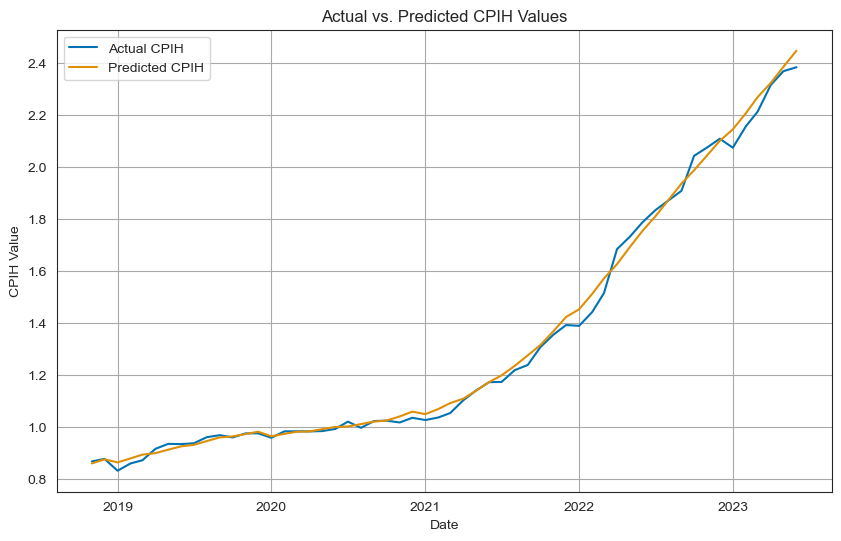

In [401]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual CPIH')
plt.plot(predicted_CPIH_test.index, predicted_CPIH_test['Predicted_CPIH'], label='Predicted CPIH')
plt.xlabel('Date')
plt.ylabel('CPIH Value')
plt.title('Actual vs. Predicted CPIH Values')
plt.legend()
plt.grid(True, color='darkgrey')
plt.show()

In [402]:
# Use the last observed CPIH value for June 2023 as the starting point
last_cpih = y_test[-1]

# Initialize a list to store predicted CPIH values
predicted_values = []

# Initialize the last observed quarter and month
last_quarter = X_test['quarter'][-1]
last_month = X_test['month'][-1]

# Loop through the months of July to December
for i in range(7, 13):
    # Predict the CPIH value for the next month
    prediction = model.predict([[last_quarter, last_month, last_cpih]])[0]  # Provide all features for prediction
    
    # Store the predicted CPIH value
    predicted_values.append(prediction)
    
    # Increment the month
    last_month += 1
    if last_month > 12:
        last_month = 1
        last_quarter += 1
        if last_quarter > 4:
            last_quarter = 1
    
    # Update last_cpih for the next prediction
    last_cpih = prediction

# Create a DataFrame to store the predicted CPIH values
predicted_CPIH_6months = pd.DataFrame({'Predicted_CPIH': predicted_values}, index=pd.date_range(start='2023-07-01', periods=6, freq='M'))

# Print the predicted CPIH values
print(predicted_CPIH_6months)


            Predicted_CPIH
2023-07-31        2.386277
2023-08-31        2.393600
2023-09-30        2.405265
2023-10-31        2.421273
2023-11-30        2.441626
2023-12-31        2.466326


/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/bas

In [403]:
cpih_actual_6months = CPIH_seasonal_merged['L522']['2023-07':]

# Convert the series to a DataFrame
cpih_actual_6months = pd.DataFrame(cpih_actual_6months)

# Print the DataFrame
print(cpih_actual_6months)

                L522
months              
2023-07-01  2.356445
2023-08-01  2.388503
2023-09-01  2.431788
2023-10-01  2.441189
2023-11-01  2.430300


In [404]:
predicted_CPIH_6months=predicted_CPIH_6months[:-1]
predicted_CPIH_6months

Predicted_CPIH
2023-07-31        2.386277
2023-08-31        2.393600
2023-09-30        2.405265
2023-10-31        2.421273
2023-11-30        2.441626

In [405]:
# Compute R-squared
r_squared = r2_score(predicted_CPIH_6months['Predicted_CPIH'], cpih_actual_6months['L522'])

# Compute mean squared error
mse = mean_squared_error(predicted_CPIH_6months['Predicted_CPIH'], cpih_actual_6months['L522'])

# Compute mean absolute error
mae = mean_absolute_error(predicted_CPIH_6months['Predicted_CPIH'], cpih_actual_6months['L522'])

# Print the evaluation metrics
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse*100:.4f}")
print(f"Mean Absolute Error: {mae*100:.4f}")


R-squared: -0.0827
Mean Squared Error: 0.0429
Mean Absolute Error: 1.8539


Monthly Earnings

In [407]:
interpolated_AWE_with_trends = inter_real_poly3_actual.join(inter_real_poly3_trend)

interpolated_AWE_with_trends
def create_features(df):
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    #df['year'] = df.index.year
    #df['trend'] = df[trend_col]
    return df

df = create_features(interpolated_AWE_with_trends)
#df['trend'] = interpolated_AWE_with_trends['Real AWE_trend']
df.dropna(inplace=True)
# Specify the start and end dates
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2023-07-01')

# Filter the data based on the specified date range
#filtered_data = seasonal_merged[(seasonal_merged.index >= start_date) & (seasonal_merged.index < end_date)]
    

# Separate features (X) and target variable (y)
X = df.drop('Real AWE', axis = 1)
y = df['Real AWE']

# Split the data into training and testing sets with a test size of 0.2
X_train_AWE, X_test_AWE, y_train_AWE, y_test_AWE = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [408]:


# Create a linear regression model
model = LinearRegression()

start_time = time.time()
model.fit(X_train_AWE, y_train_AWE)
training_time_AWE_regression = time.time() - start_time
print(f"Training time of AWE regression: {training_time_AWE_regression:.4f} seconds")


# Measure prediction time
start_time = time.time()
y_pred_AWE= model.predict(X_test_AWE)
prediction_time_AWE_regression = time.time() - start_time
print(f"Prediction time of AWE regression: {prediction_time_AWE_regression:.4f} seconds")



# Create a DataFrame for the predicted values
predicted_AWE = pd.DataFrame(index=X_test_AWE.index, columns=['Predicted_salary'])
predicted_AWE['Predicted_salary'] = y_pred_AWE

# Print the DataFrame
print(predicted_AWE)

Training time of AWE regression: 0.0130 seconds
Prediction time of AWE regression: 0.0009 seconds
            Predicted_salary
months                      
2018-10-01          0.391978
2018-11-01          0.427416
2018-12-01          0.464656
2019-01-01          0.525150
2019-02-01          0.557867
2019-03-01          0.591312
2019-04-01          0.625657
2019-05-01          0.656793
2019-06-01          0.689675
2019-07-01          0.716797
2019-08-01          0.735421
2019-09-01          0.753502
2019-10-01          0.775718
2019-11-01          0.799947
2019-12-01          0.825975
2020-01-01          0.879586
2020-02-01          0.910881
2020-03-01          0.941411
2020-04-01          0.977236
2020-05-01          1.010702
2020-06-01          1.045701
2020-07-01          1.081326
2020-08-01          1.115785
2020-09-01          1.149352
2020-10-01          1.182412
2020-11-01          1.213005
2020-12-01          1.240507
2021-01-01          1.290800
2021-02-01          1.313855
202

In [409]:
r_squared = r2_score(y_test_AWE, predicted_AWE)

# Compute mean squared error
mse = mean_squared_error(y_test_AWE, predicted_AWE)

# Compute mean absolute error
mae = mean_absolute_error(y_test_AWE, predicted_AWE)




# Print the evaluation metrics
print("model performance for awe:")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse*100:.4f}")
print(f"Mean Absolute Error: {mae*100:.4f}")


model performance for awe:
R-squared: 0.9654
Mean Squared Error: 0.3159
Mean Absolute Error: 4.5204


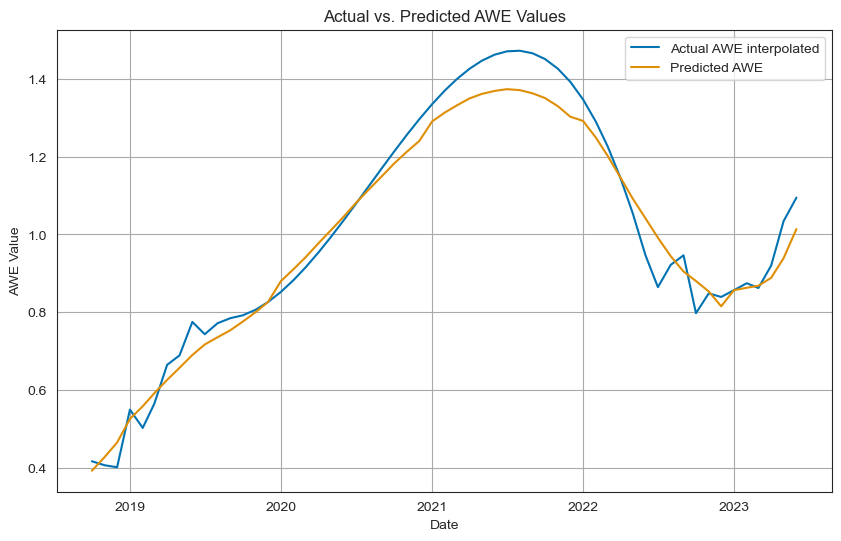

In [410]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_AWE, label='Actual AWE interpolated')
plt.plot(predicted_AWE.index, predicted_AWE['Predicted_salary'], label='Predicted AWE')
plt.xlabel('Date')
plt.ylabel('AWE Value')
plt.title('Actual vs. Predicted AWE Values')
plt.legend()
plt.grid(color='darkgrey')
plt.show()

In [411]:
# Use the last observed CPIH value for June 2023 as the starting point
last_awe = y_test_AWE[-1]

# Initialize a list to store predicted CPIH values
predicted_values = []

# Initialize the last observed quarter and month
last_quarter = X_test_AWE['quarter'][-1]
last_month = X_test_AWE['month'][-1]

# Loop through the months of July to December
for i in range(7, 13):
    # Predict the CPIH value for the next month
    prediction = model.predict([[last_quarter, last_month, last_awe]])[0]  # Provide all features for prediction
    
    # Store the predicted CPIH value
    predicted_values.append(prediction)
    
    # Increment the month
    last_month += 1
    if last_month > 12:
        last_month = 1
        last_quarter += 1
        if last_quarter > 4:
            last_quarter = 1
    
    # Update last_cpih for the next prediction
    last_awe = prediction

# Create a DataFrame to store the predicted CPIH values
predicted_AWE_6months = pd.DataFrame({'Predicted_AWE': predicted_values}, index=pd.date_range(start='2023-07-01', periods=6, freq='M'))

# Print the predicted CPIH values
print(predicted_AWE_6months)


            Predicted_AWE
2023-07-31       2.014381
2023-08-31       2.013982
2023-09-30       2.015883
2023-10-31       2.017777
2023-11-30       2.019672
2023-12-31       2.021567


/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sp/anaconda3/lib/python3.11/site-packages/sklearn/bas

Unemployment

In [412]:
interpolated_unemp_with_trends = inter_unemploy_poly3_actual.join(inter_unemploy_poly3_trend)

interpolated_unemp_with_trends

unemployment_percentage  unemployment_percentage_trend
months                                                            
2012-01-01                 2.046072                       2.000250
2012-02-01                 1.972757                       1.978866
2012-03-01                 1.972757                       1.951373
2012-04-01                 1.899441                       1.914715
2012-05-01                 1.826126                       1.875003
...                             ...                            ...
2023-02-01                -1.179806                      -1.253122
2023-03-01                -1.253122                      -1.228683
2023-04-01                -1.106491                      -1.179806
2023-05-01                -0.959860                      -1.106491
2023-06-01                -0.886545                      -0.984299

[138 rows x 2 columns]

In [413]:
def create_features(df):
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    #df['year'] = df.index.year
    #df['trend'] = df[trend_col]
    return df

df = create_features(interpolated_unemp_with_trends)
#df['trend'] = interpolated_AWE_with_trends['Real AWE_trend']
df.dropna(inplace=True)
# Specify the start and end dates
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2023-07-01')

# Filter the data based on the specified date range
#filtered_data = seasonal_merged[(seasonal_merged.index >= start_date) & (seasonal_merged.index < end_date)]
    

# Separate features (X) and target variable (y)
X = df.drop('unemployment_percentage', axis = 1)
y = df['unemployment_percentage']

# Split the data into training and testing sets with a test size of 0.2
X_train_unemployment, X_test_unemployment, y_train_unemployment, y_test_unemployment = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [414]:
# Create a linear regression model
model = LinearRegression()

start_time = time.time()
model.fit(X_train_unemployment, y_train_unemployment)
training_time_unemp_regression = time.time() - start_time
print(f"Training time of unemployment regression: {training_time_unemp_regression:.4f} seconds")


# Measure prediction time
start_time = time.time()
y_pred_unemployment= model.predict(X_test_unemployment)
prediction_time_unemp_regression = time.time() - start_time
print(f"Prediction time of unemployment regression: {prediction_time_unemp_regression:.4f} seconds")


# Create a DataFrame for the predicted values
predicted_unemployment = pd.DataFrame(index=X_test_unemployment.index, columns=['Predicted_unemployment'])
predicted_unemployment['Predicted_unemployment'] = y_pred_unemployment

# Print the DataFrame
print(predicted_unemployment)

Training time of unemployment regression: 0.0048 seconds
Prediction time of unemployment regression: 0.0007 seconds
            Predicted_unemployment
months                            
2021-03-01               -1.254841
2021-04-01               -1.251119
2021-05-01               -1.253485
2021-06-01               -1.256430
2021-07-01               -1.254260
2021-08-01               -1.258462
2021-09-01               -1.263392
2021-10-01               -1.263311
2021-11-01               -1.269846
2021-12-01               -1.277072
2022-01-01               -1.287226
2022-02-01               -1.296620
2022-03-01               -1.306156
2022-04-01               -1.312021
2022-05-01               -1.324333
2022-06-01               -1.338248
2022-07-01               -1.343119
2022-08-01               -1.338214
2022-09-01               -1.333310
2022-10-01               -1.322764
2022-11-01               -1.305527
2022-12-01               -1.272873
2023-01-01               -1.322164
2023-02-0

In [415]:
r_squared = r2_score(y_test_unemployment, predicted_unemployment)

# Compute mean squared error
mse = mean_squared_error(y_test_unemployment, predicted_unemployment)

# Compute mean absolute error
mae = mean_absolute_error(y_test_unemployment, predicted_unemployment)

# Print the evaluation metrics
print("model performance for unemp")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse*100:.4f}")
print(f"Mean Absolute Error: {mae*100:.4f}")

model performance for unemp
R-squared: 0.6548
Mean Squared Error: 0.3196
Mean Absolute Error: 4.1544


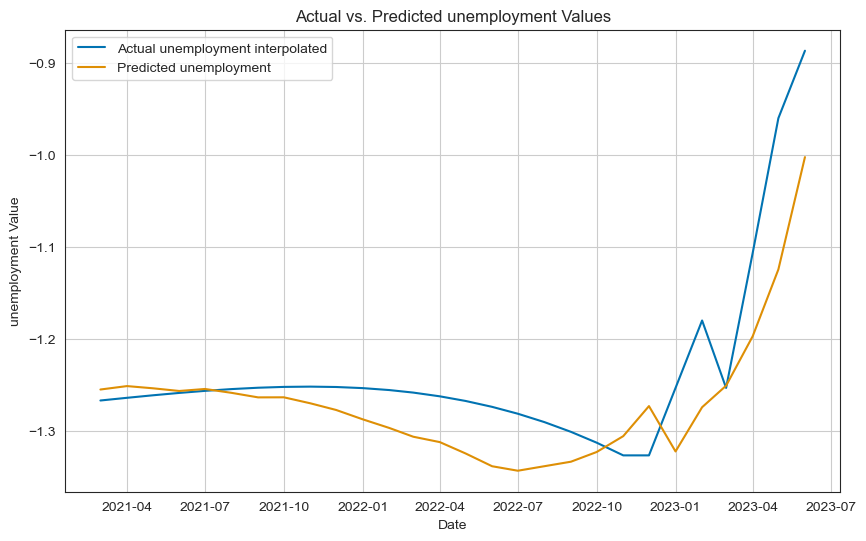

In [416]:
# Plot the actual and predicted CPIH values
plt.figure(figsize=(10, 6))
plt.plot(y_test_unemployment, label='Actual unemployment interpolated')
plt.plot(predicted_unemployment.index, predicted_unemployment['Predicted_unemployment'], label='Predicted unemployment')
plt.xlabel('Date')
plt.ylabel('unemployment Value')
plt.title('Actual vs. Predicted unemployment Values')
plt.legend()
plt.grid(True)
plt.show()

In [419]:
# Ignore all warnings
warnings.filterwarnings("ignore")
# Use the last observed CPIH value for June 2023 as the starting point
last_unemp = y_test_unemployment[-1]

# Initialize a list to store predicted CPIH values
predicted_values = []

# Initialize the last observed quarter and month
last_quarter = X_test_unemployment['quarter'][-1]
last_month = X_test_unemployment['month'][-1]

# Loop through the months of July to December
for i in range(7, 13):
    # Predict the CPIH value for the next month
    prediction = model.predict([[last_unemp,last_quarter, last_month]])[0]  # Provide all features for prediction
    
    # Store the predicted CPIH value
    predicted_values.append(prediction)
    
    # Increment the month
    last_month += 1
    if last_month > 12:
        last_month = 1
        last_quarter += 1
        if last_quarter > 4:
            last_quarter = 1
    
    # Update last_cpih for the next prediction
    last_unemp = prediction

# Create a DataFrame to store the predicted CPIH values
predicted_unemp_6months = pd.DataFrame({'Predicted_unemp': predicted_values}, index=pd.date_range(start='2023-07-01', periods=6, freq='M'))

# Print the predicted CPIH values
print(predicted_unemp_6months)



            Predicted_unemp
2023-07-31        -0.903514
2023-08-31        -0.921903
2023-09-30        -0.941726
2023-10-31        -0.962994
2023-11-30        -0.985722
2023-12-31        -1.009923


CPIH_various sectors

In [421]:
drop_cols=['L522_seasonal', 'L523_seasonal',
       'L524_seasonal', 'L525_seasonal', 'L536_seasonal', 'L53A_seasonal',
       'L53E_seasonal', 'DHYR_seasonal', 'L528_seasonal',
       'L529_seasonal', 'L52C_seasonal', 'L52D_seasonal', 'L55J_seasonal',
       'L522_residual', 'L523_residual', 'L524_residual', 'L525_residual',
       'L536_residual', 'L53A_residual', 'L53E_residual', 
       'DHYR_residual', 'L528_residual', 'L529_residual', 'L52C_residual',
       'L52D_residual', 'L55J_residual']
CPIH_seasonal_merged=CPIH_seasonal_merged.drop(drop_cols,axis=1)

In [422]:
CPIH_seasonal_merged_filtered = CPIH_seasonal_merged.loc['2012':'2023']


In [423]:
# Initialize DataFrame to store all predictions
all_predictions_df = pd.DataFrame()
mse_test = {}

# Loop through each trend feature
for i in trend_features:
    # Define function to create features
    def create_features(df):
        df = df.copy()
        df['quarter'] = df.index.quarter
        df['month'] = df.index.month
        df['trend'] = trend_modified[i]
        #df['actual'] = cpih_14_from2000_normal[i]
        #df['num_index'] = np.arange(0, len(trend_features))
        return df
    
    # Create DataFrame with features and target
    dum = pd.DataFrame(cpih_14_from2000_normal[i].copy())
    df = create_features(dum)
    
    # Prepare features and target
    features = df.drop(i, axis=1)  # Features excluding target variable
    target = df[i]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)
    
    # Initialize Linear Regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mse_test[stripped_index_dict[i]] = mean_squared_error(y_test, predictions)
    
    #print(f"Mean Absolute Error (MAE) for {stripped_index_dict[i]}: {mae:.4f}")
    print(f"Mean Squared Error (MSE) for {stripped_index_dict[i]}: {mse * 100:.4f}")
    print(f"R-squared for {stripped_index_dict[i]}:{r_squared:.4f}")

    
    # Store predictions for test data
    predictions_df = pd.DataFrame({
        f'{i}_Actual': y_test.values,
        f'{i}_Predicted': predictions
    }, index=X_test.index.values)
    
    # Concatenate predictions for the current column with all predictions
    all_predictions_df = pd.concat([all_predictions_df, predictions_df], axis=1)

Mean Squared Error (MSE) for CPIH ALL ITEMS: 0.2626
R-squared for CPIH ALL ITEMS:0.6548
Mean Squared Error (MSE) for FOOD AND NON-ALCOHOLIC BEVERAGES: 0.1637
R-squared for FOOD AND NON-ALCOHOLIC BEVERAGES:0.6548
Mean Squared Error (MSE) for ALCOHOLIC BEVERAGES AND TOBACCO: 0.2441
R-squared for ALCOHOLIC BEVERAGES AND TOBACCO:0.6548
Mean Squared Error (MSE) for CLOTHING AND FOOTWEAR: 0.6873
R-squared for CLOTHING AND FOOTWEAR:0.6548
Mean Squared Error (MSE) for ACTUAL RENTALS FOR HOUSING: 0.0710
R-squared for ACTUAL RENTALS FOR HOUSING:0.6548
Mean Squared Error (MSE) for WATER SUPPLY AND MISC. SERVICES FOR THE DWELLING: 0.3848
R-squared for WATER SUPPLY AND MISC. SERVICES FOR THE DWELLING:0.6548
Mean Squared Error (MSE) for ELECTRICITY: 3.4877
R-squared for ELECTRICITY:0.6548
Mean Squared Error (MSE) for COUNCIL TAX AND OTHER RATES: 0.5171
R-squared for COUNCIL TAX AND OTHER RATES:0.6548
Mean Squared Error (MSE) for HEALTH: 0.0984
R-squared for HEALTH:0.6548
Mean Squared Error (MSE) for

In [425]:
font_size = 40

# Create a figure to hold all plots
fig, axes = plt.subplots(13, 1, figsize=(60, 250))

# Plot actual vs predicted values for each column
for i, real_col in enumerate(cpih_14_from2000_normal):
    # Extract actual and predicted values for the current column
    actual_values = all_predictions_df[f'{real_col}_Actual']
    predicted_values = all_predictions_df[f'{real_col}_Predicted']

    # Plot actual vs predicted values
    ax = axes[i]
    ax.plot(all_predictions_df.index, actual_values, color='blue', label='Actual', linewidth=4)
    ax.plot(all_predictions_df.index, predicted_values, color='red', label='Predicted', linewidth=4)

    # Set font size for labels and legends
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.set_xlabel('Year', fontsize=font_size)
    ax.set_ylabel('Value', fontsize=font_size)
    ax.set_title(f'{stripped_index_dict[real_col]} - Actual vs Predicted', fontsize=font_size)
    ax.legend(fontsize=font_size)

    # Set grid color to white
    ax.grid(color='white')

# Adjust layout
plt.tight_layout()
plt.show()


In [426]:
warnings.filterwarnings("ignore")

# Predict for the next 6 months
predicted_values_all_columns = {}

# Loop through each column for prediction
for col in  cpih_14_from2000_normal:
    # Use the last observed value of the trend column as the starting point
    last_value = CPIH_seasonal_merged_filtered[col+'_trend'].iloc[-1]
    # Reshape the last_value to ensure it's a 2-dimensional array
    last_quarter = X_test['quarter'][-1]
    last_month = X_test['month'][-1]
    print(last_quarter,last_month, last_value)

    # Predict for the next 6 months
    predicted_values = []

    # Loop through the next 6 months
    for i in range(12):
        # Predict the value for the next month using the last observed value
        prediction = model.predict([[last_quarter, last_month,last_value]])[0] # Provide only one feature

        # Store the predicted value
        predicted_values.append(prediction)
        # Increment the month
        last_month += 1
        if last_month > 12:
            last_month = 1
            last_quarter += 1
            if last_quarter > 4:
                last_quarter = 1

        # Update last_value for the next prediction
        last_value = prediction

    # Store the predicted values for the current column in the dictionary
    predicted_values_all_columns[col] = predicted_values

# Create a DataFrame to store the predicted values for all columns
predicted_df_all_columns = pd.DataFrame(predicted_values_all_columns, index=pd.date_range(start='2023-07-01',periods = 12, freq='M', normalize=True).to_period('M').to_timestamp())

# Print the predicted values for all columns
print(predicted_df_all_columns)

4 11 2.6461334507025214
4 11 2.9948855974544593
4 11 2.1292077113952503
4 11 0.4134945798859828
4 11 2.0283883393558444
4 11 1.6743161850499932
4 11 3.9188742351102945
4 11 2.048134069395923
4 11 2.2078360024080794
4 11 2.1024424032515467
4 11 1.6433486087882048
4 11 2.612189735456054
4 11 2.02768908555617
                L522      L523      L524      L525      L536      L53A  \
2023-07-01  2.635466  2.983938  2.118955  0.404620  2.018217  1.664429   
2023-08-01  2.613932  2.962124  2.097836  0.384877  1.997179  1.643675   
2023-09-01  2.630134  2.978046  2.114452  0.402869  2.013876  1.660656   
2023-10-01  2.635447  2.983080  2.120180  0.409971  2.019684  1.666748   
2023-11-01  2.629881  2.977235  2.115027  0.406192  2.014612  1.661959   
2023-12-01  2.613444  2.960519  2.099003  0.391540  1.998669  1.646299   
2024-01-01  2.586144  2.932941  2.072117  0.366025  1.971863  1.619776   
2024-02-01  2.547991  2.894509  2.034377  0.329654  1.934203  1.582399   
2024-03-01  2.498993  2.84

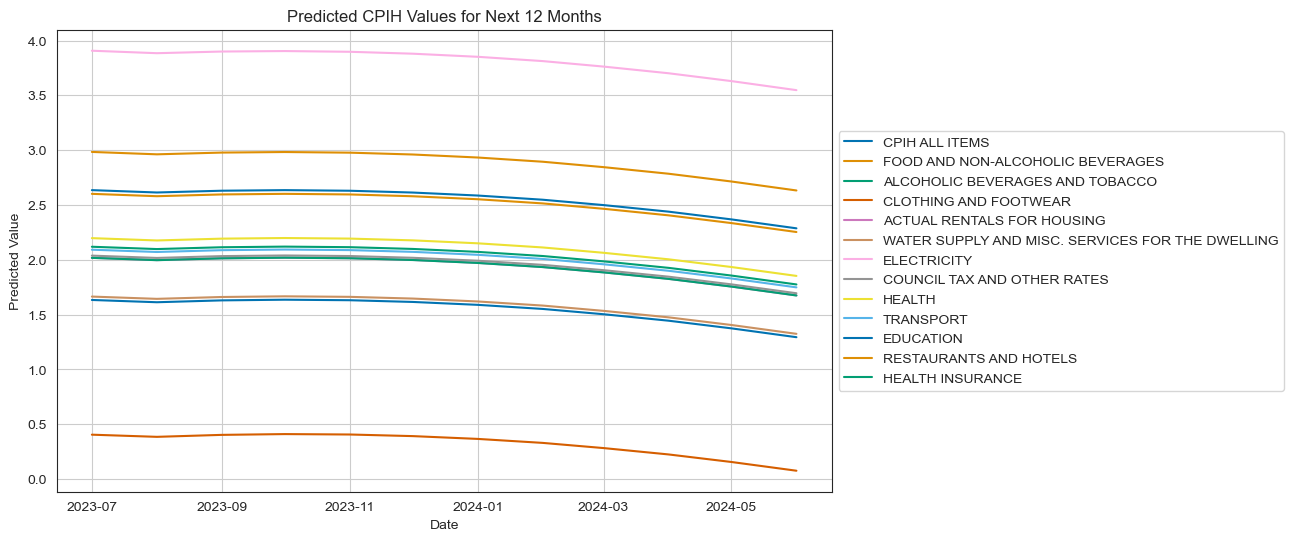

In [427]:
plt.figure(figsize=(10, 6))
for column in predicted_df_all_columns.columns:
    plt.plot(predicted_df_all_columns.index, predicted_df_all_columns[column], label=stripped_index_dict[column])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Predicted CPIH Values for Next 12 Months')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


New data comparison

In [429]:
new_cpih = pd.read_excel("Updated_CPIH_Mar24.xlsx").iloc[:436,:126]
new_cpih.head()

cdid          L522                              L523    \
0                 name  CPIH ALL ITEMS  FOOD AND NON-ALCOHOLIC BEVERAGES   
1  1988-01-01 00:00:00          46.851                            47.901   
2  1988-02-01 00:00:00          46.998                            48.174   
3  1988-03-01 00:00:00          47.202                            48.324   
4  1988-04-01 00:00:00          47.801                            48.592   

   L52H             L52I    L52J    L52K                 L52L         L52M    \
0    FOOD  BREAD & CEREALS    MEAT    FISH  MILK, CHEESE & EGGS  OILS & FATS   
1  48.244           50.053  53.741  43.321               48.488       45.461   
2  48.501           50.353  53.386   43.67               48.523       45.921   
3  48.643           50.311  53.721   43.13               48.551       46.108   
4  48.894           50.548  53.736  43.151               48.861       46.249   

   L52N    ...                        L55E                    L55F    \
0   FRUIT  ...  JEWELLERY CLOCKS AND WATCHES  OTHER PERSONAL EFFECTS   
1  49.436  ...                        57.272                  96.977   
2  50.905  ...                        57.401                  97.196   
3   50.65  ...                        57.105                  96.694   
4  51.559  ...                        57.117                  96.715   

              L55G       L55H                      L55I              L55J    \
0  SOCIAL PROTECTION  INSURANCE  HOUSE CONTENTS INSURANCE  HEALTH INSURANCE   
1                 ..     22.735                    51.859                ..   
2                 ..     22.735                    51.859                ..   
3                 ..     22.735                    51.859                ..   
4                 ..     22.848                    51.859                ..   

                L55K                      L55L    \
0  TRANSPORT INSURANCE  FINANCIAL SERVICES (NEC)   
1               15.745                    95.434   
2               15.745                    95.491   
3               15.745                     95.66   
4               15.902                    95.621   

                           L55M                  L55N    
0  OTHER FINANCIAL SERVICES (NEC)  OTHER SERVICES (NEC)  
1                          95.434                30.016  
2                          95.491                30.358  
3                           95.66                30.485  
4                          95.621                30.795  

[5 rows x 125 columns]

In [430]:
new_cpih = new_cpih.transpose()
new_cpih.columns = new_cpih.iloc[0,:]
new_cpih.set_index(new_cpih.columns[0], append= True, inplace=True)
new_cpih.index.names = ['cdid', 'name']
new_cpih = new_cpih.iloc[1:,:]
new_cpih.columns.names = ["months"]
new_cpih = new_cpih.iloc[:,144:]
new_cpih = new_cpih.apply(pd.to_numeric, errors='coerce')
new_cpih.fillna(0, inplace=True)
new_cpih.columns = pd.to_datetime(new_cpih.columns)
new_cpih= new_cpih.reset_index(level=1,drop=True)

In [431]:
new_cpih.index = new_cpih.index.str.strip()
new_cpih_12=new_cpih.loc[main_sectors]
new_cpih_12 = new_cpih_12.transpose()
new_cpih_12.head()

cdid          L522    L523    L524     L525    L536    L53A    L53E    DHYR  \
months                                                                        
2000-01-01  72.622  65.738  54.420  161.459  66.496  57.488  43.557  54.571   
2000-02-01  72.808  65.713  54.720  163.915  66.496  57.488  43.553  54.571   
2000-03-01  72.957  65.208  54.731  165.945  66.502  57.488  43.549  54.571   
2000-04-01  73.291  65.001  56.567  166.540  67.602  52.082  43.399  57.936   
2000-05-01  73.486  65.657  56.606  166.317  67.679  52.082  42.954  57.936   

cdid          L528    L529    L52C    L52D    L55J  
months                                              
2000-01-01  63.940  65.272  29.899  61.667  35.780  
2000-02-01  63.987  65.771  29.899  61.821  35.780  
2000-03-01  64.222  66.316  29.899  61.958  35.780  
2000-04-01  64.553  66.879  29.899  62.312  36.159  
2000-05-01  64.712  66.967  29.899  62.703  36.159

In [439]:
new_cpih_12_normal = (new_cpih_12- cpih_14_from2000.mean())/cpih_14_from2000.std()
new_cpih_12_normal.head()

cdid            L522      L523      L524      L525      L536      L53A  \
months                                                                   
2000-01-01 -1.453679 -1.480461 -1.361507  2.743405 -1.740099 -1.434124   
2000-02-01 -1.441100 -1.481928 -1.349129  2.879625 -1.740099 -1.434124   
2000-03-01 -1.431022 -1.511565 -1.348675  2.992217 -1.739669 -1.434124   
2000-04-01 -1.408433 -1.523714 -1.272916  3.025218 -1.660845 -1.702309   
2000-05-01 -1.395244 -1.485215 -1.271307  3.012850 -1.655327 -1.702309   

cdid            L53E      DHYR      L528      L529      L52C      L52D  \
months                                                                   
2000-01-01 -1.063254 -2.020495 -1.645074 -1.439183 -1.359543 -1.565339   
2000-02-01 -1.063342 -2.020495 -1.642314 -1.414308 -1.359543 -1.557454   
2000-03-01 -1.063429 -2.020495 -1.628516 -1.387141 -1.359543 -1.550440   
2000-04-01 -1.066708 -1.856812 -1.609080 -1.359076 -1.359543 -1.532315   
2000-05-01 -1.076435 -1.856812 -1.599744 -1.354689 -1.359543 -1.512296   

cdid            L55J  
months                
2000-01-01 -1.496404  
2000-02-01 -1.496404  
2000-03-01 -1.496404  
2000-04-01 -1.485069  
2000-05-01 -1.485069

In [440]:
decomposition_results = {}
for col in new_cpih_12_normal.columns:
    decomposition_results[col] = seasonal_decompose(new_cpih_12_normal[col], model='additive', period=12, extrapolate_trend='freq')

# Extract trend, seasonal, and residual components for each column
trend_features_new = pd.DataFrame({col: decomposition_results[col].trend for col in new_cpih_12_normal.columns})

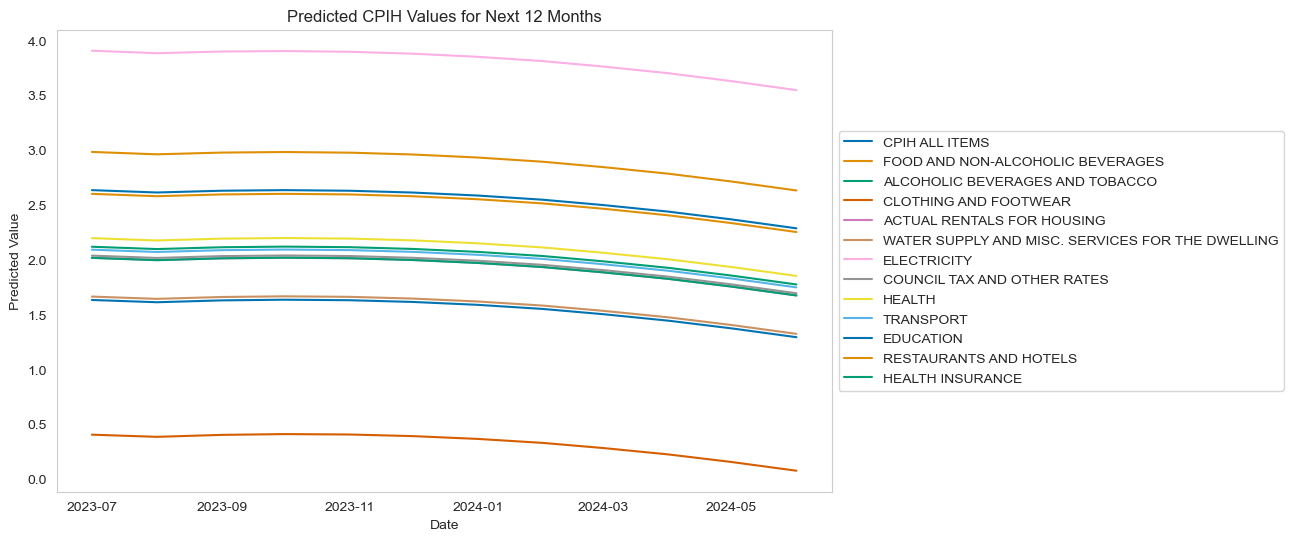

In [441]:
plt.figure(figsize=(10, 6))
for column in predicted_df_all_columns.columns:
    plt.plot(predicted_df_all_columns.index, predicted_df_all_columns[column], label=stripped_index_dict[column])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Predicted CPIH Values for Next 12 Months')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.show()


In [442]:
clmns_check = [ 'L53A', 'DHYR','L52D']
label3 = ['Water Supply', 'Council Tax', 'Restaurants and Hotels']

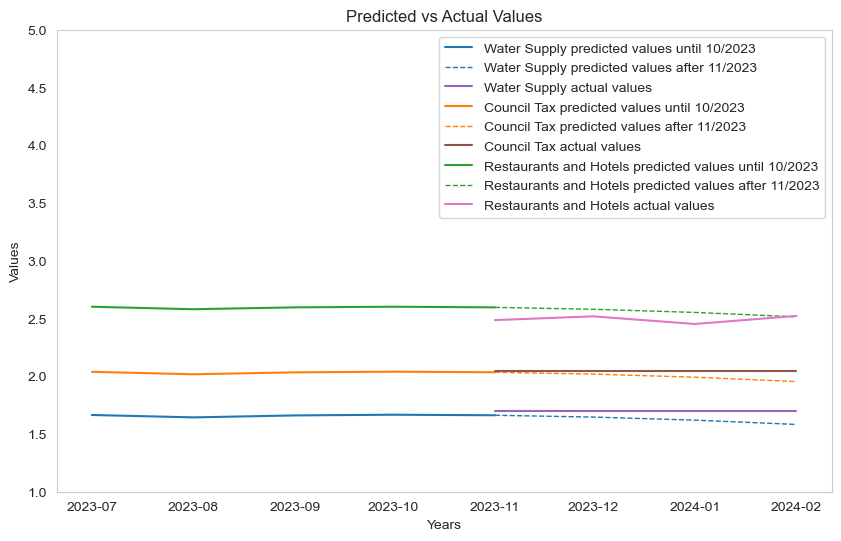

In [443]:
palette = sns.color_palette("tab10", len(clmns_check)*4)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

for i, column in enumerate(clmns_check):
    plt.plot(predicted_df_all_columns[column][:'11-2023'], color=palette[i], label=label3[i]+' predicted values until 10/2023')
    plt.plot(predicted_df_all_columns[column]['11-2023':'2-2024'], linestyle='--', linewidth=1, color=palette[i], label=label3[i]+' predicted values after 11/2023')
    plt.plot(new_cpih_12_normal['11-2023':'2-2024'][column], color=palette[4 + i], label=label3[i]+' actual values')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(False)
plt.ylim(1, 5)
plt.show()